Bernat Sort Rufat

MD004_Advanced data analysis and visualization tools

Proyecto Final de la asignatura Herramientas avanzadas de análisis y visualización de datos

Máster en Data Science

# Customer Churn Prevention



## Objetivos:

El objetivo de este proyecto es encontrar acciones concretas que nos ayuden a prevenir que un cliente haga churn.
Para ello, se seguirán una serie de pasos que nos ayudarán a cumplir el objetivo. 

- Análisis exploratorio de los datos:
    - Estadística descriptiva y calidad general de los datos.
    - Visualizaciones que ayuden a entender la distribución de las variables y categorías.
    - Visualizaciones que ayuden a entender la relación entre los atributos y la variable objetivo is_churned.
    - Resumen de las conclusiones sacadas en este punto.
    
    
- Análisis de datos mediante el uso de técnicas estadísticas:
    - De entre las siguientes pruebas (Correlación, PCA, ANOVA, Información Mútua) se seleccionen al menos 2 pruebas sobre las que basar el análisis. Para estas pruebas se pide:
        - Desarrollo teórico de la técnica: ¿Qué es?, ¿Para que sirve? ¿Por qué utilizamos éstas pruebas y no otras?
        - Desarrollo de la técnica sobre el conjunto de datos: Analizar y explicar los resultados obtenidos.
        - Podéis (y recomendamos) utilizar todas las ténicas enumeradas. El requisito del desarrollo teórico de la ténica a desarrollar se aplica únicamente a 2 de ellas como mínimo.


- Desarrollo del modelo de regresión logística: 
    - Desarrollo y justificación de las variables empleadas en el modelo.
    - Selección y justificación de la métrica de optimización del modelo.
    - Desarrollo de al menos 3 modelo y comparación de resultados (Matriz de confusión).

- Conclusiones y vías abiertas: 
    - ¿Qué recomendaciones le daríais a esta empresa para reducir churn? 
    - ¿Cómo os ayuda el modelo que habéis calculado a llegar a estas conclusiones?


## Carga de packages

In [ ]:
install.packages('gridExtra')
install.packages('GGally')
install.packages('caret')
install.packages('naniar')
install.packages('mice')
install.packages('ltm')
install.packages('FSelectorRcpp')
install.packages('nortest')
install.packages('regclass')
install.packages("forcats")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘expm’, ‘admis

In [ ]:
library(ggplot2)

# install.packages('gridExtra')
library(gridExtra)

# install.packages ('GGally')
library(GGally)

library(caret)

library(dplyr)

library(RColorBrewer)

# install.packages('naniar')
library(naniar)

# install.packages('mice')
library(mice)

# install.packages('ltm')
library(ltm)

# install.packages('FSelectorRcpp')
library(FSelectorRcpp)


# install.packages('nortest')
library(nortest)

# install.packages('regclass')
library(regclass)

library(forcats)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: msm

Loading required package: polycor

Loading required package: bestglm

Loading required package: leaps

Loading required package: VGAM

Loading required package: stats4

Loading req

## Carga de datos

In [ ]:
# cargamos los datos en el df
cust_churn_df <- read.csv(file="customer_churn_data.csv", header=TRUE, sep=",", dec=".")

## Exploratory Data Analysis

El csv customer_churn_data incluye datos cualitativos y cuantitativos de clientes de una empresa de telecomunicaciones india en la que se detallan aspectos de los clientes de la empresa. Está compuesto por 104143 instancias y 18 variables.

El dataset se compone de las siguientes columnas:

Descripción de las variables:
- device user’s – device brand (Categorical)
- first_payment_amount  – user’s first payment amount(Numeric)
- age  – user’s age(Numeric or categorical?)
- city  – user’s city(Categorical)
- number_of_cards  – #of cards user owns
- payments_initiated  – #of payments initiated by user
- payments_failed  – #of payments failed
- payments_completed – #of payments completed
- payments_completed_amount_first_7days  – amt of payment completed in first 7 days of joining
- reward_purchase_count_first_7days – #of rewards claimed in first 7 days
- coins_redeemed_first_7days – coins redeemed in first 7 days
- is_referral – is user a referred user
- visits_feature_1  – #of visits made by user to product feature 1
- visits_feature_2 – #of visits made by user to product feature 2
- given_permission_1 – has user given permission 1
- given_permission_2 – has user given permission 2
- user_id – user identifier
- is_churned – whether user churned

In [ ]:
head(cust_churn_df) # de forma predefinida retorna las primeras 6 observations
tail(cust_churn_df) # de forma predefinida retorna las últimas 6 observations

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>
1,samsung,0,20,Ahmedabad,2,1,0,1,0,NA,0,FALSE,3,0,1,0,269438,0
2,xiaomi,0,20,Surat,1,1,0,1,0,NA,0,TRUE,0,0,1,0,139521,0
3,xiaomi,0,20,Kullu,1,2,1,1,0,0,0,TRUE,0,0,0,1,307352,0
4,oneplus,0,20,Mumbai,2,4,1,2,322,2,20,FALSE,0,0,1,1,456424,0
5,apple,0,20,Pune,2,1,0,1,0,0,0,FALSE,0,1,1,1,398779,0
6,oppo,0,20,Ahmedabad,0,1,0,1,0,0,0,TRUE,0,0,1,1,136656,0


,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>
104138,samsung,53,NA,Bangalore,1,2,0,2,63,3,23,FALSE,0,1,1,1,4833,1
104139,samsung,55,NA,Ongole,0,3,1,2,56,2,20,TRUE,0,0,1,0,30036,1
104140,vivo,67,NA,Chennai,1,1,0,1,67,2,53,TRUE,0,0,1,0,377399,1
104141,apple,67,NA,Bangalore,3,2,0,2,137,NA,0,FALSE,0,0,1,1,8415,1
104142,samsung,83,NA,Hyderabad,5,3,1,2,211,5,140,FALSE,0,0,0,1,8056,1
104143,oneplus,437,NA,Hyderabad,1,1,0,1,437,0,0,FALSE,0,0,1,1,109558,1


In [ ]:
# dimensión del df (filas y columnas)
dim(cust_churn_df)

[1] 104143     18

- El dataset incluye 104143 instancias (filas) y 18 variables (columnas).

In [ ]:
# estructura interna compacta del df
str(cust_churn_df)

'data.frame':	104143 obs. of  18 variables:
 $ device                               : chr  "samsung" "xiaomi" "xiaomi" "oneplus" ...
 $ first_payment_amount                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age                                  : int  20 20 20 20 20 20 20 20 20 20 ...
 $ city                                 : chr  "Ahmedabad" "Surat" "Kullu" "Mumbai" ...
 $ number_of_cards                      : int  2 1 1 2 2 0 0 0 0 0 ...
 $ payments_initiated                   : int  1 1 2 4 1 1 1 17 1 1 ...
 $ payments_failed                      : int  0 0 1 1 0 0 0 0 0 0 ...
 $ payments_completed                   : int  1 1 1 2 1 1 1 12 1 1 ...
 $ payments_completed_amount_first_7days: int  0 0 0 322 0 0 0 143 0 0 ...
 $ reward_purchase_count_first_7days    : int  NA NA 0 2 0 0 0 6 0 NA ...
 $ coins_redeemed_first_7days           : int  0 0 0 20 0 0 0 190 0 0 ...
 $ is_referral                          : logi  FALSE TRUE TRUE FALSE FALSE TRUE ...
 $ visits_feature_1              

- Observamos que is_referral, given_permission_1, given_permission_2 y is_churned en realidad son variables categóricas. Por lo tanto, las convertiremos de numéricas a categóricas. 

- Logi es la forma abreviada de logical, que es un tipo de datos en R que representa un valor booleano de TRUE o FALSE. En este caso, is_referral era originalmente una variable lógica con valores TRUE y FALSE.

- Sería una buena idea convertir la variable is_referral en un factor con 0 y 1, ya es una variable binaria. Esto facilitará la interpretación de la variable y su uso en la modelización.
    - 0: FALSE (user is not a referred user)
    - 1: TRUE (user is a referred user)

In [ ]:
cust_churn_df$is_referral <- as.factor(ifelse(cust_churn_df$is_referral, 1, 0))
cust_churn_df$is_referral

[1] 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0
   [37] 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0
   [73] 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0
  [109] 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0
  [145] 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0
  [181] 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1
  [217] 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0
  [253] 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
  [289] 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
  [325] 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1
  [361] 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
  [397] 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0
  [433] 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0
  [469] 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0
  [505] 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0
  [541] 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1
  [577] 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
  [613] 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
  [649] 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
  [685] 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
  [721] 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0
  [757] 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
  [793] 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
  [829] 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0
  [865] 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  [901] 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1
  [937] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1
  [973] 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0
 [1009] 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 [1045] 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0
 [1081] 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 [1117] 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1
 [1153] 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 [1189] 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 [1225] 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1
 [1261] 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0
 [1297] 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0
 [1333] 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 [1369] 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1
 [1405] 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 [1441] 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1
 [1477] 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0
 [1513] 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0
 [1549] 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1
 [1585] 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0
 [1621] 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1
 [1657] 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0
 [1693] 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1
 [1729] 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1
 [1765] 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 [18

In [ ]:
# convertimos given_permission_1, given_permission_2, is_churned a categóricas (factor)
cust_churn_df$given_permission_1 = as.factor(cust_churn_df$given_permission_1)
cust_churn_df$given_permission_2 = as.factor(cust_churn_df$given_permission_2)
cust_churn_df$is_churned = as.factor(cust_churn_df$is_churned)

In [ ]:
str(cust_churn_df)

'data.frame':	104143 obs. of  18 variables:
 $ device                               : chr  "samsung" "xiaomi" "xiaomi" "oneplus" ...
 $ first_payment_amount                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age                                  : int  20 20 20 20 20 20 20 20 20 20 ...
 $ city                                 : chr  "Ahmedabad" "Surat" "Kullu" "Mumbai" ...
 $ number_of_cards                      : int  2 1 1 2 2 0 0 0 0 0 ...
 $ payments_initiated                   : int  1 1 2 4 1 1 1 17 1 1 ...
 $ payments_failed                      : int  0 0 1 1 0 0 0 0 0 0 ...
 $ payments_completed                   : int  1 1 1 2 1 1 1 12 1 1 ...
 $ payments_completed_amount_first_7days: int  0 0 0 322 0 0 0 143 0 0 ...
 $ reward_purchase_count_first_7days    : int  NA NA 0 2 0 0 0 6 0 NA ...
 $ coins_redeemed_first_7days           : int  0 0 0 20 0 0 0 190 0 0 ...
 $ is_referral                          : Factor w/ 2 levels "0","1": 1 2 2 1 1 2 2 1 2 2 ...
 $ visits_feature_1     

In [ ]:
# visión general del df
summary(cust_churn_df)

    device          first_payment_amount      age            city          
 Length:104143      Min.   :   0.00      Min.   :20.00   Length:104143     
 Class :character   1st Qu.:   2.00      1st Qu.:27.00   Class :character  
 Mode  :character   Median :  12.00      Median :31.00   Mode  :character  
                    Mean   :  34.77      Mean   :32.69                     
                    3rd Qu.:  37.00      3rd Qu.:36.00                     
                    Max.   :4370.00      Max.   :80.00                     
                                         NA's   :142                       
 number_of_cards  payments_initiated payments_failed   payments_completed
 Min.   : 0.000   Min.   :  1.000    Min.   : 0.0000   Min.   :  1.000   
 1st Qu.: 1.000   1st Qu.:  1.000    1st Qu.: 0.0000   1st Qu.:  1.000   
 Median : 1.000   Median :  2.000    Median : 0.0000   Median :  1.000   
 Mean   : 1.989   Mean   :  2.847    Mean   : 0.4399   Mean   :  1.831   
 3rd Qu.: 3.000   3rd 

La función summary() proporciona algunas estadísticas básicas para cada variable del conjunto de datos.
- Podemos observar que algunas variables tienen NA values. 
- Podemos ver que variables como coins_redeemed_first_7days, first_payment_amount y payments_completed_amount_first_7days tienen un amplio rango de valores y presentan una gran diferencia entre la mediana y la media.



In [ ]:
# miramos si hay valores nulos
sum(is.na(cust_churn_df))

[1] 31530

- Observamos que hay un total de 31530 valores nulos en el dataset. 

Mostramos las columnas con NA values y el número de NA values:
- Creamos el vector na_cols que contiene los nombres de las columnas de cust_churn_df que tienen al menos un NA value. 
- La función sapply aplica la función function(x) sum(is.na(x)) a cada columna de cust_churn_df, que cuenta el número de valores que faltan en cada columna. 
- El resultado de esta operación es un vector lógico que indica qué columnas tienen al menos un valor omitido. 
- La función *names* se utiliza para extraer los nombres de las columnas de este vector lógico. 
- Por último, se asigna a na_cols el vector de nombres de columnas con al menos un NA value.

In [ ]:
na_cols <- names(cust_churn_df)[sapply(cust_churn_df, function(x) sum(is.na(x))) > 0]
message("Number of NA's per variable:")
for (col in na_cols) {
  message(paste0(col, ": ", sum(is.na(cust_churn_df[[col]]))))
}

Number of NA's per variable:

age: 142

number_of_cards: 472

payments_initiated: 472

payments_failed: 472

payments_completed: 472

payments_completed_amount_first_7days: 472

reward_purchase_count_first_7days: 23264

coins_redeemed_first_7days: 472

visits_feature_1: 2646

visits_feature_2: 2646



### Variable Objetivo: is_churned

- Variable objetivo: is_churned

In [ ]:
# distribución de frecuencias de la variable categórica objetivo is_churned
is_churned_counts <- table(cust_churn_df$is_churned)
is_churned_counts


    0     1 
74274 29869 

In [ ]:
# proporción de cada categoría
prop.table(table(cust_churn_df$is_churned))


        0         1 
0.7131924 0.2868076 

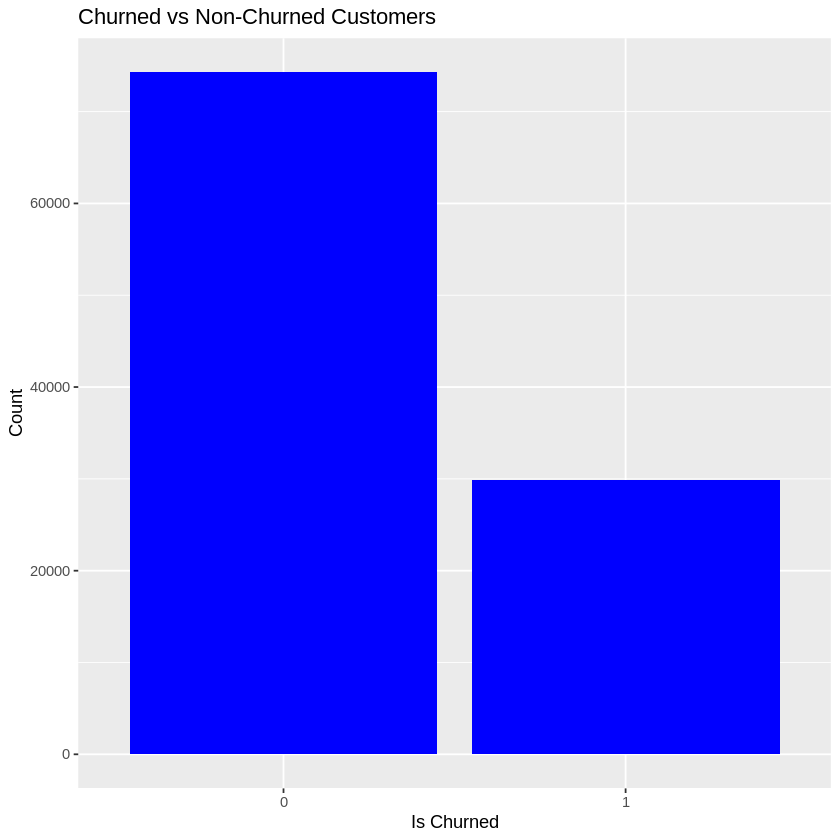

In [ ]:
# Create a data frame from the table
is_churned_df <- data.frame(is_churned = names(is_churned_counts), count = as.numeric(is_churned_counts))

# Create the plot using ggplot2
ggplot(is_churned_df, aes(x = is_churned, y = count)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Is Churned", y = "Count", title = "Churned vs Non-Churned Customers")

- La variable objetivo is_churned presenta un desbalanceo de clases:
    -  0: 74274     
    -  1: 29869

### Distribución de las variables categóricas

#### Device

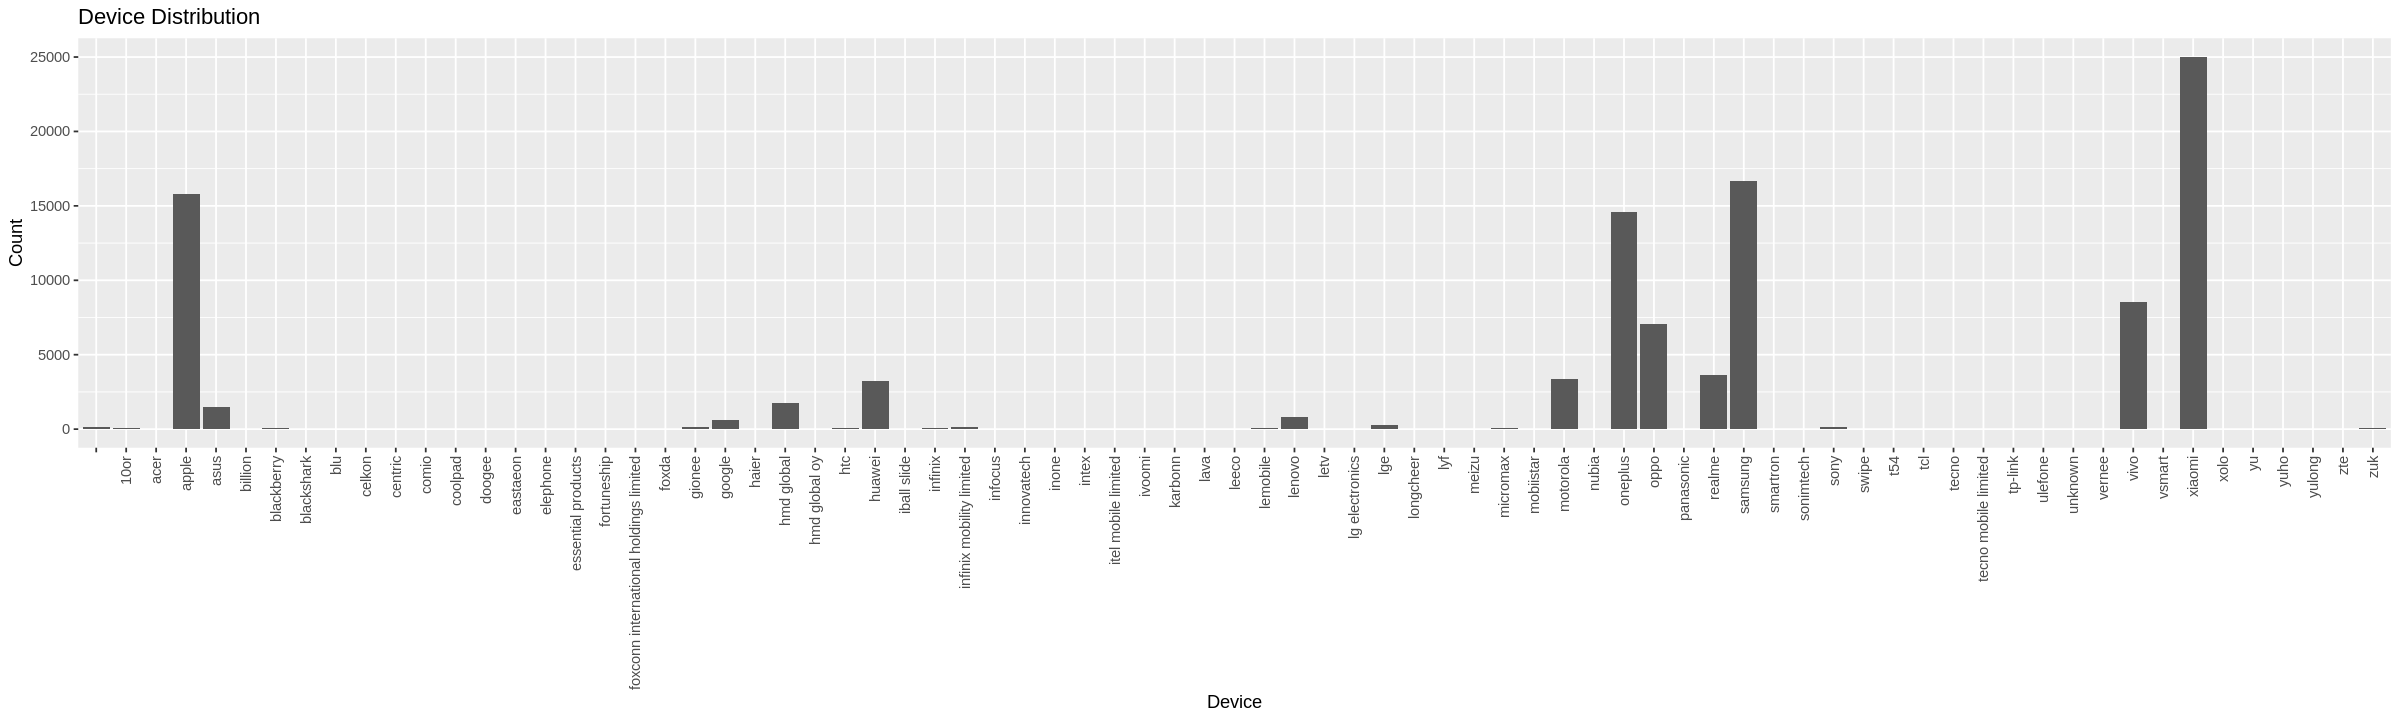

In [ ]:
# Device
options(repr.plot.width = 20, repr.plot.height = 6)

pc1 <- ggplot(cust_churn_df, aes(x = device)) + 
  geom_bar() + 
  labs(title = "Device Distribution", x = "Device", y = "Count") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
pc1

- Observamos que hay un device 'unknown'.

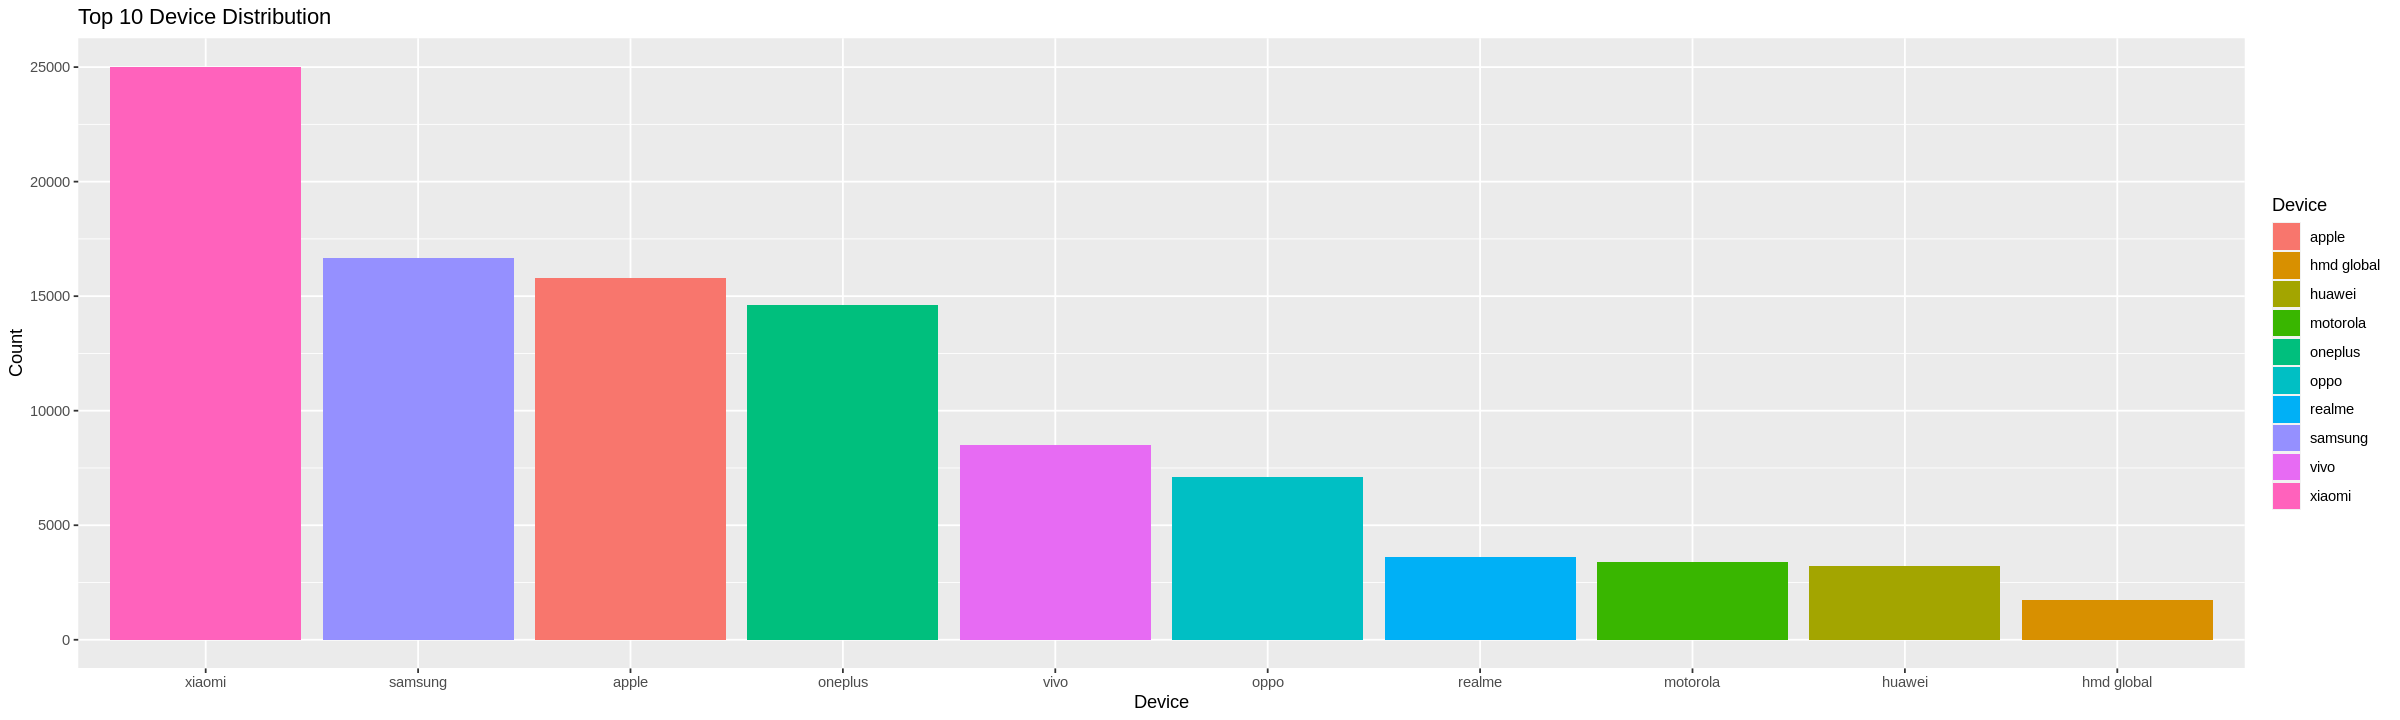

In [ ]:
# Get the top 10 devices in descending order of count
top_devices <- cust_churn_df %>%
  count(device) %>%
  arrange(desc(n)) %>%
  head(10) %>%
  pull(device)

# Filter the data to include only the top 6 devices
cust_churn_top6 <- cust_churn_df %>%
  filter(device %in% top_devices)

# Create a bar plot of the top 6 devices in descending order of count
ggplot(cust_churn_top6, aes(x = fct_infreq(device), fill = device)) +
  geom_bar() +
  labs(title = "Top 10 Device Distribution", x = "Device", y = "Count", fill = "Device")


- Observamos que la marca de dispositivos más utilizada por los usuarios es Xiaomi, seguida de Samsung y Apple. 

#### City

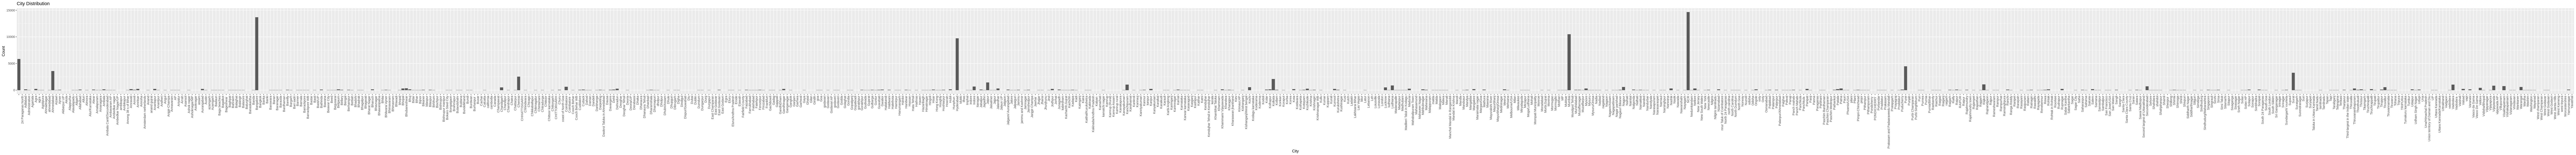

In [ ]:
# City
options(repr.plot.width = 100, repr.plot.height = 6)

pc2 <- ggplot(cust_churn_df, aes(x = city)) + 
  geom_bar() + 
  labs(title = "City Distribution", x = "City", y = "Count") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

pc2

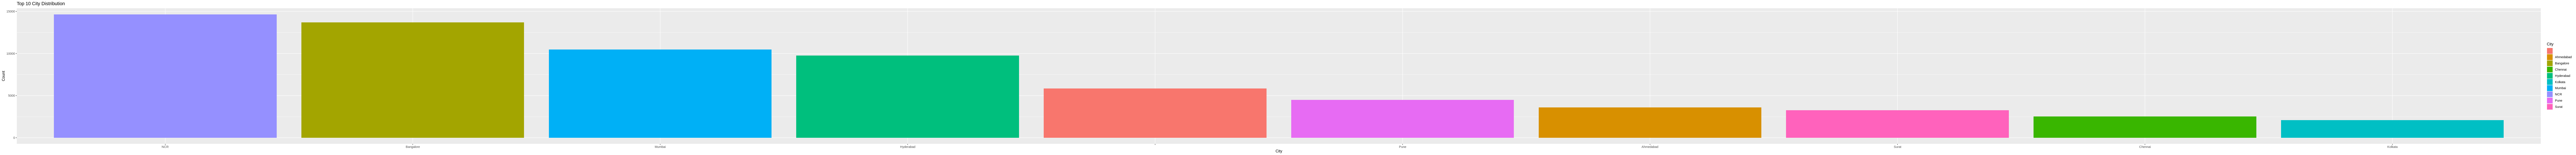

In [ ]:
# Get the top 10 cities in descending order of count
top_cities <- cust_churn_df %>%
  count(city) %>%
  arrange(desc(n)) %>%
  head(10) %>%
  pull(city)

# Filter the data to include only the top 10 cities
cust_churn_top5 <- cust_churn_df %>%
  filter(city %in% top_cities)

# Create a bar plot of the top 10 cities in descending order of count
ggplot(cust_churn_top5, aes(x = fct_infreq(city), fill = city)) +
  geom_bar() +
  labs(title = "Top 10 City Distribution", x = "City", y = "Count", fill = "City")

- Observamos que la ciudad con más usuarios es NCR, seguida de Bangalore y Mumbai. 

#### is_referral, given_permission_1, given_permission_2

is_referral:




    0     1 
61024 43119 

given_permission_1:




    0     1 
15380 88763 

given_permission_2:




    0     1 
28813 75330 

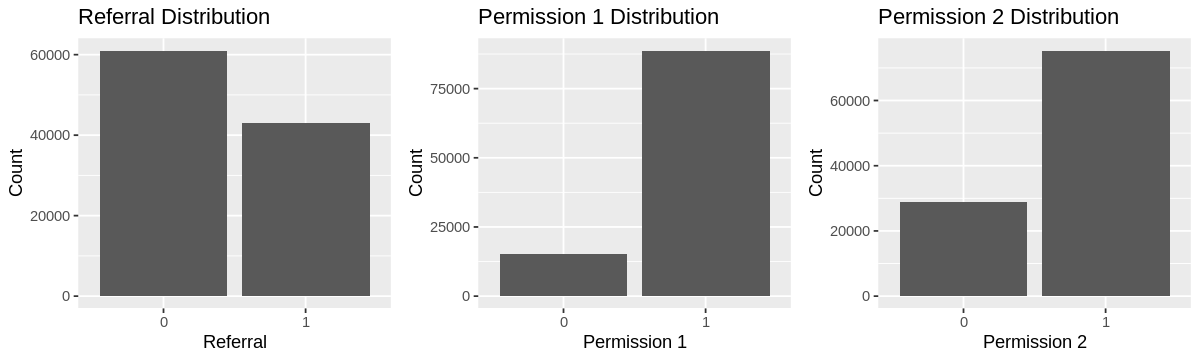

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 3)

# is_referral
pc3 <- ggplot(cust_churn_df, aes(x = is_referral)) + 
      geom_bar() + 
      labs(title = "Referral Distribution", x = "Referral", y = "Count") 
# given_permission_1
pc4 <- ggplot(cust_churn_df, aes(x = given_permission_1)) + 
      geom_bar() + 
      labs(title = "Permission 1 Distribution", x = "Permission 1", y = "Count") 
# given_permission_2
pc5 <- ggplot(cust_churn_df, aes(x = given_permission_2)) + 
      geom_bar() + 
      labs(title = "Permission 2 Distribution", x = "Permission 2", y = "Count")
# arrange the plots in a 2x2 grid
grid.arrange(pc3, pc4, pc5, ncol = 3)

# distribución de frecuencias de la variable categórica objetivo is_churned
message('is_referral:')
table(cust_churn_df$is_referral)
message('given_permission_1:')
table(cust_churn_df$given_permission_1)
message('given_permission_2:')
table(cust_churn_df$given_permission_2)

- Observamos que en given_permission_1 y given_permission_2 hay un claro desbalanceo de clases, mientras que el desbalanceo de clases en is_referral no es tan acusado. 

### Distribución de las variables numéricas

Warning message:
“Removed 142 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 142 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 142 rows containing non-finite values (`stat_boxplot()`).”


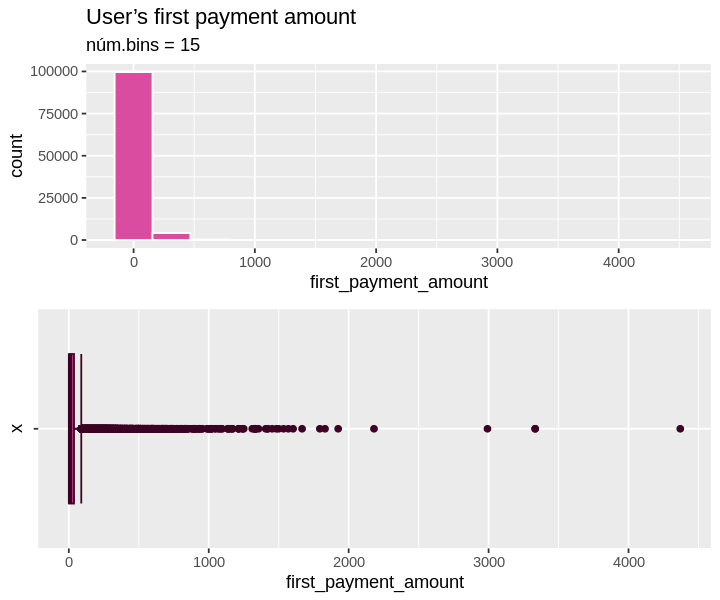

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”


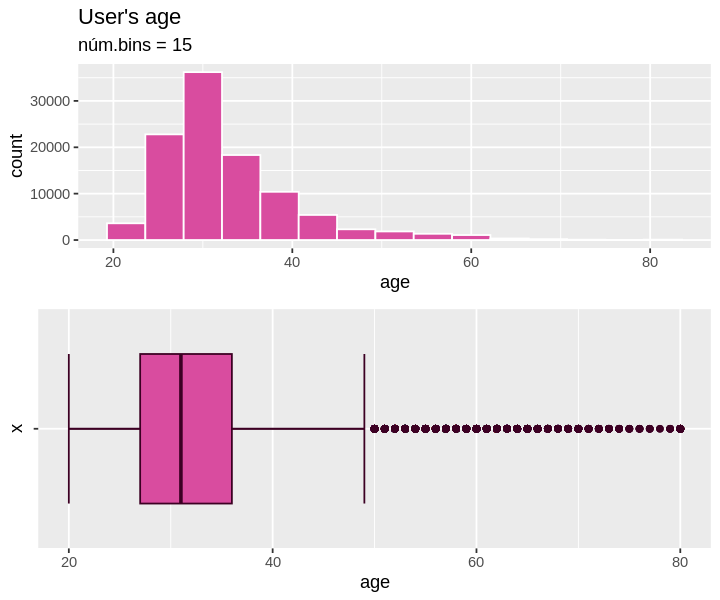

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”


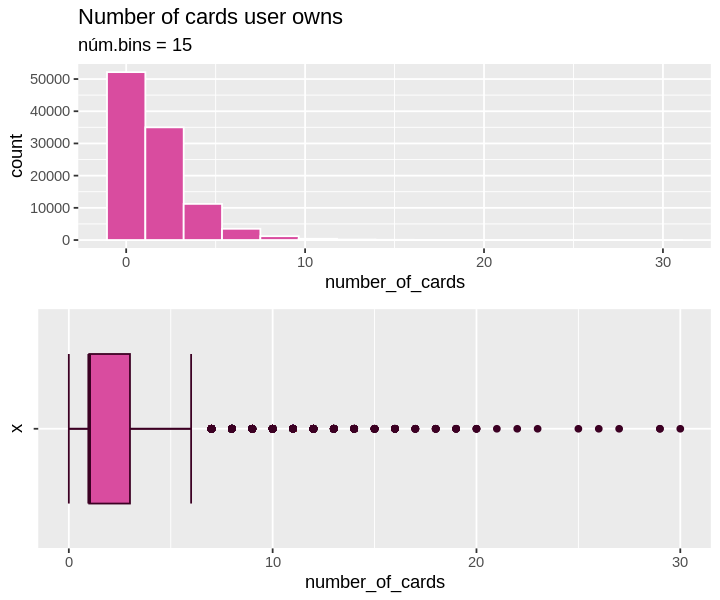

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”


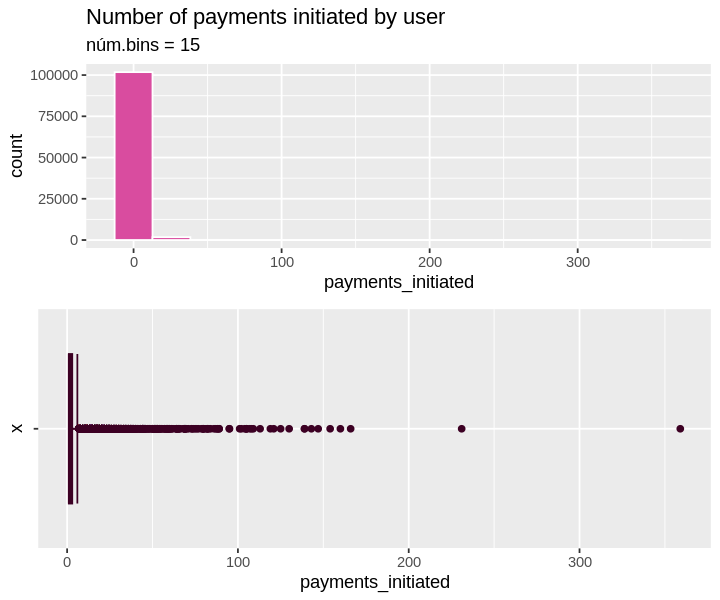

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”


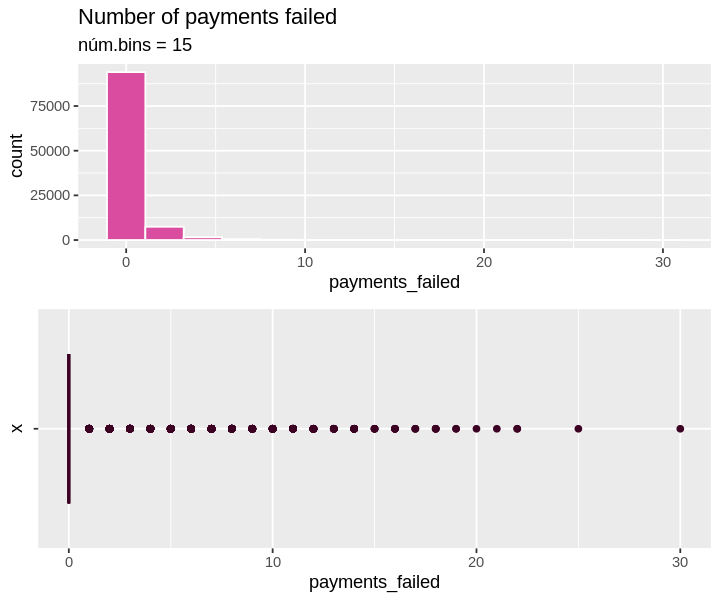

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”


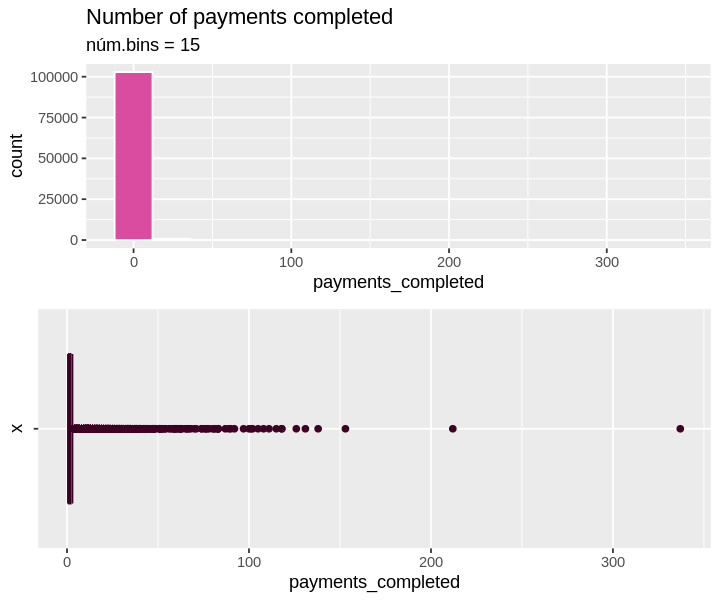

Warning message:
“Removed 23264 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 23264 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 23264 rows containing non-finite values (`stat_boxplot()`).”


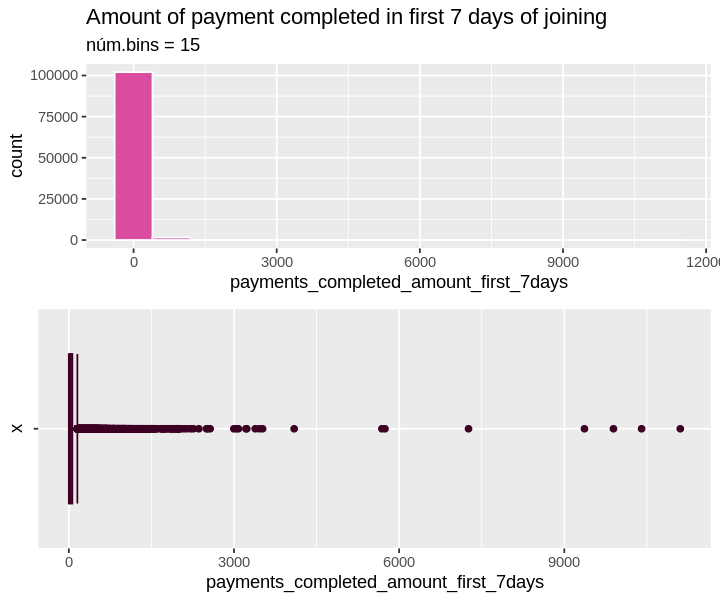

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”


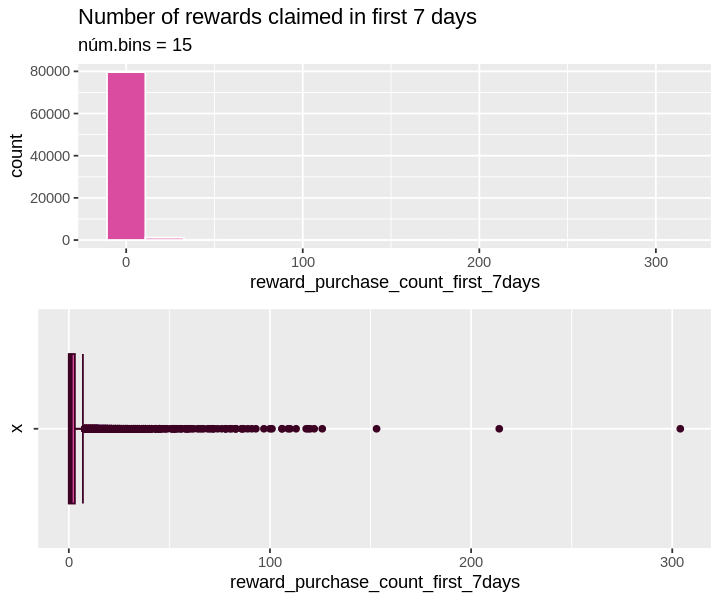

Warning message:
“Removed 2646 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_boxplot()`).”


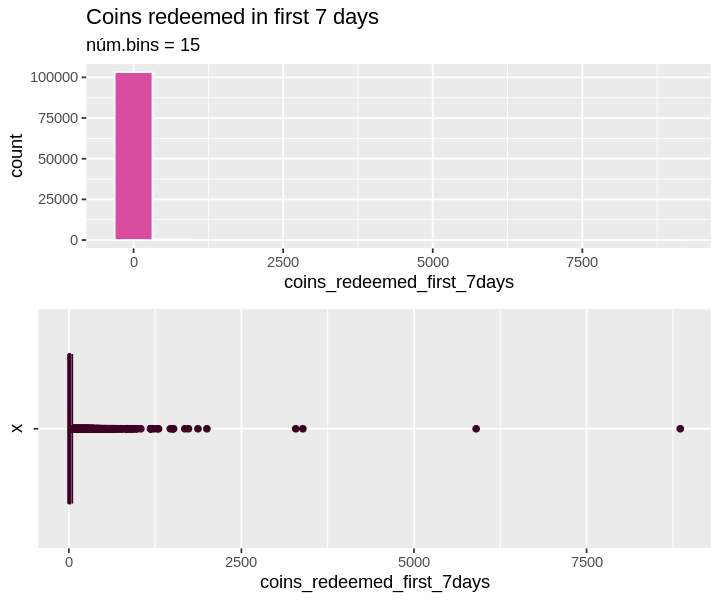

Warning message:
“Removed 2646 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_boxplot()`).”


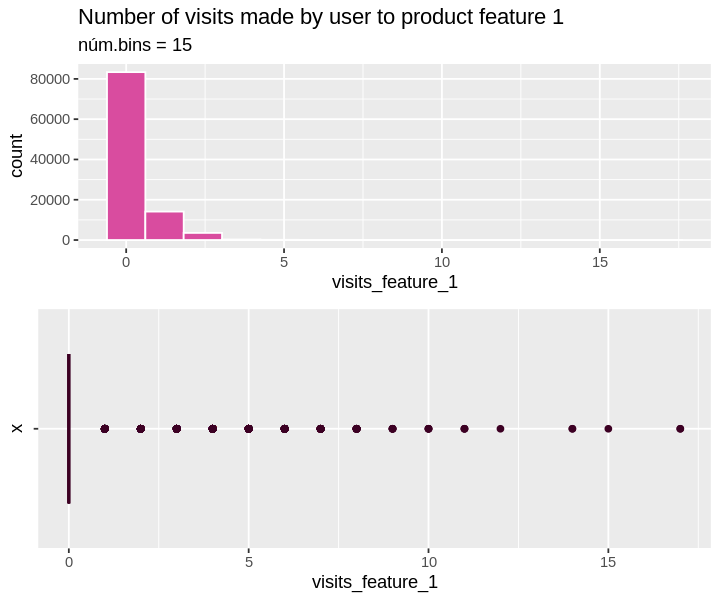

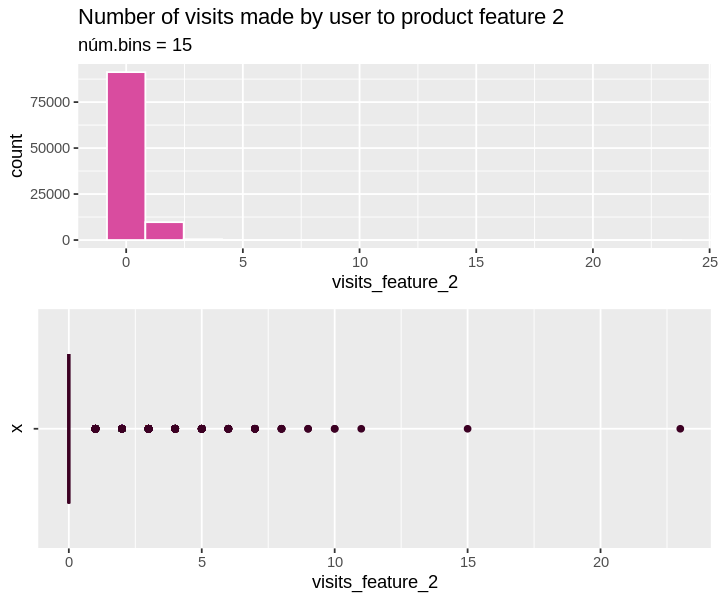

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 5)

# first_payment_amount
p1 <- ggplot(cust_churn_df, aes(x = first_payment_amount)) +
      geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
      labs(title = "User’s first payment amount",
      subtitle = "núm.bins = 15", x = "first_payment_amount")
b1 <- ggplot(data = cust_churn_df, aes(x = "", y = first_payment_amount)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p1,b1)
# age
p2 <- ggplot(cust_churn_df, aes(x = age)) +
      geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
      labs(title = "User's age",
      subtitle = "núm.bins = 15", x = "age")
b2 <- ggplot(data = cust_churn_df, aes(x = "", y = age)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p2,b2)

# number_of_cards
p3 <- ggplot(cust_churn_df, aes(x = number_of_cards)) +
      geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
      labs(title = "Number of cards user owns",
      subtitle = "núm.bins = 15", x = "number_of_cards")
b3 <- ggplot(data = cust_churn_df, aes(x = "", y = number_of_cards)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p3,b3)

# payments_initiated
p4 <- ggplot(cust_churn_df, aes(x = payments_initiated)) +
      geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
      labs(title = "Number of payments initiated by user",
      subtitle = "núm.bins = 15", x = "payments_initiated")
b4 <- ggplot(data = cust_churn_df, aes(x = "", y = payments_initiated)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p4,b4)

# payments_failed
p5 <- ggplot(cust_churn_df, aes(x = payments_failed)) +
      geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
      labs(title = "Number of payments failed",
      subtitle = "núm.bins = 15", x = "payments_failed")
b5 <- ggplot(data = cust_churn_df, aes(x = "", y = payments_failed)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p5,b5)

# payments_completed
p6 <- ggplot(cust_churn_df, aes(x = payments_completed)) +
       geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
       labs(title = "Number of payments completed",
       subtitle = "núm.bins = 15", x = "payments_completed")
b6 <- ggplot(data = cust_churn_df, aes(x = "", y = payments_completed)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p6,b6)

# payments_completed_amount_first_7days
p7 <- ggplot(cust_churn_df, aes(x = payments_completed_amount_first_7days)) +
      geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
      labs(title = "Amount of payment completed in first 7 days of joining",
      subtitle = "núm.bins = 15", x = "payments_completed_amount_first_7days")
b7 <- ggplot(data = cust_churn_df, aes(x = "", y = payments_completed_amount_first_7days)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p7,b7)

# reward_purchase_count_first_7days
p8 <- ggplot(cust_churn_df, aes(x = reward_purchase_count_first_7days)) +
      geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
      labs(title = "Number of rewards claimed in first 7 days",
      subtitle = "núm.bins = 15", x = "reward_purchase_count_first_7days")
b8 <- ggplot(data = cust_churn_df, aes(x = "", y = reward_purchase_count_first_7days)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p8,b8)

# coins_redeemed_first_7days
p9 <- ggplot(cust_churn_df, aes(x = coins_redeemed_first_7days)) +
    geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
    labs(title = "Coins redeemed in first 7 days",
    subtitle = "núm.bins = 15", x = "coins_redeemed_first_7days")
b9 <- ggplot(data = cust_churn_df, aes(x = "", y = coins_redeemed_first_7days)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p9,b9)

# visits_feature_1
p10 <- ggplot(cust_churn_df, aes(x = visits_feature_1)) +
    geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
    labs(title = "Number of visits made by user to product feature 1",
    subtitle = "núm.bins = 15", x = "visits_feature_1")
b10 <- ggplot(data = cust_churn_df, aes(x = "", y = visits_feature_1)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p10,b10)

# visits_feature_2
p11 <- ggplot(cust_churn_df, aes(x = visits_feature_2)) +
    geom_histogram(bins = 15, fill = "#d94c9f", color = "white") +
    labs(title = "Number of visits made by user to product feature 2",
    subtitle = "núm.bins = 15", x = "visits_feature_2")
b11 <- ggplot(data = cust_churn_df, aes(x = "", y = visits_feature_2)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip()
grid.arrange(p11,b11)

- Observamos un elevado número de outliers en todas las variables.
- En la mayoría de ellas, sin limpiar los datos, es muy difícil ver que distribución tienen.
- Podemos observar que la variable 'age' parece seguir una distribución normal. 

### Relación entre los atributos y la variable objetivo is_churned

#### Relación entre las variables numéricas i is_churned 

In [ ]:
# lista con las variables numéricas
num_vars <- c("first_payment_amount", 
              "age", 
              "number_of_cards", 
              "payments_initiated", 
              "payments_failed", 
              "payments_completed", 
              "payments_completed_amount_first_7days", 
              "reward_purchase_count_first_7days",
              "coins_redeemed_first_7days", 
              "visits_feature_1", 
              "visits_feature_2")

# df con las variables numéricas y la variable target
num_target_df <- cust_churn_df[, c(num_vars, "is_churned")]

##### Violinplots

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation ideoms with `aes()`”
Warning message:
“Removed 142 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 142 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 142 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 142 rows containing non-finite values (`stat_summary()`).”


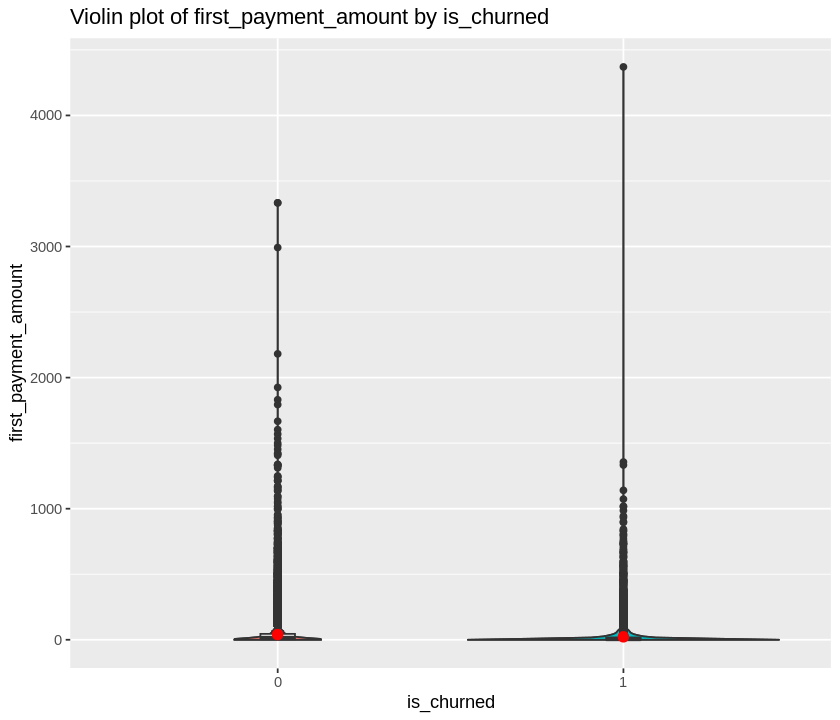

Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_summary()`).”


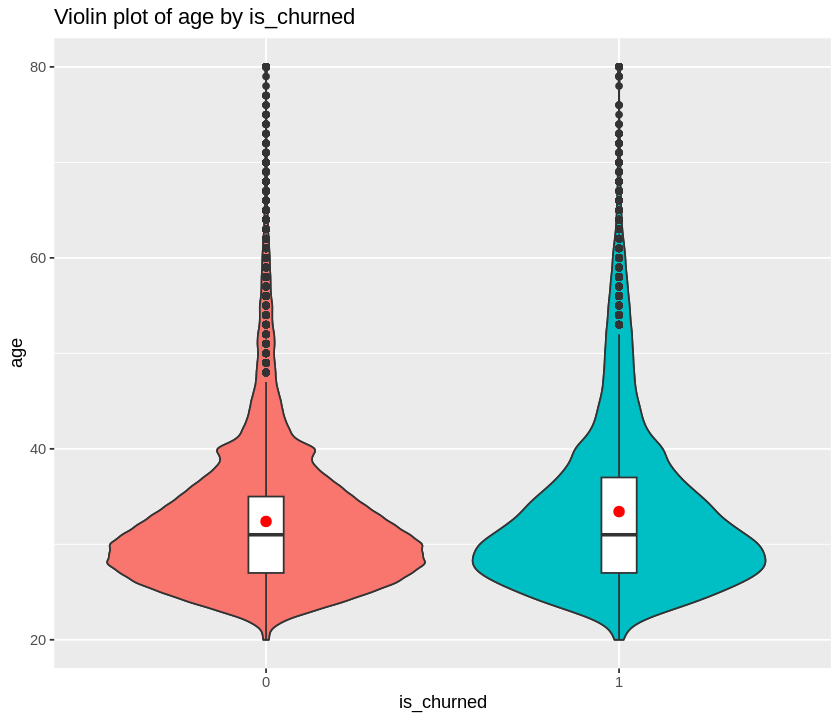

Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_summary()`).”


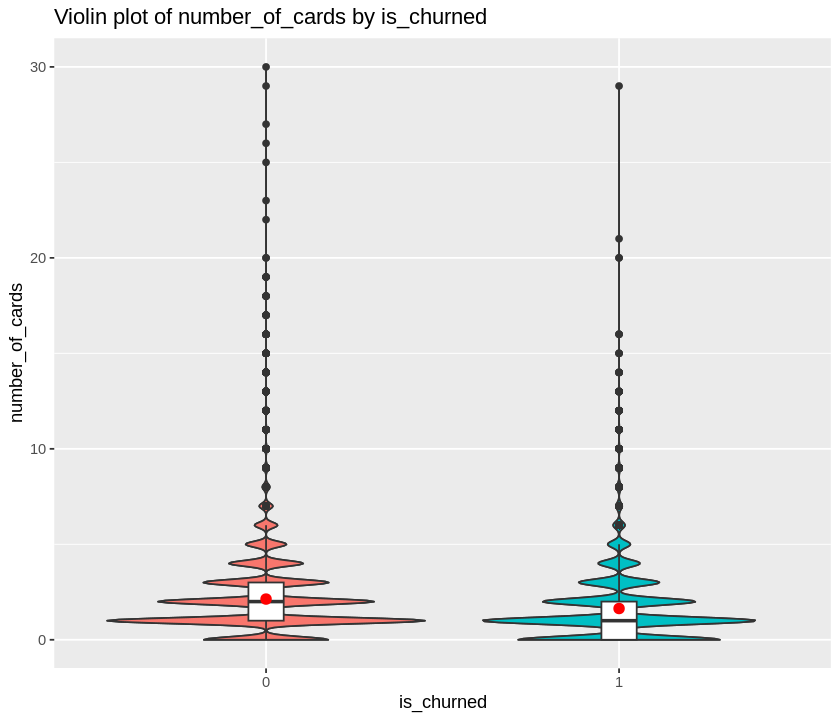

Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_summary()`).”


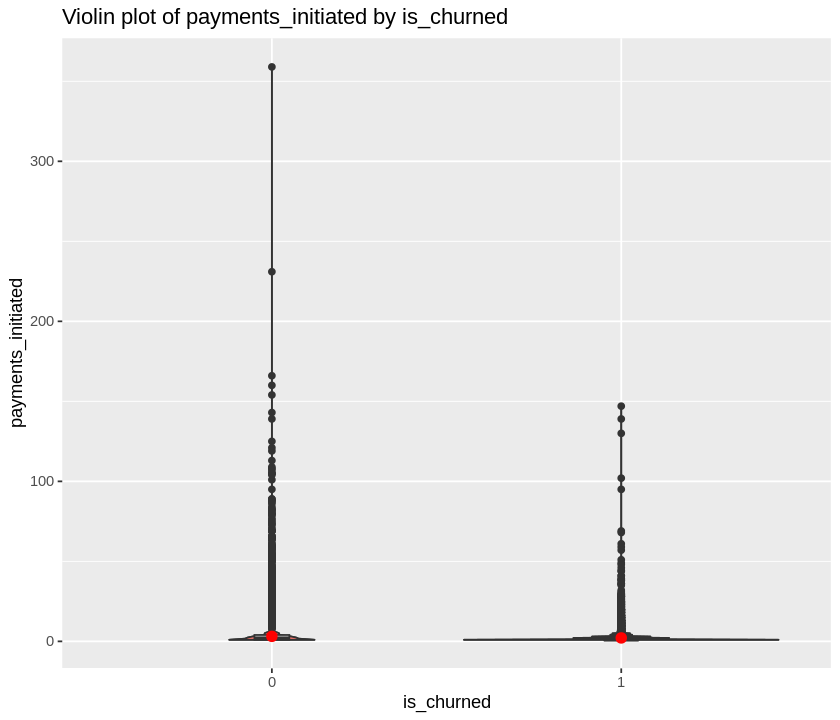

Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_summary()`).”


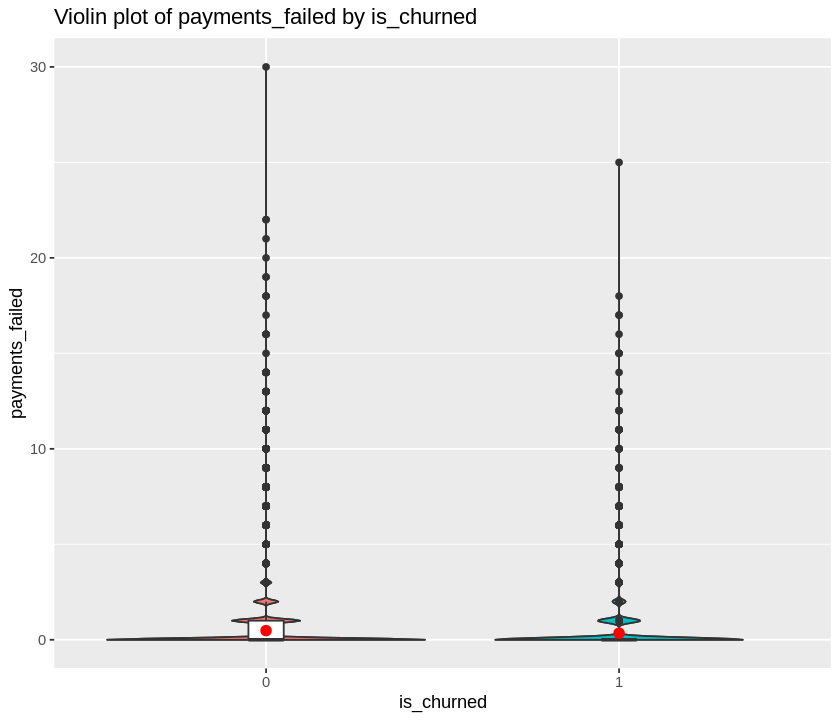

Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_summary()`).”


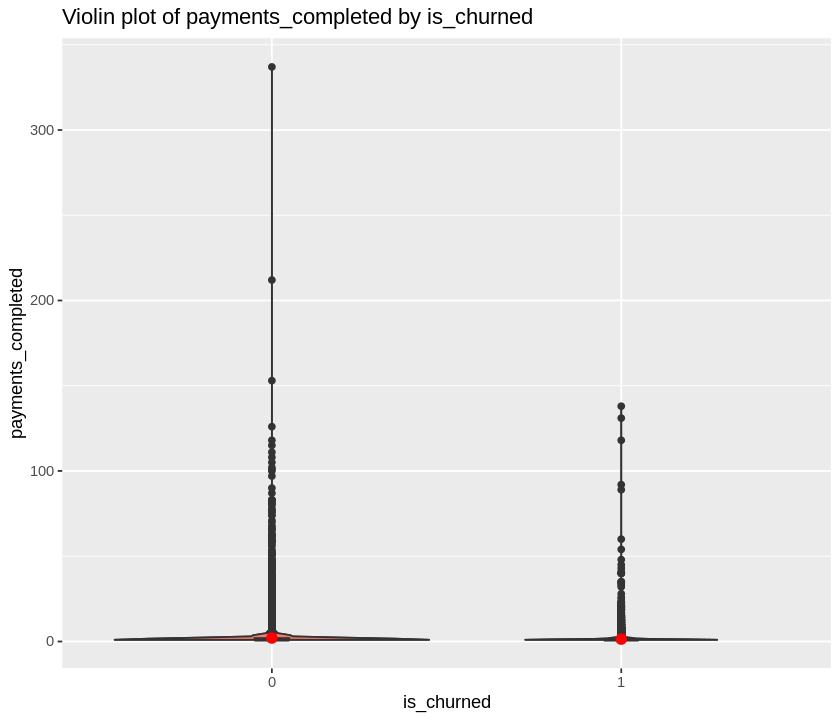

Warning message:
“Removed 23264 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 23264 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 23264 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 23264 rows containing non-finite values (`stat_summary()`).”


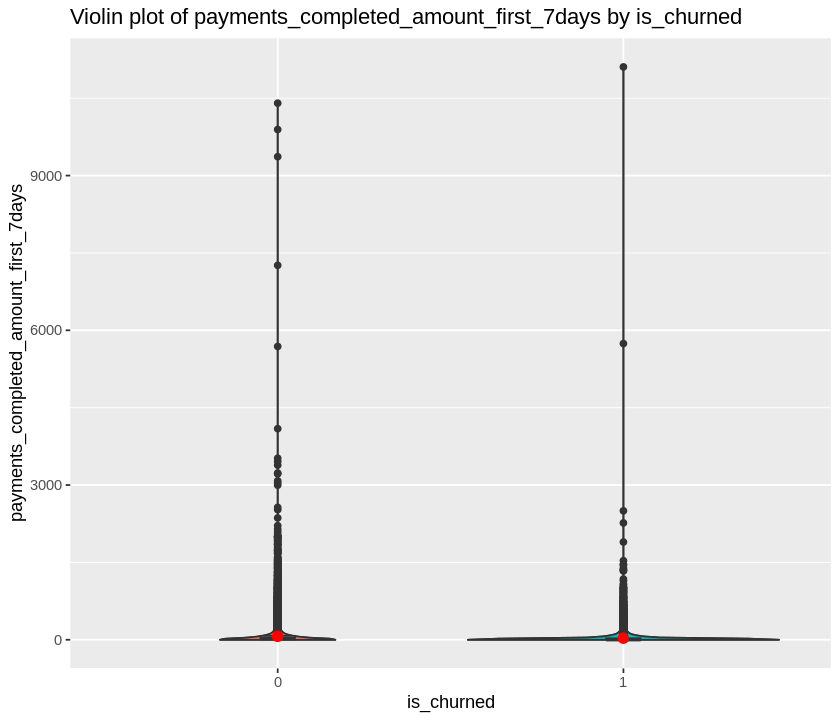

Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 472 rows containing non-finite values (`stat_summary()`).”


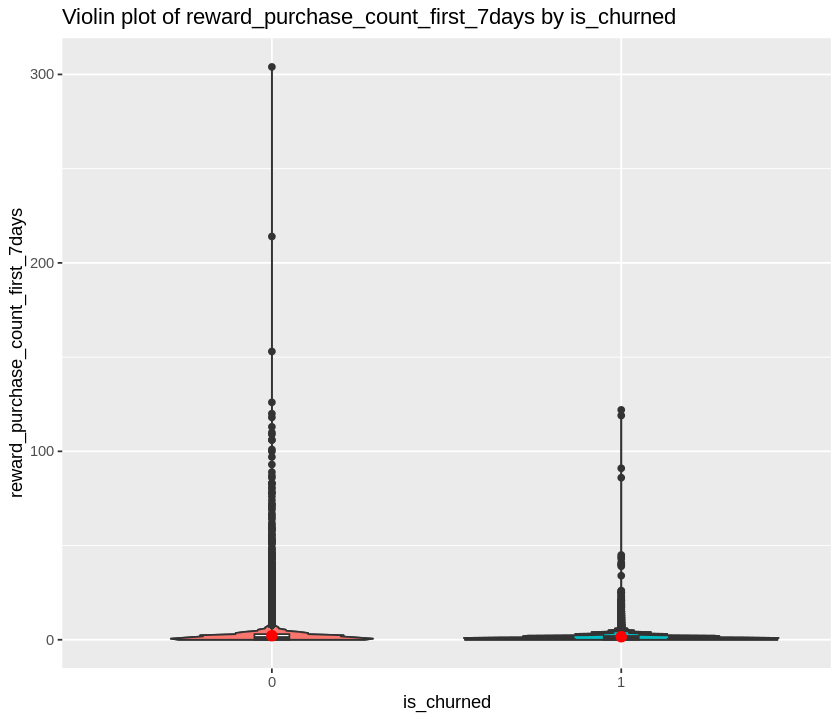

Warning message:
“Removed 2646 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_summary()`).”


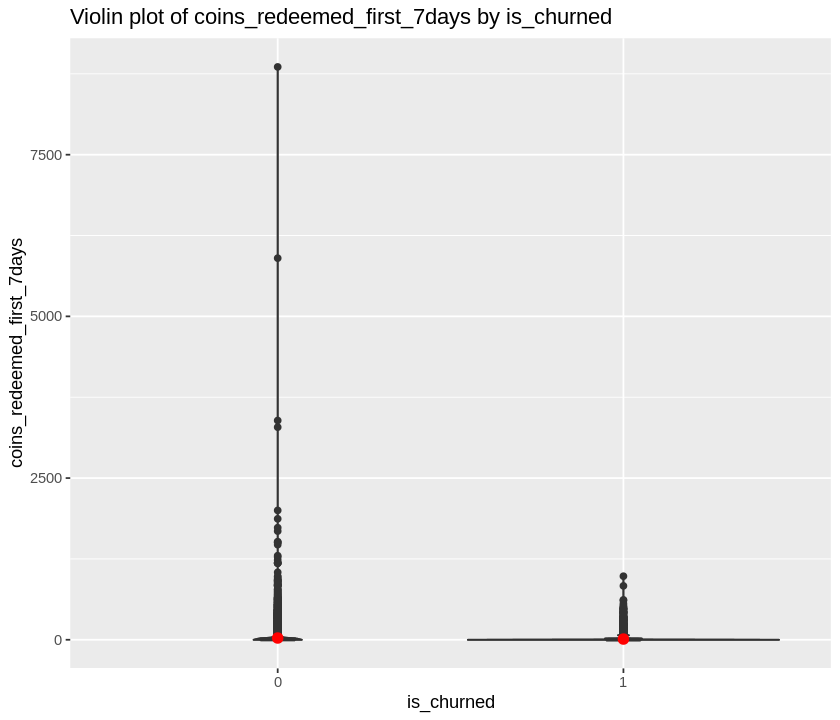

Warning message:
“Removed 2646 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 2646 rows containing non-finite values (`stat_summary()`).”


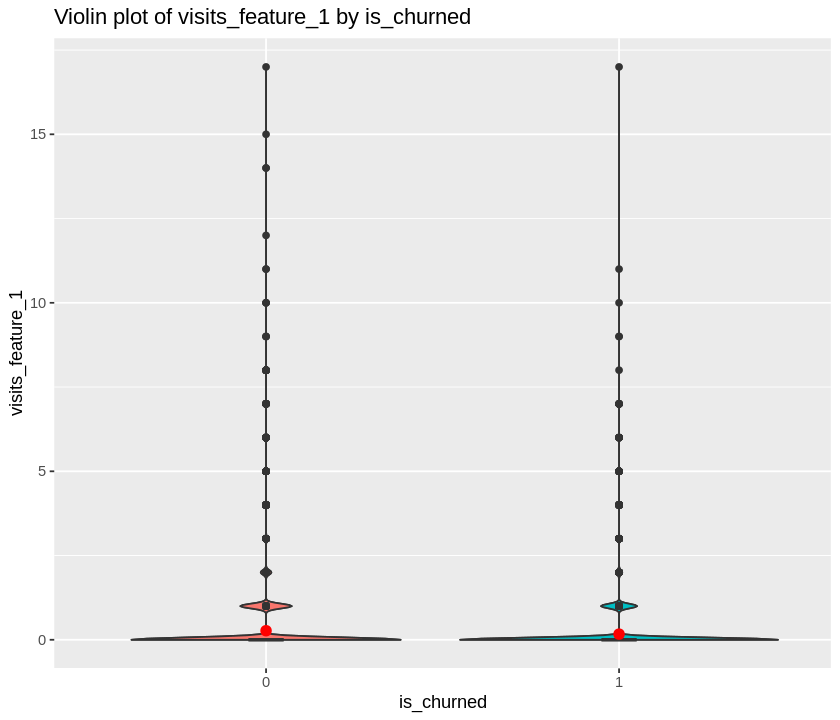

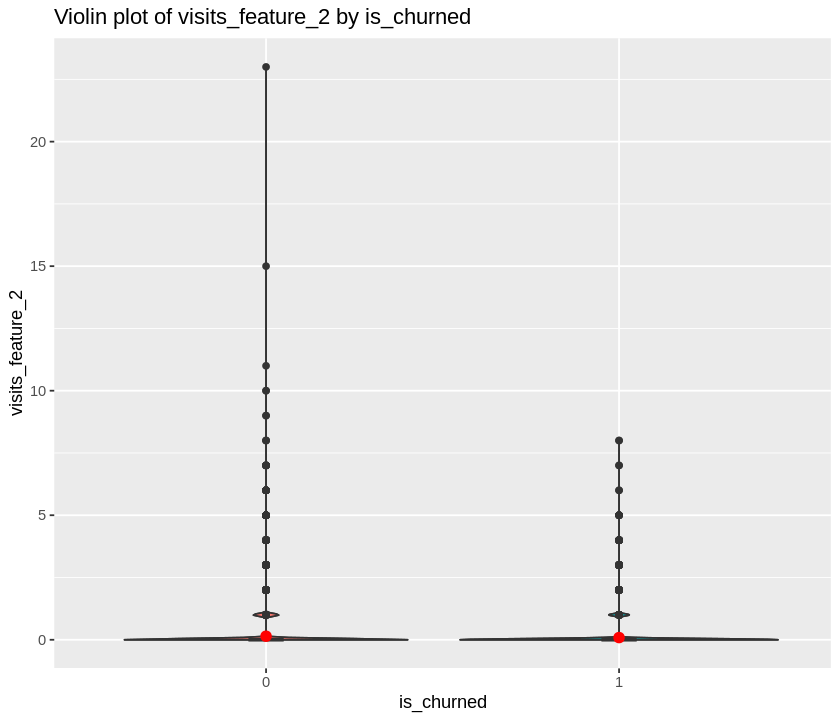

In [ ]:
# Plot violin plots for each numerical variable and the target variable
options(repr.plot.width = 7, repr.plot.height = 6)

for (var in num_vars) {
  print(ggplot(num_target_df, aes_string(x = "is_churned", y = var)) + 
    geom_violin() + 
    ggtitle(paste("Violin plot of", var, "by is_churned")) +
    xlab("is_churned") + ylab(var) +
    geom_violin(aes(fill = is_churned)) + 
    theme(legend.position="none") +
    geom_boxplot(width=.1) + stat_summary(fun=mean, geom="point", shape=20, size=4, color="red", fill="red"))
}


- Podemos observar la distribución de cada variable numérica para los diferentes niveles (0 y 1) de la variable categórica objetivo (is_churned). 
- Podemos visualizar los outliers y comparar la media y la mediana de cada variable numérica respecto a cada nivel de la variable target.

##### Frequency polygon

Un frequency polygon es un gráfico que se utiliza para mostrar la forma de la distribución de un conjunto de datos continuos. Se trata de un gráfico lineal de una distribución de frecuencias en el que las frecuencias se trazan frente a los puntos medios de los intervalos de clase. La forma del polígono muestra el patrón general de la distribución.

En este caso, los polígonos de frecuencias se utilizan para visualizar la distribución de cada variable numérica en relación con la variable objetivo (is_churned). Los polígonos están coloreados por los niveles de la variable objetivo para visualizar cualquier diferencia en las distribuciones entre los dos niveles.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 142 rows containing non-finite values (`stat_bin()`).”


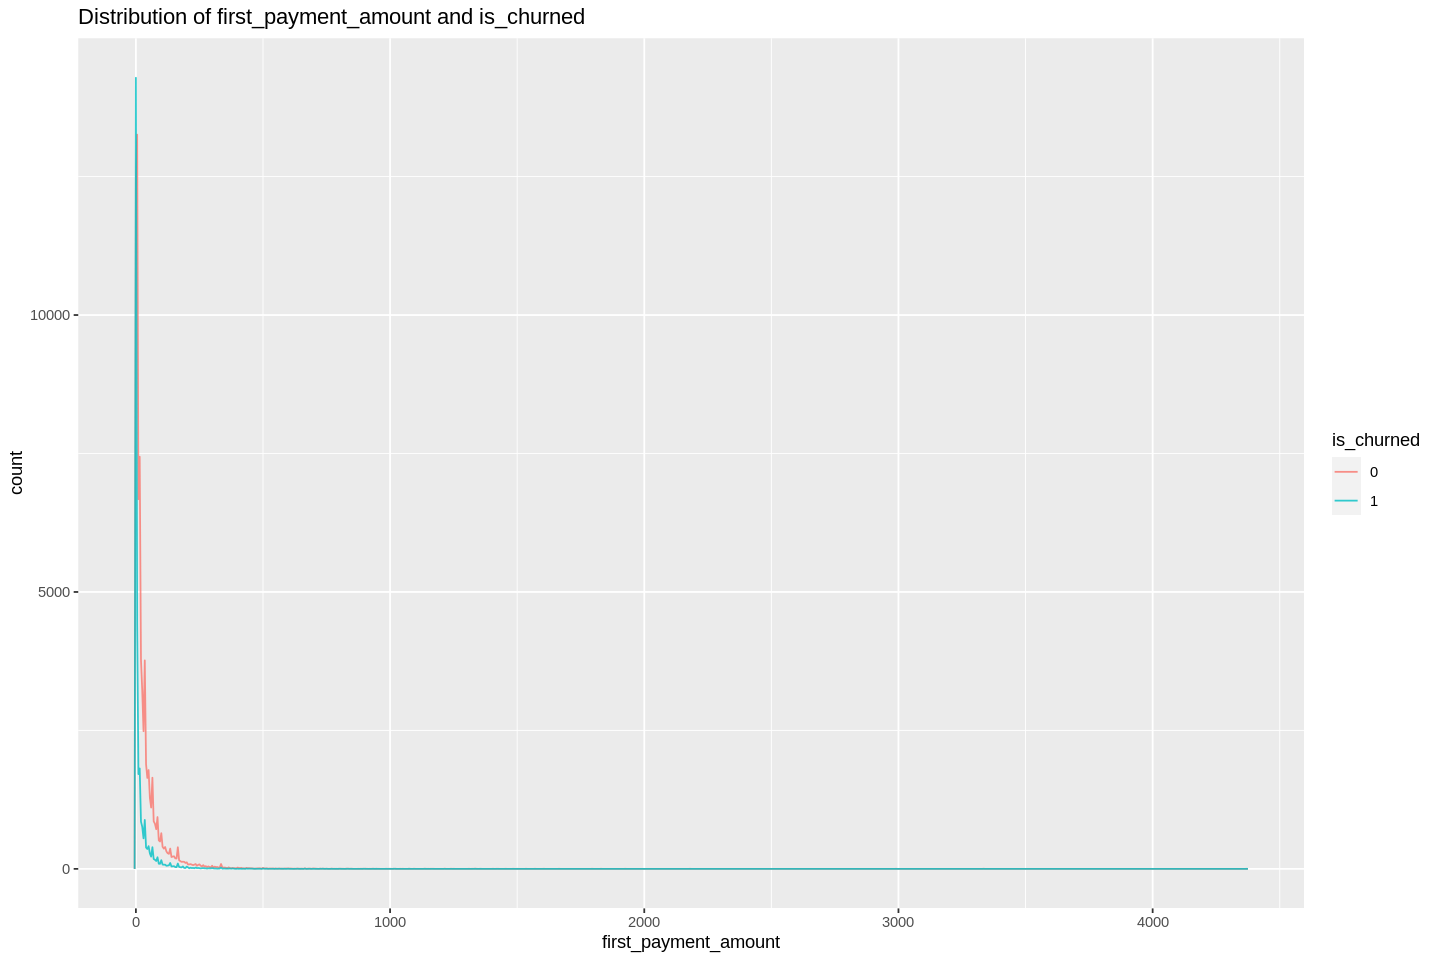

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”


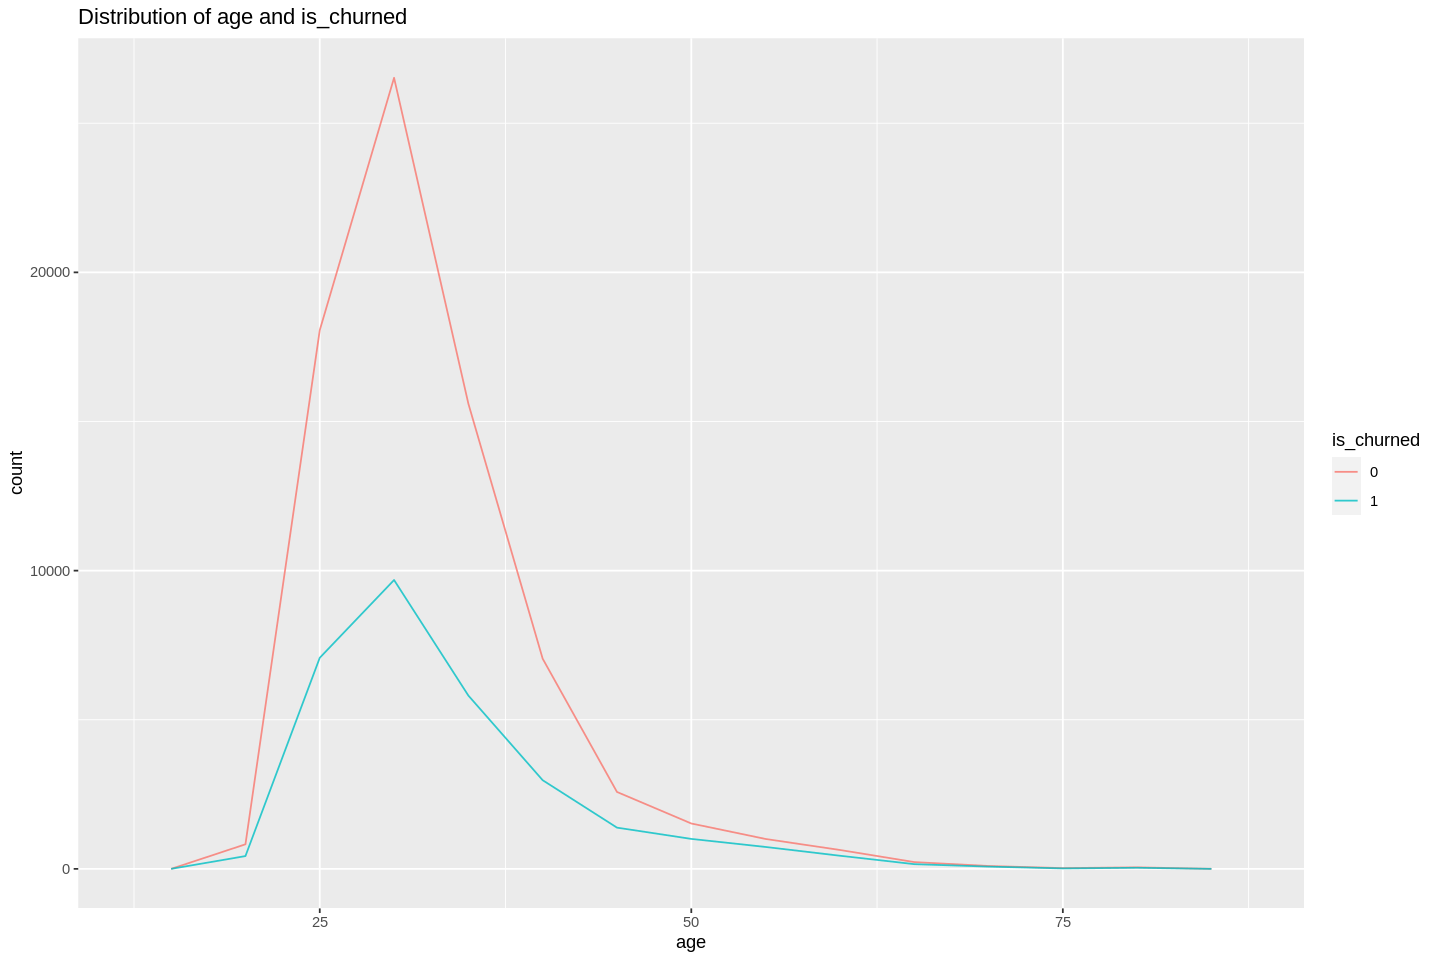

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”


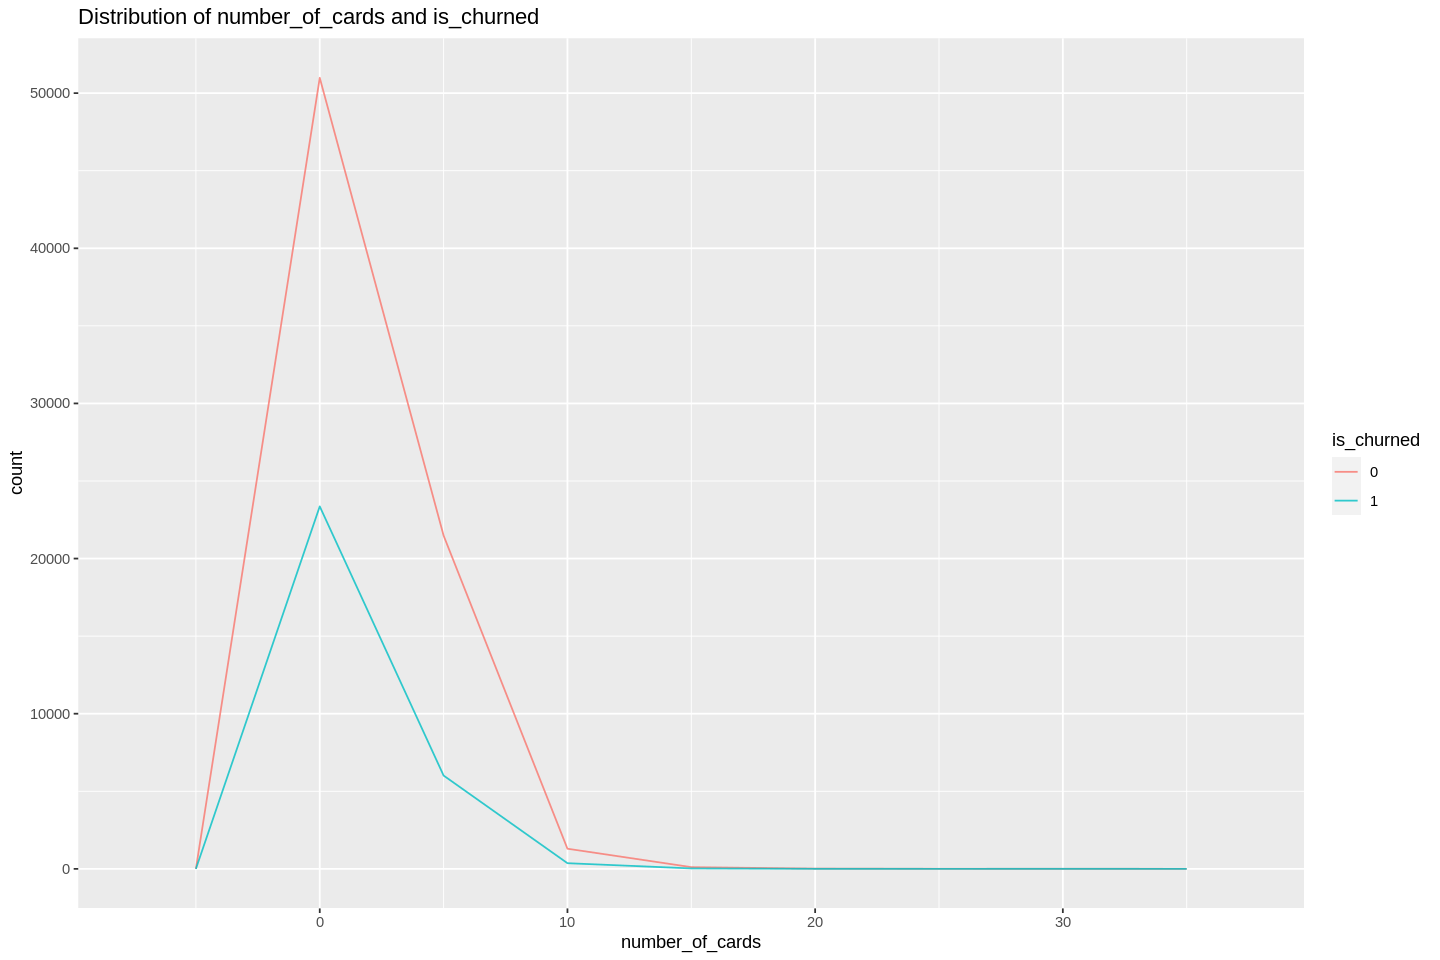

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”


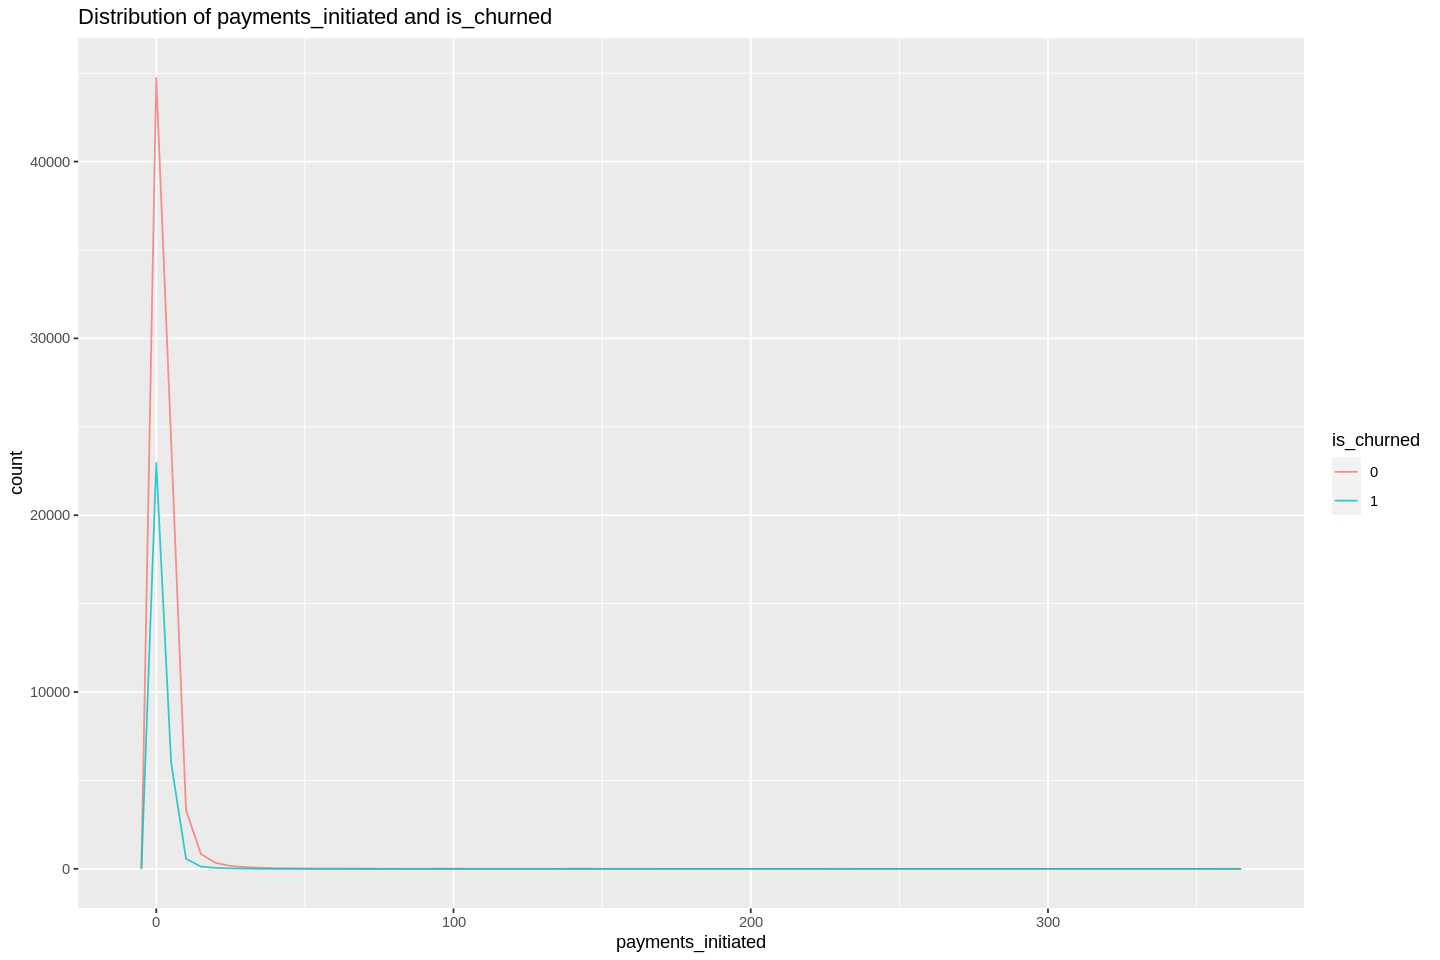

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”


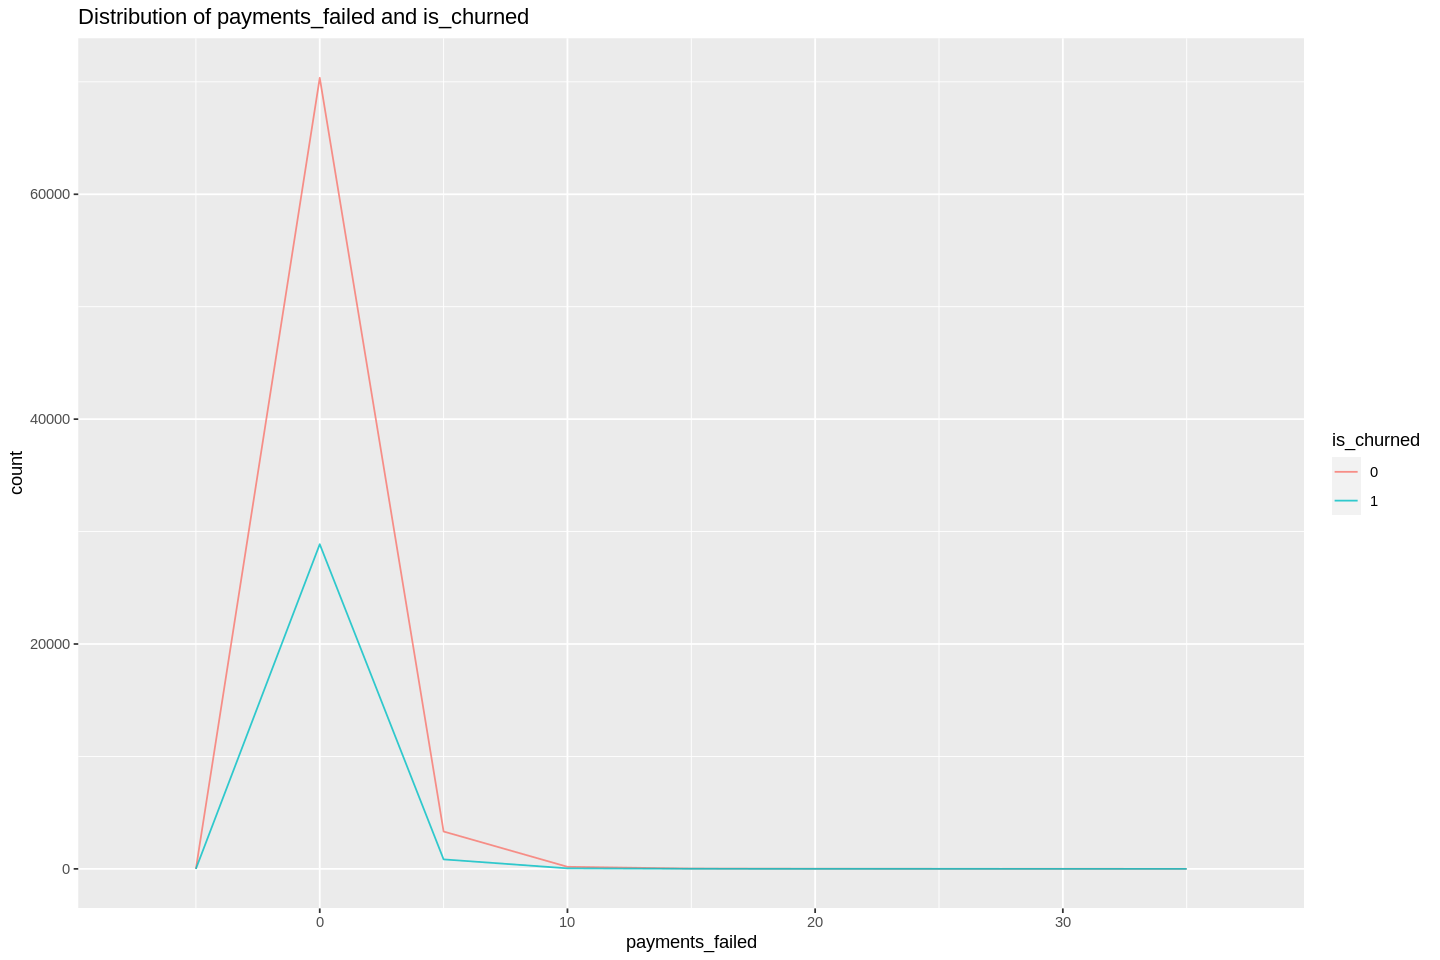

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”


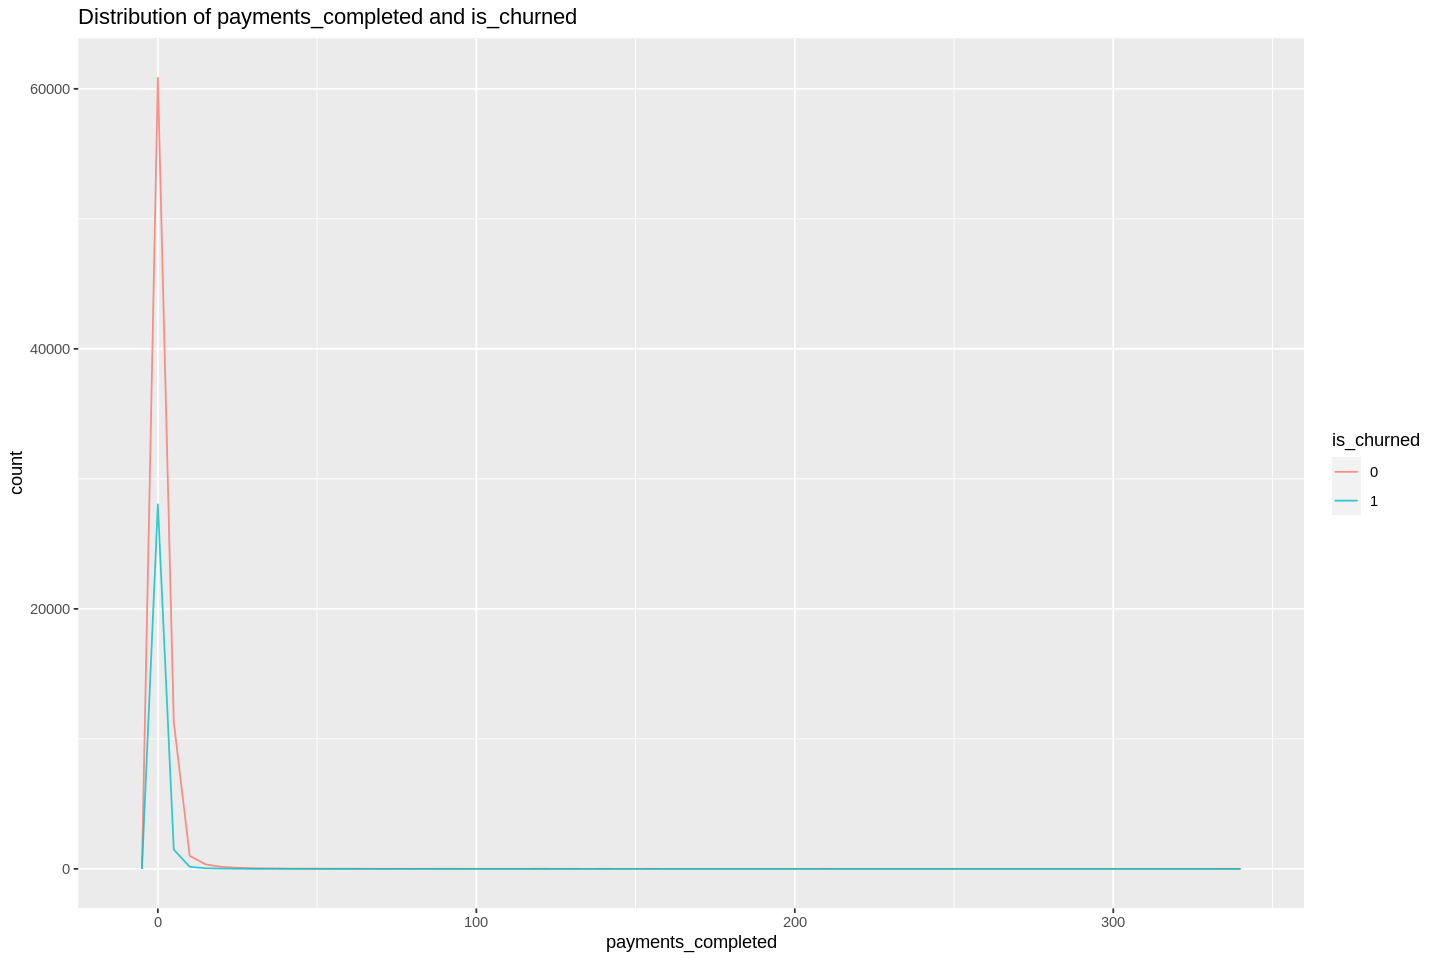

Warning message:
“Removed 23264 rows containing non-finite values (`stat_bin()`).”


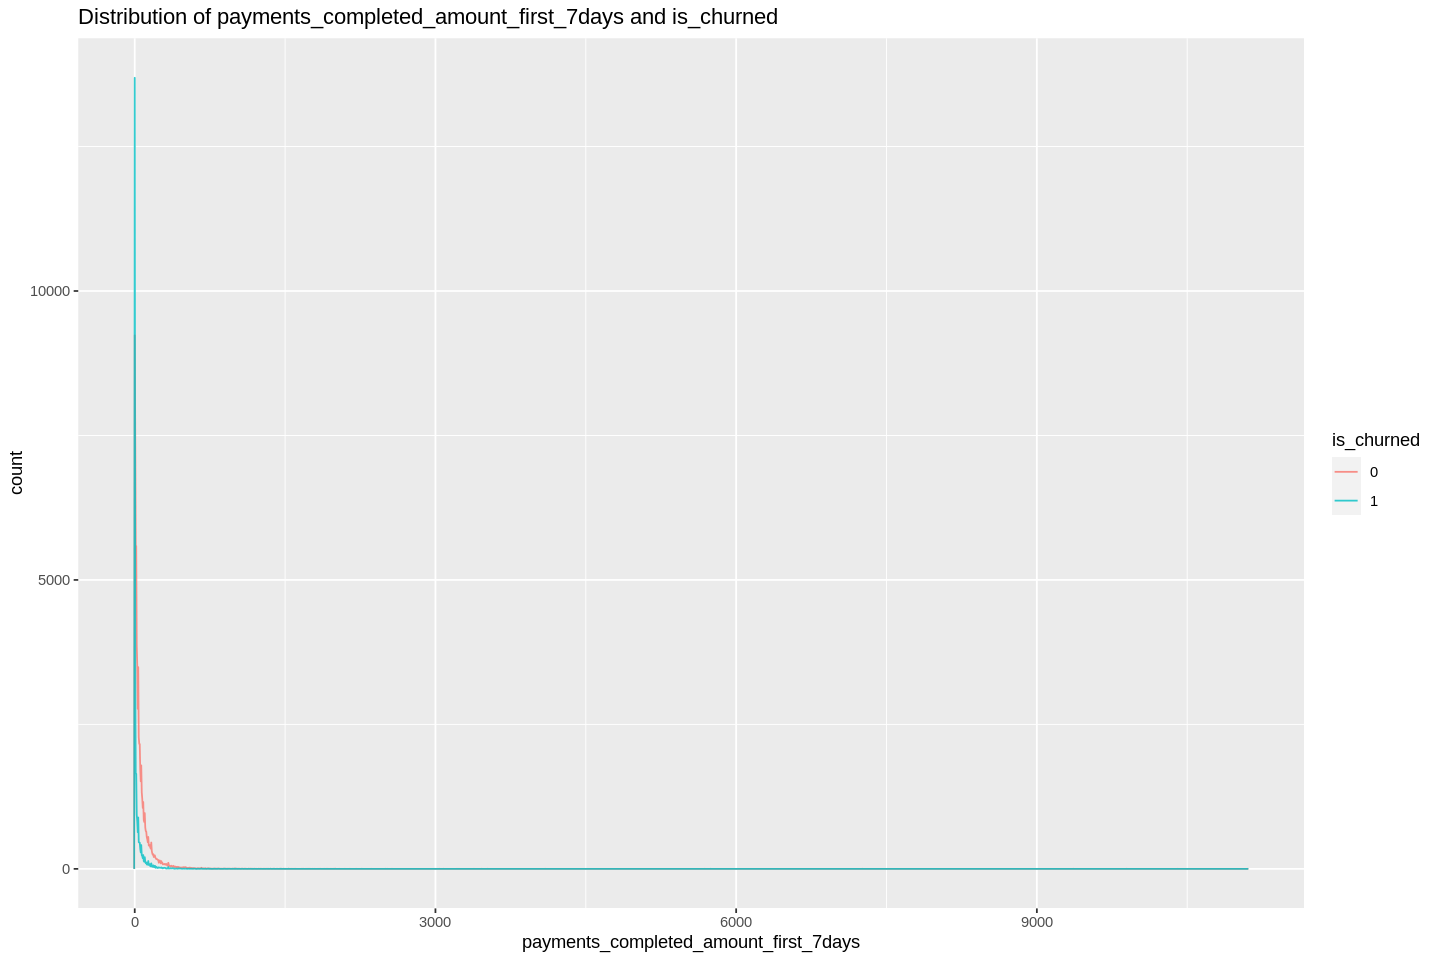

Warning message:
“Removed 472 rows containing non-finite values (`stat_bin()`).”


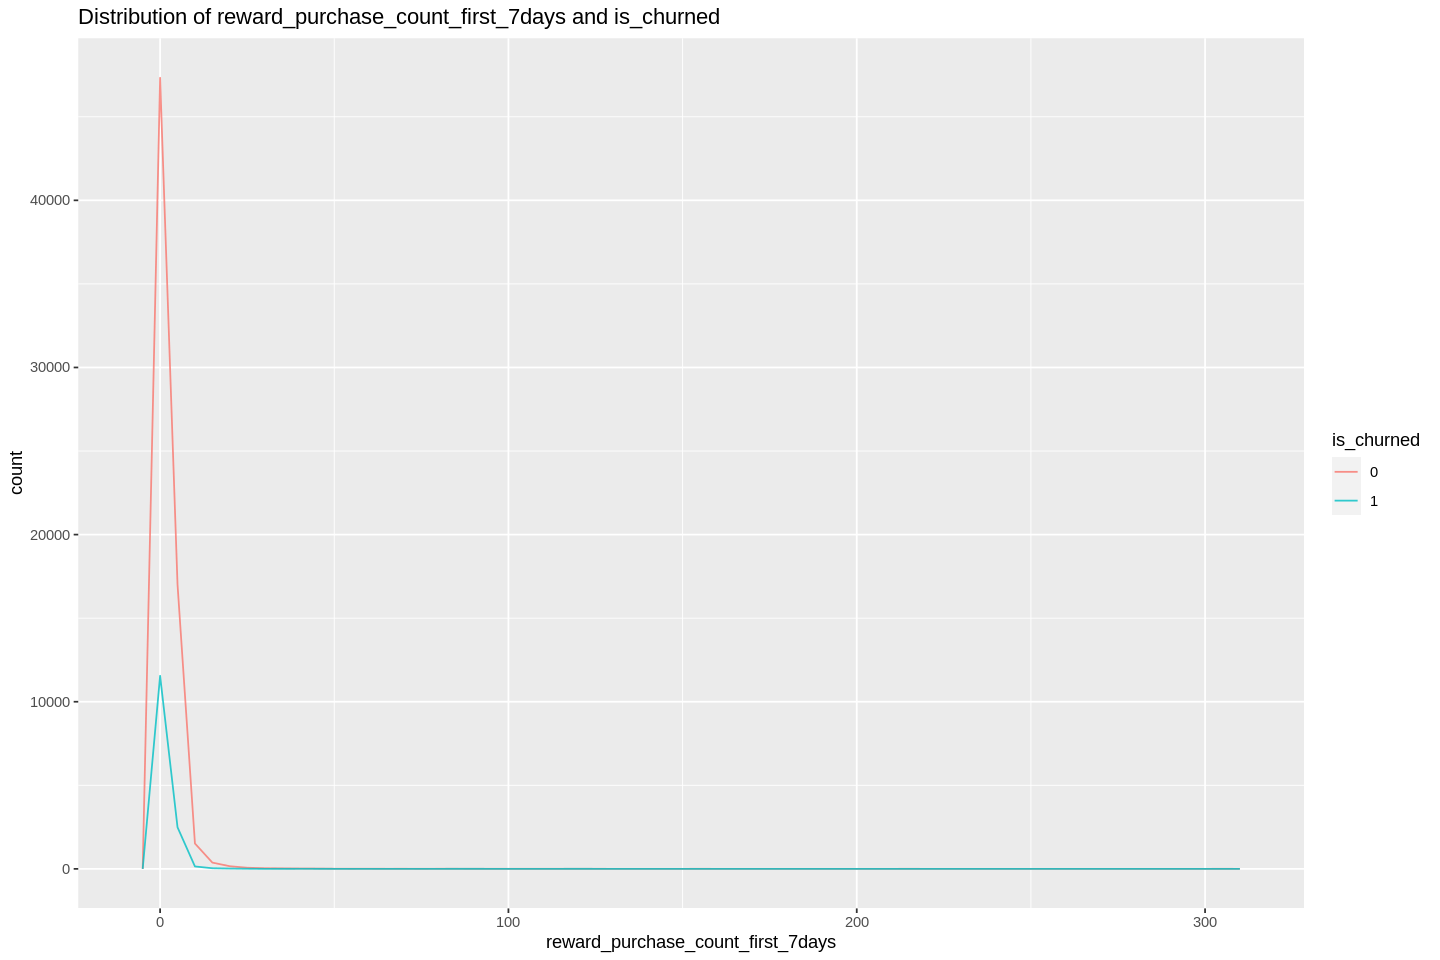

Warning message:
“Removed 2646 rows containing non-finite values (`stat_bin()`).”


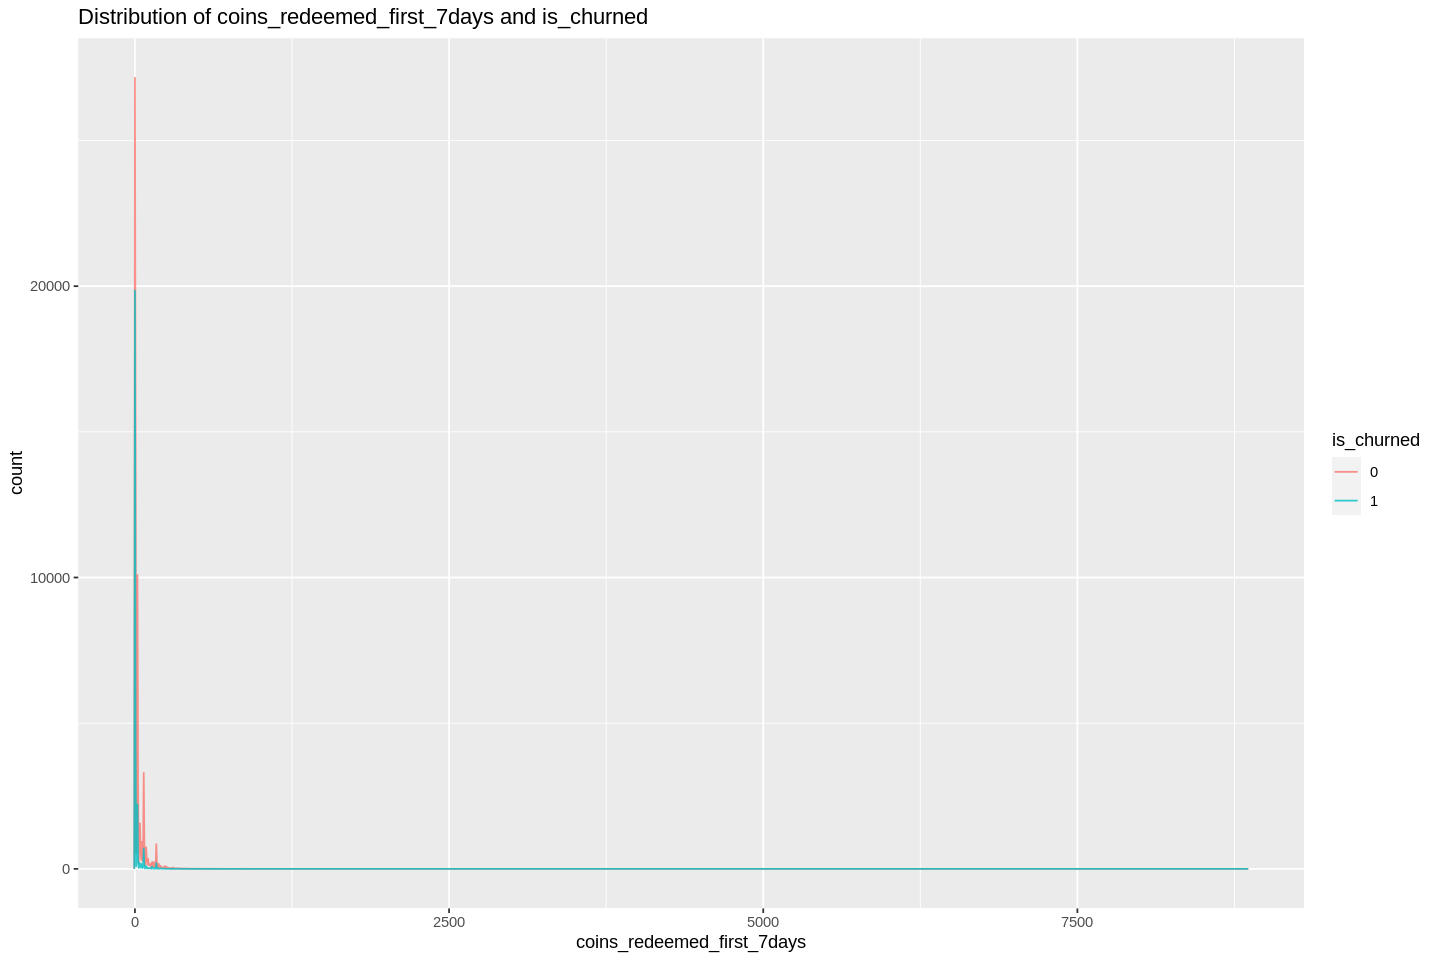

Warning message:
“Removed 2646 rows containing non-finite values (`stat_bin()`).”


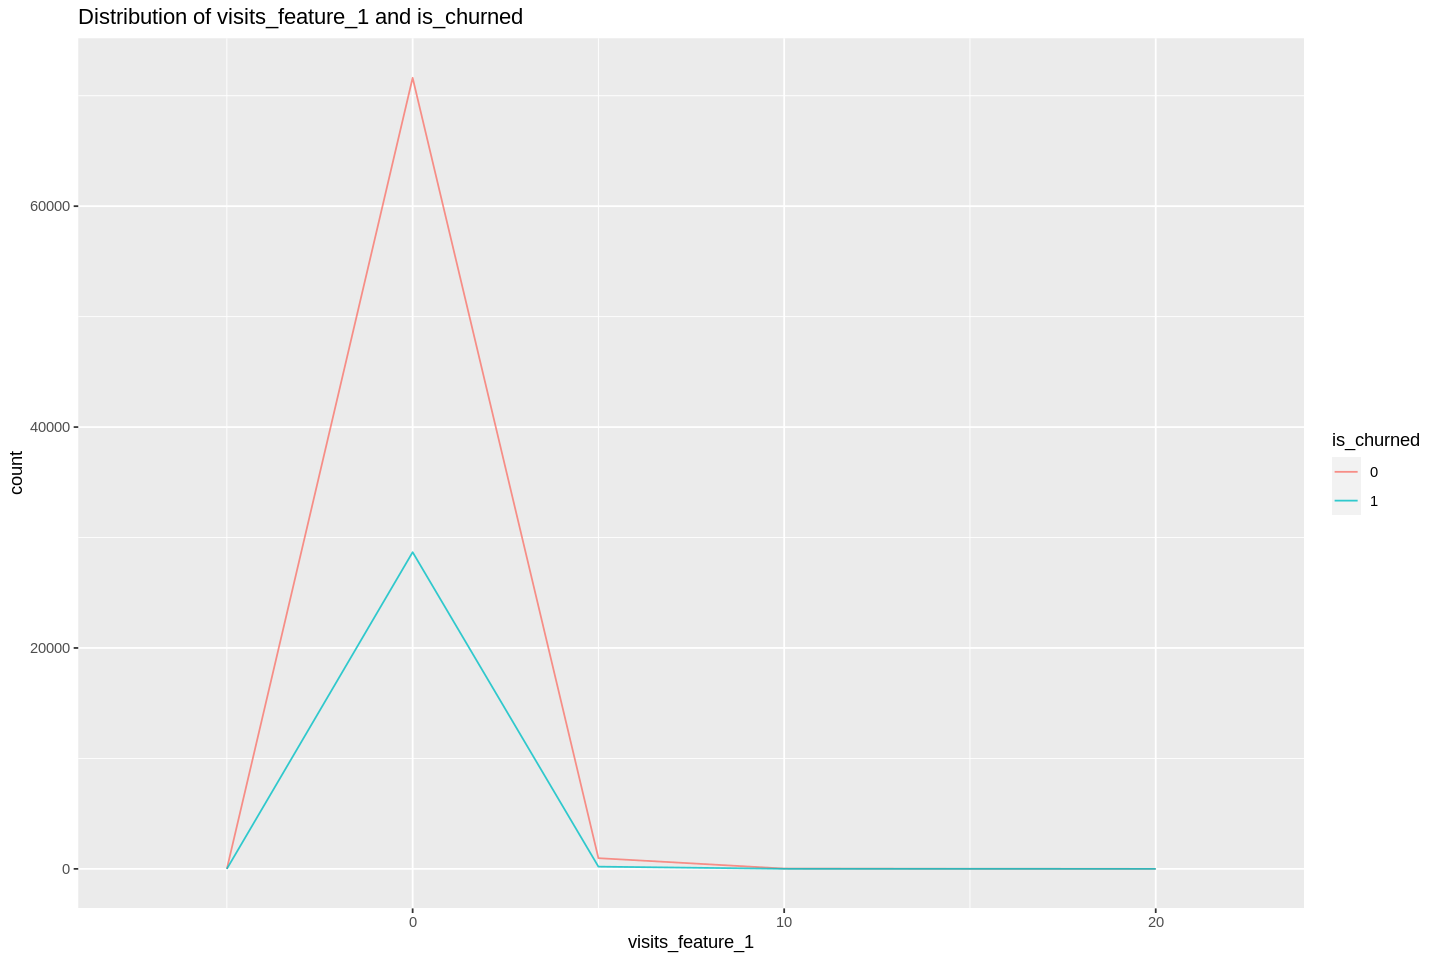

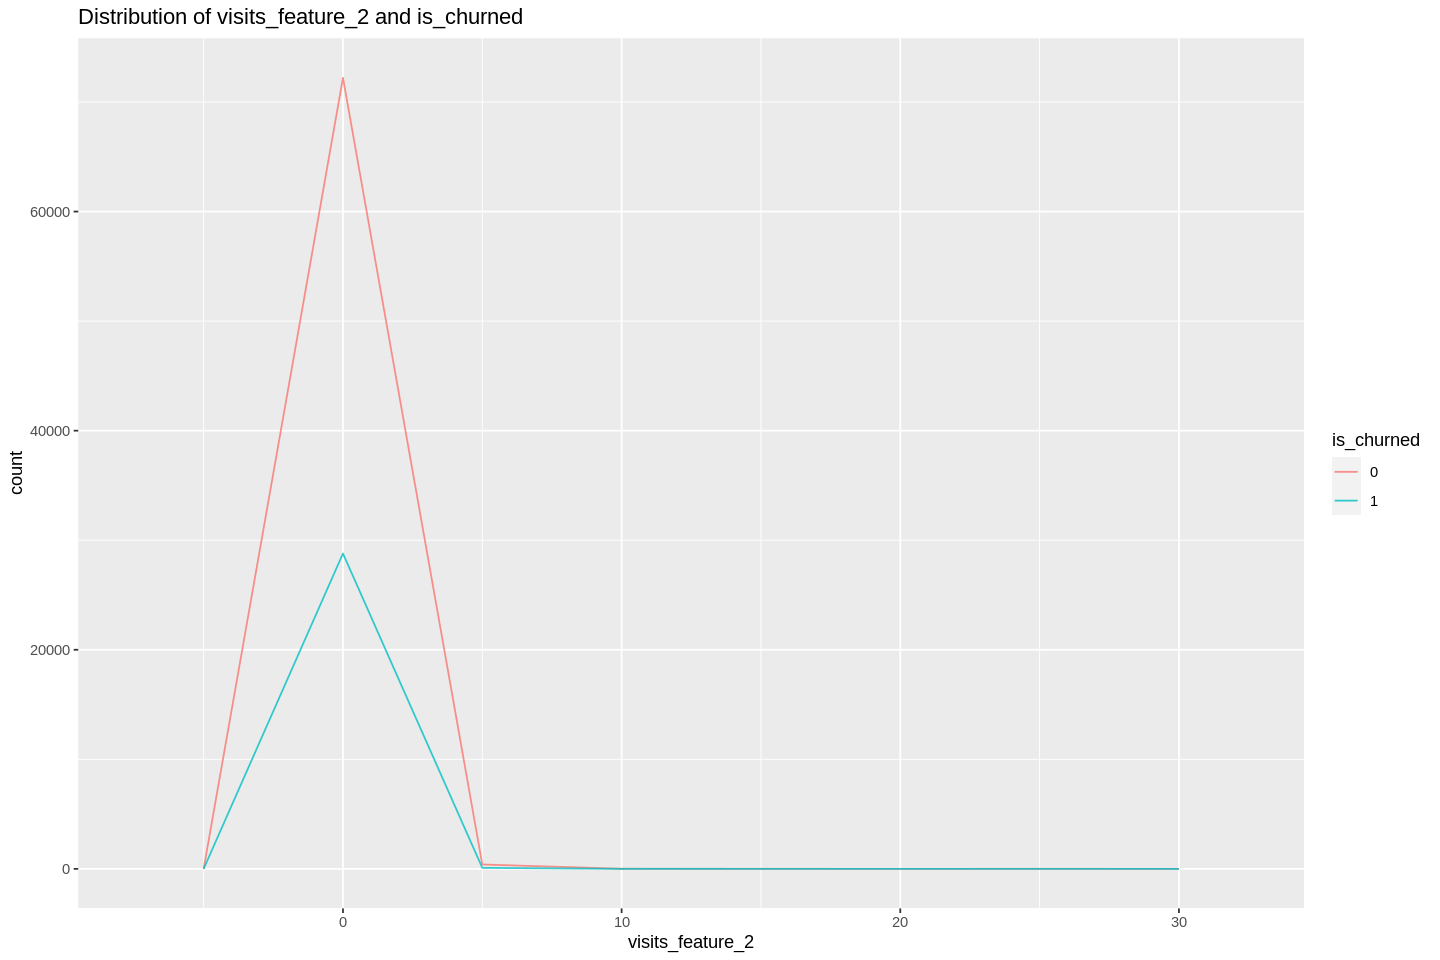

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

# Plot frequency polygons for each numerical variable and the target variable
for (var in num_vars) {
    print(
        ggplot(num_target_df, aes_string(x = var, color = 'is_churned')) + 
        geom_freqpoly(alpha = 0.8, size = 0.5, binwidth = 5) +
        ggtitle(paste("Distribution of", var, "and is_churned")) +
        xlab(var)  +
        scale_fill_manual(values = c("blue", "red")) 
        # + xlim(0, max(num_target_df[[var]]))
    )
}

##### Density plot

- Creamos gráficos de densidad para cada variable numérica y la variable objetivo (is_churned). 
- Esto es útil para visualizar la distribución de cada variable numérica en relación con la variable objetivo y puede proporcionar información sobre los posibles predictores del churn.

Warning message:
“Removed 142 rows containing non-finite values (`stat_density()`).”


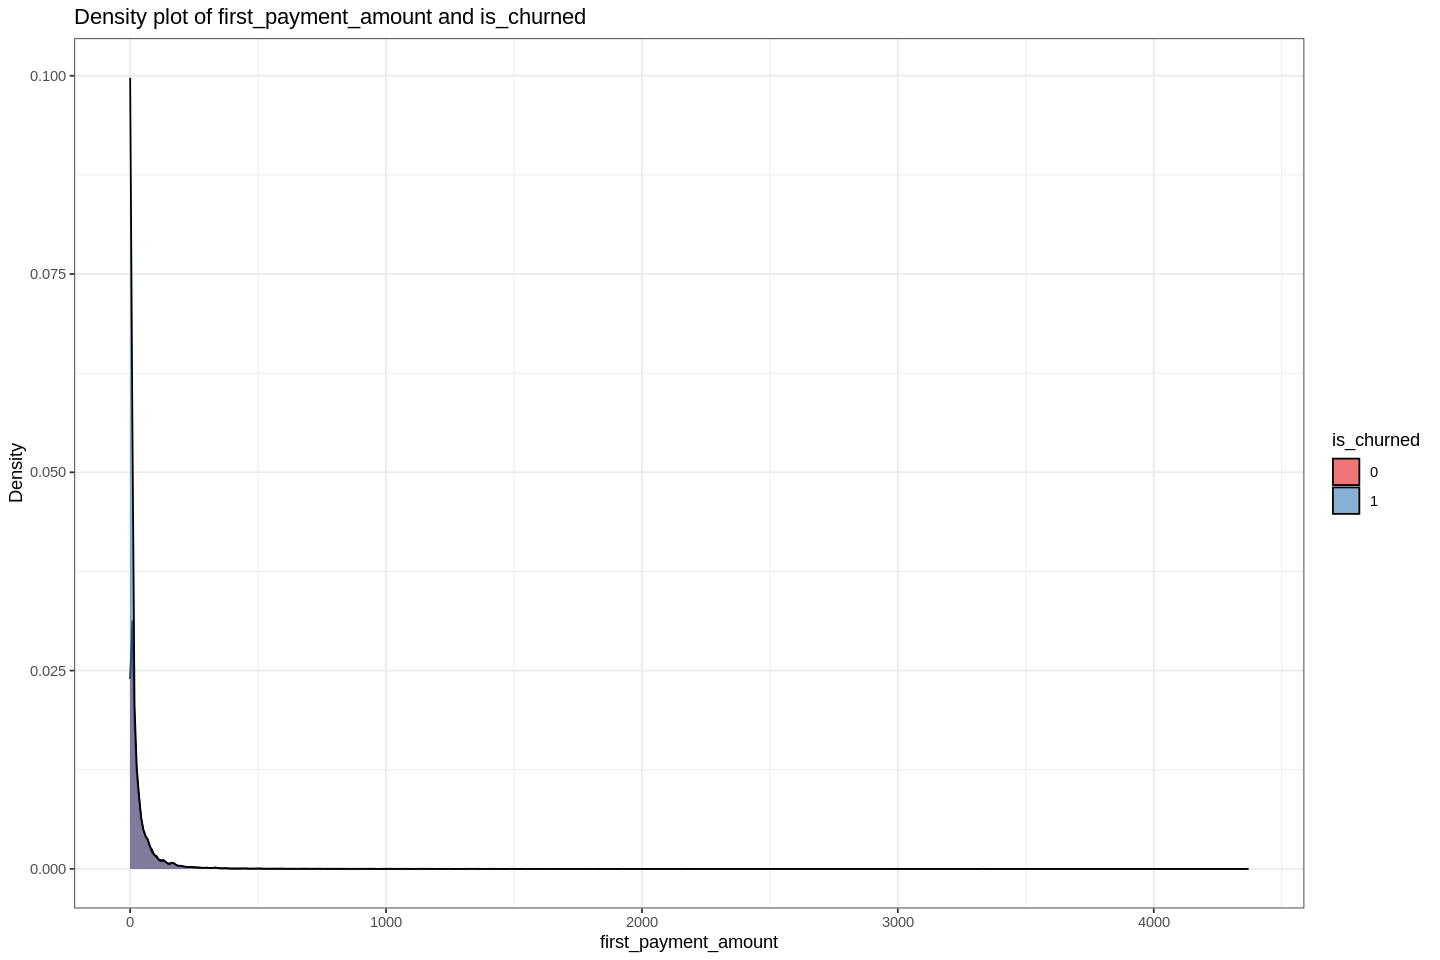

Warning message:
“Removed 472 rows containing non-finite values (`stat_density()`).”


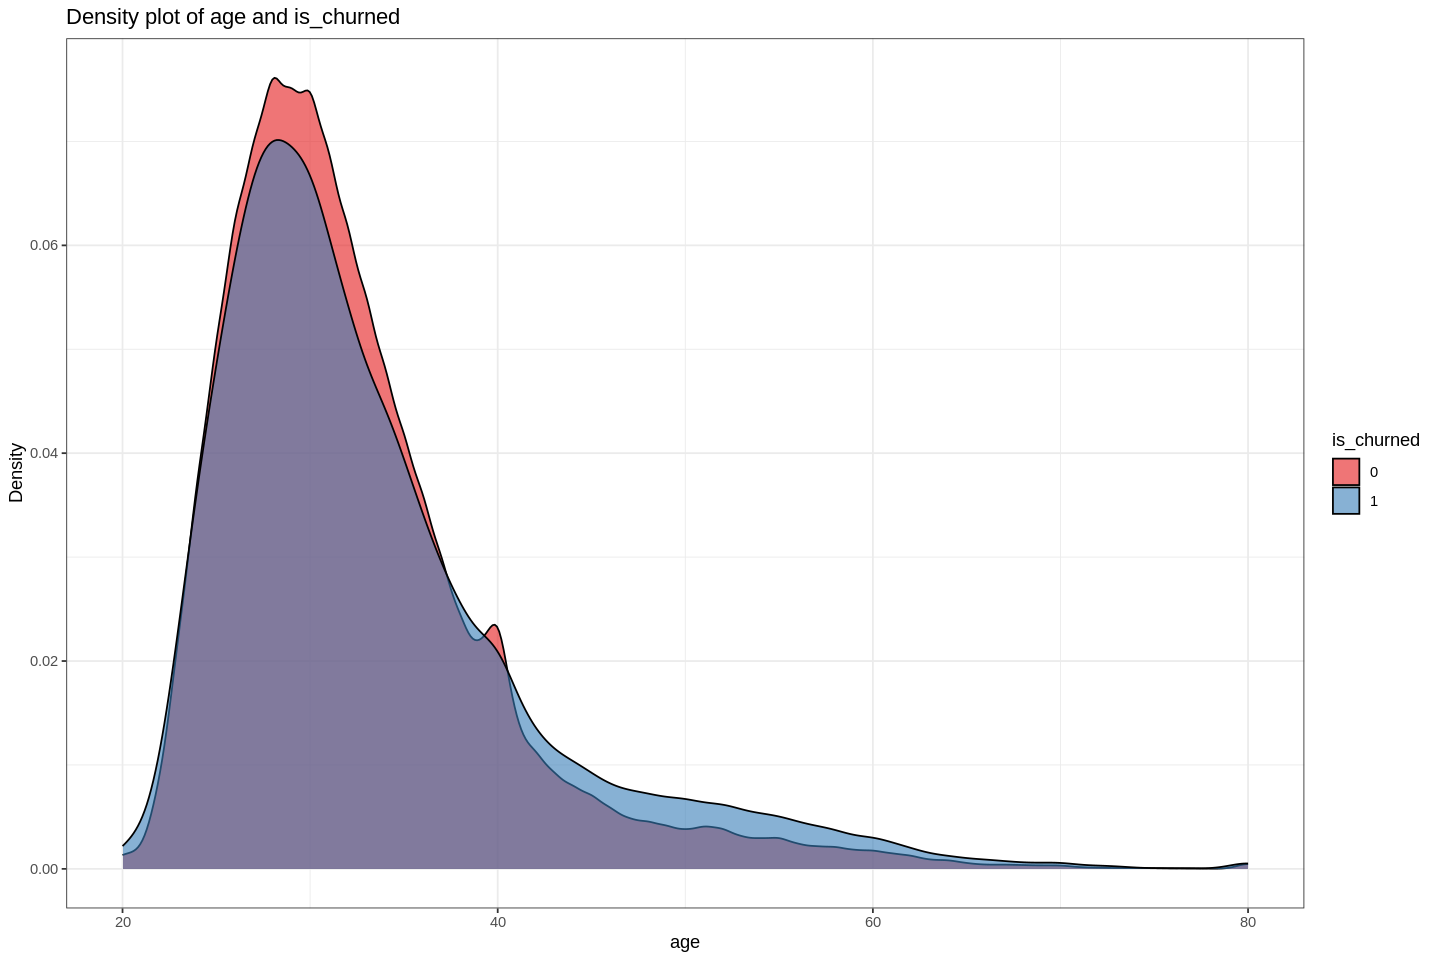

Warning message:
“Removed 472 rows containing non-finite values (`stat_density()`).”


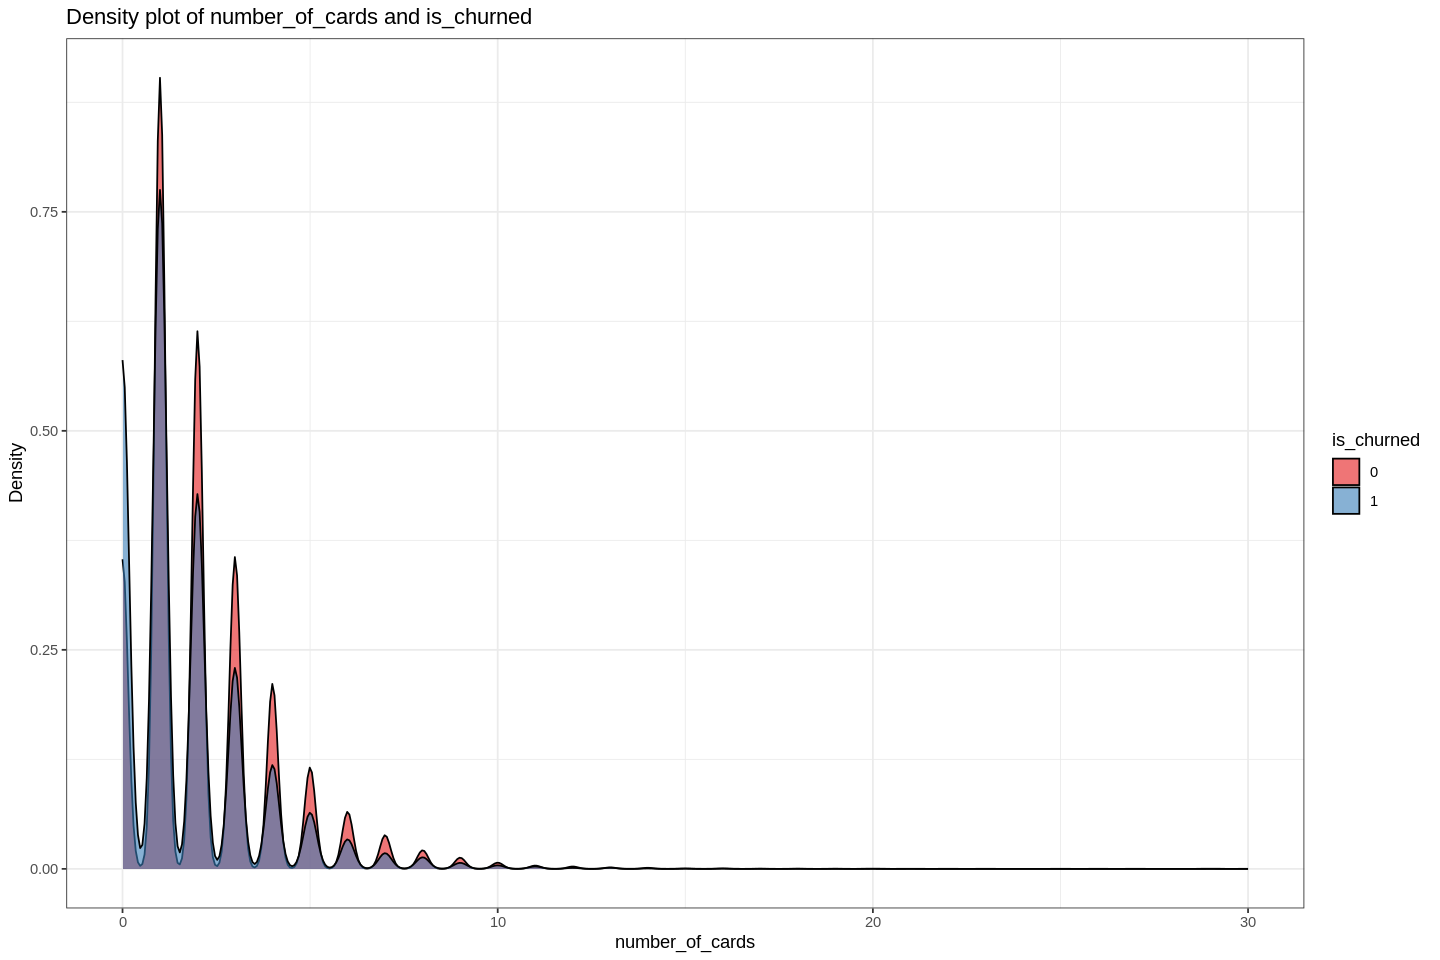

Warning message:
“Removed 472 rows containing non-finite values (`stat_density()`).”


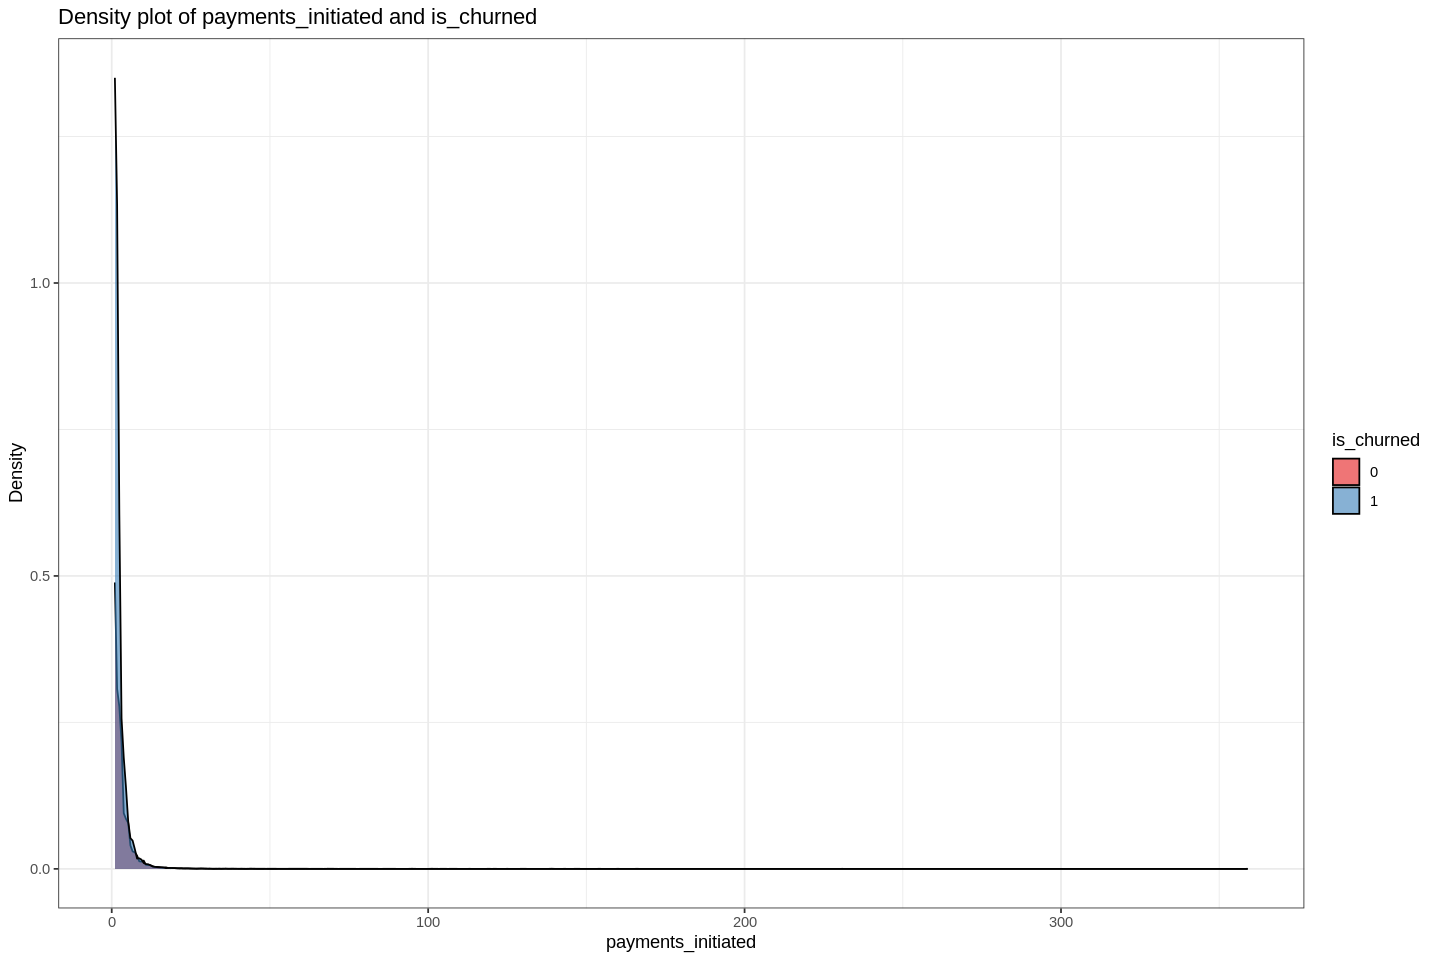

Warning message:
“Removed 472 rows containing non-finite values (`stat_density()`).”


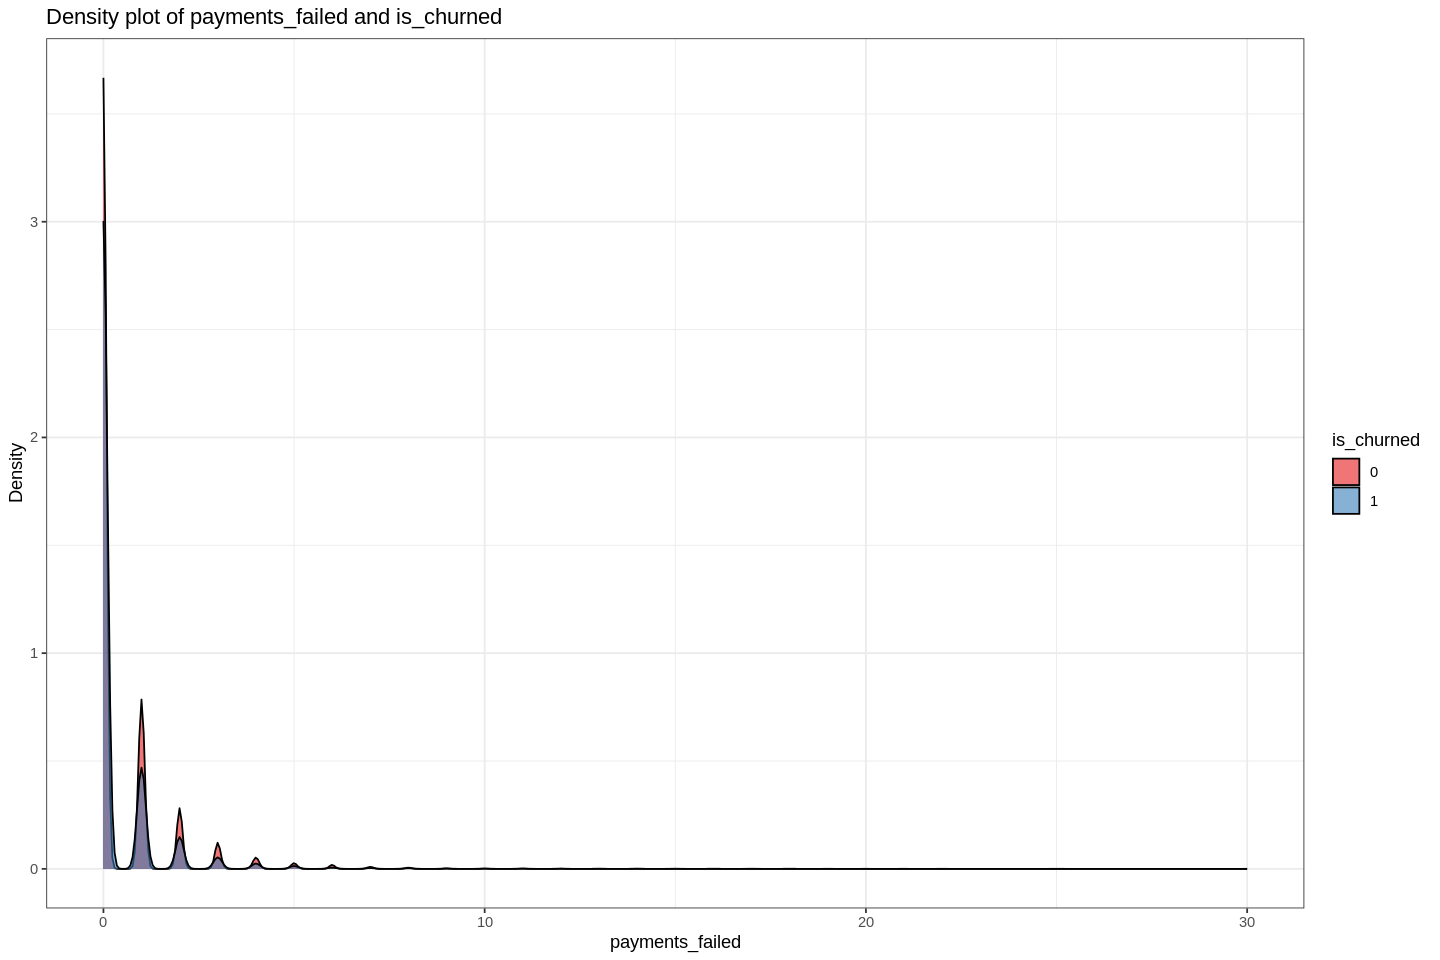

Warning message:
“Removed 472 rows containing non-finite values (`stat_density()`).”


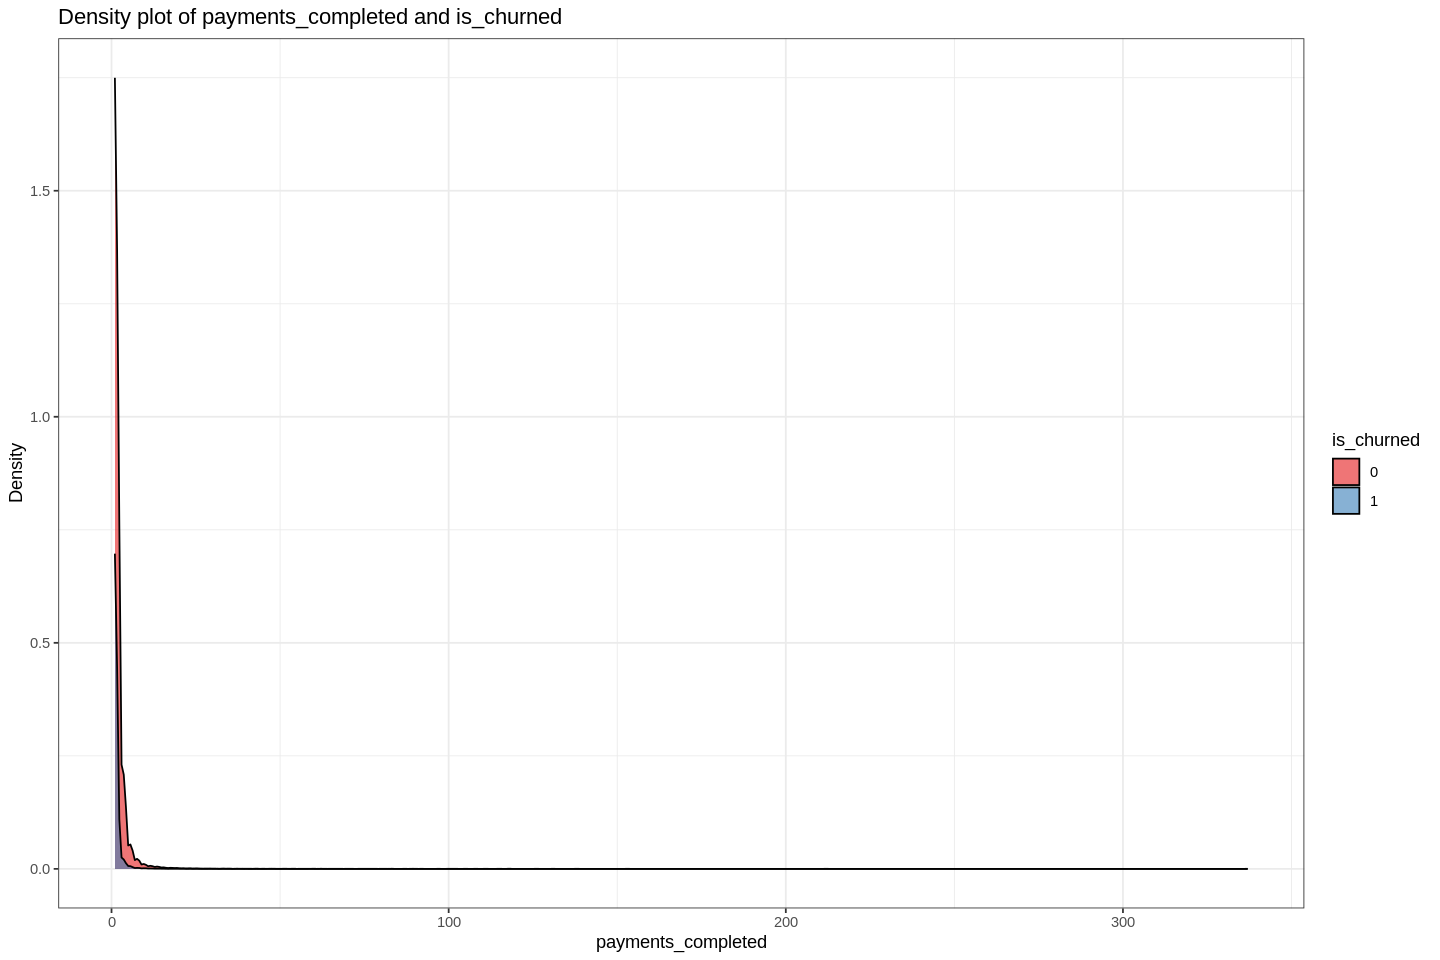

Warning message:
“Removed 23264 rows containing non-finite values (`stat_density()`).”


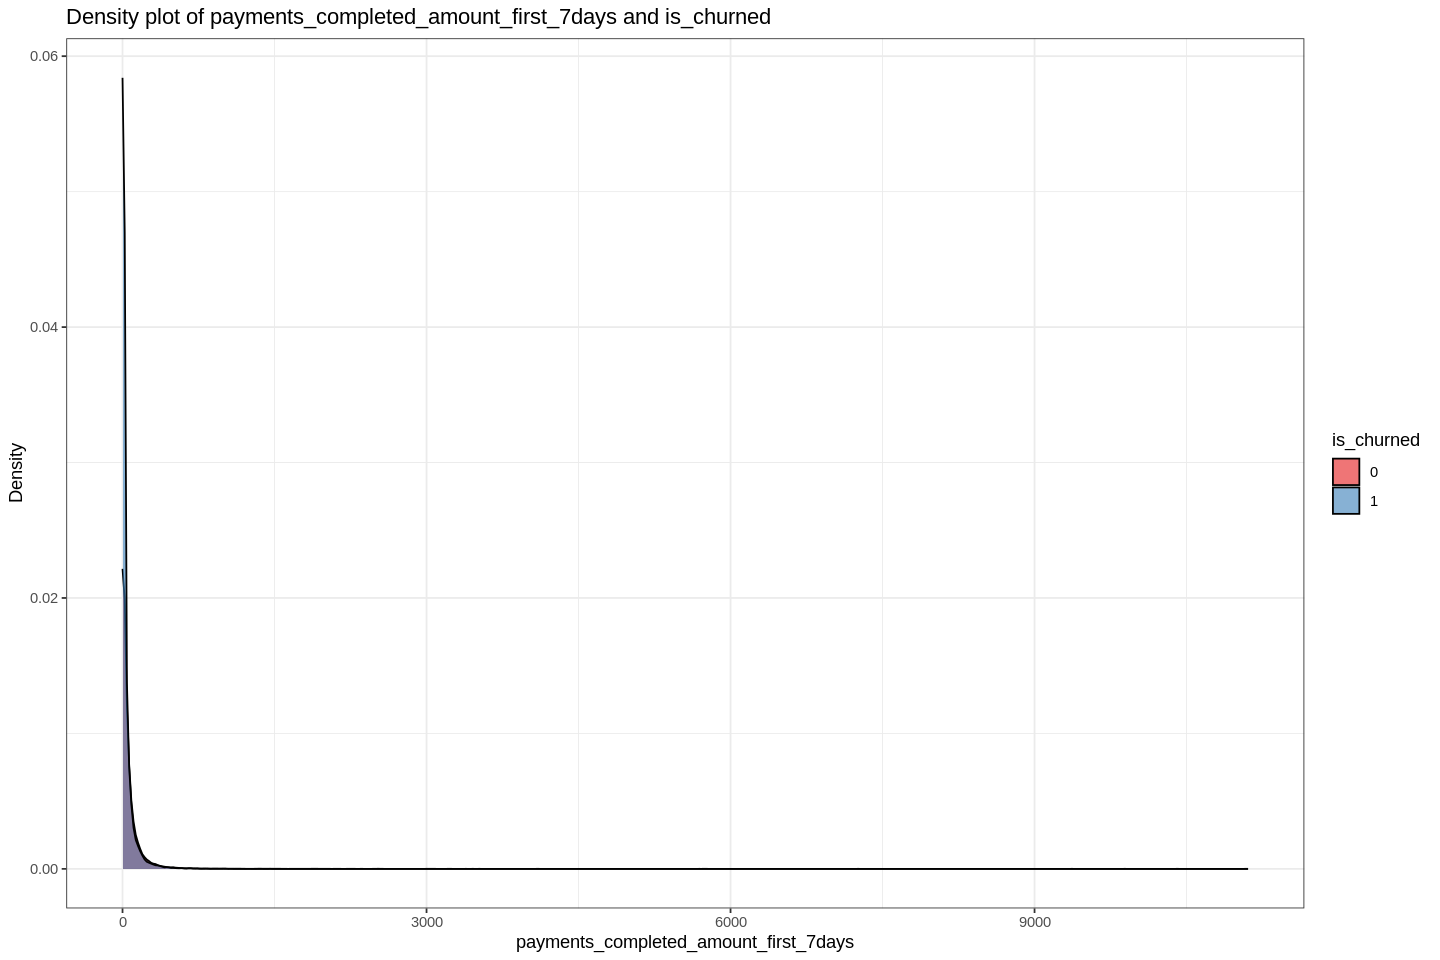

Warning message:
“Removed 472 rows containing non-finite values (`stat_density()`).”


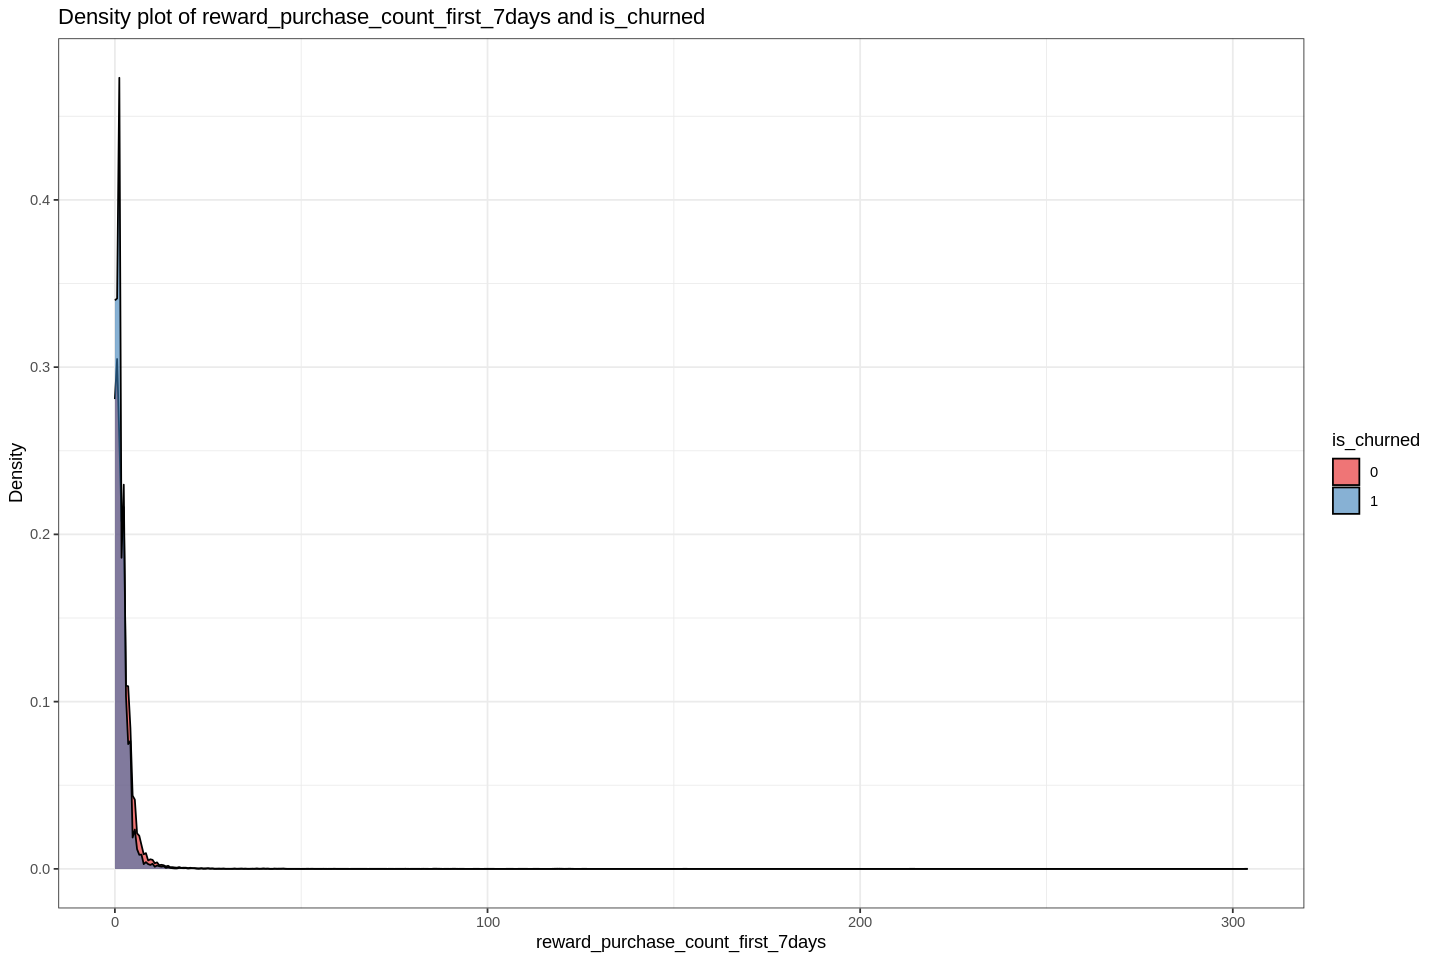

Warning message:
“Removed 2646 rows containing non-finite values (`stat_density()`).”


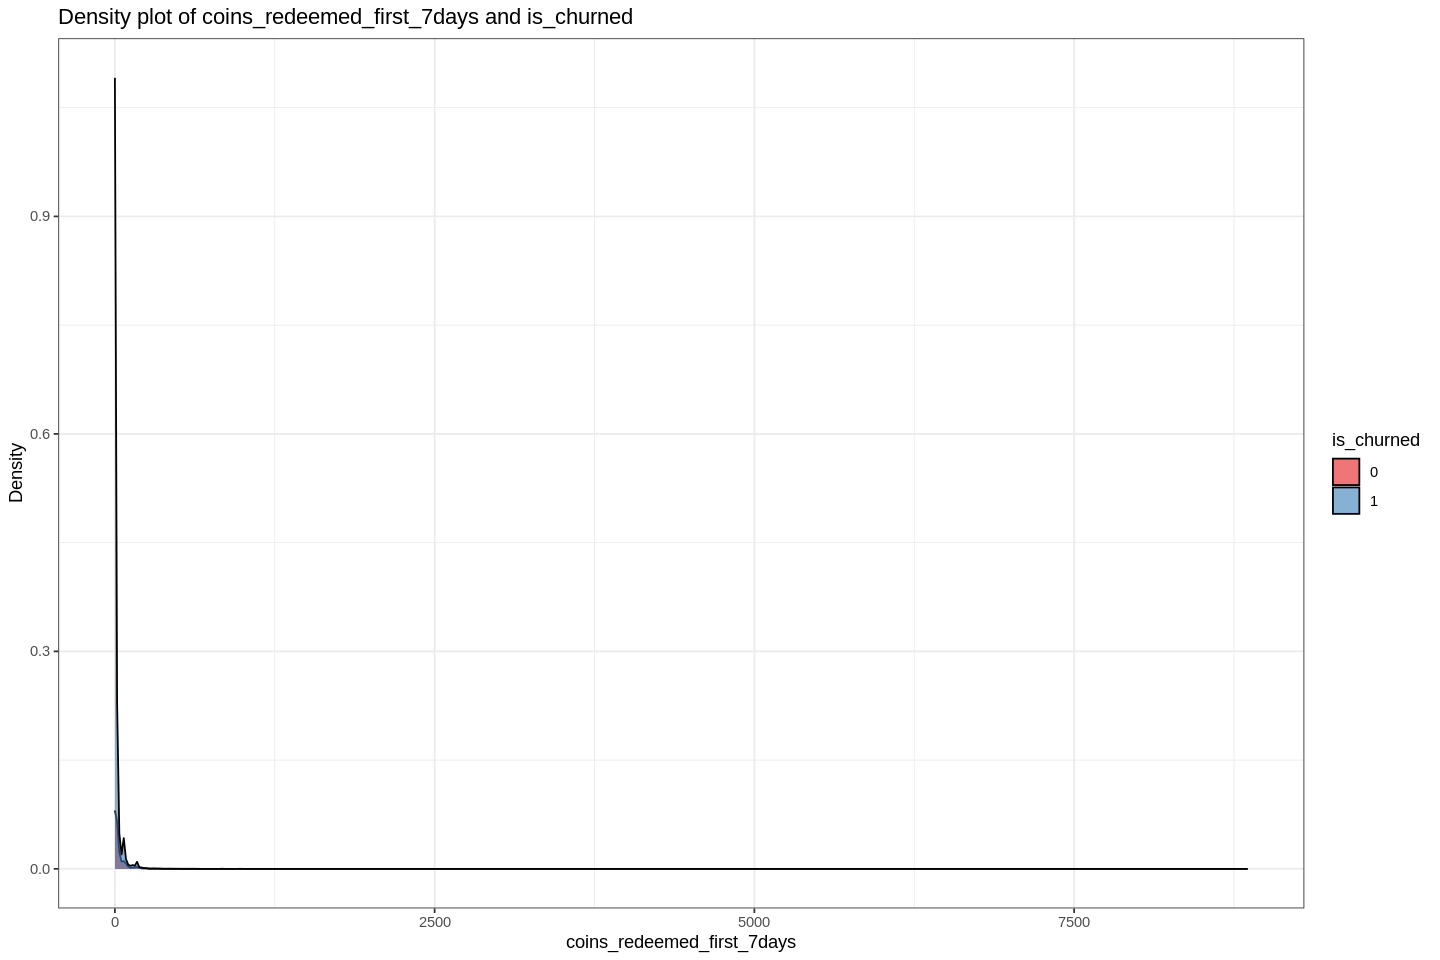

Warning message:
“Removed 2646 rows containing non-finite values (`stat_density()`).”


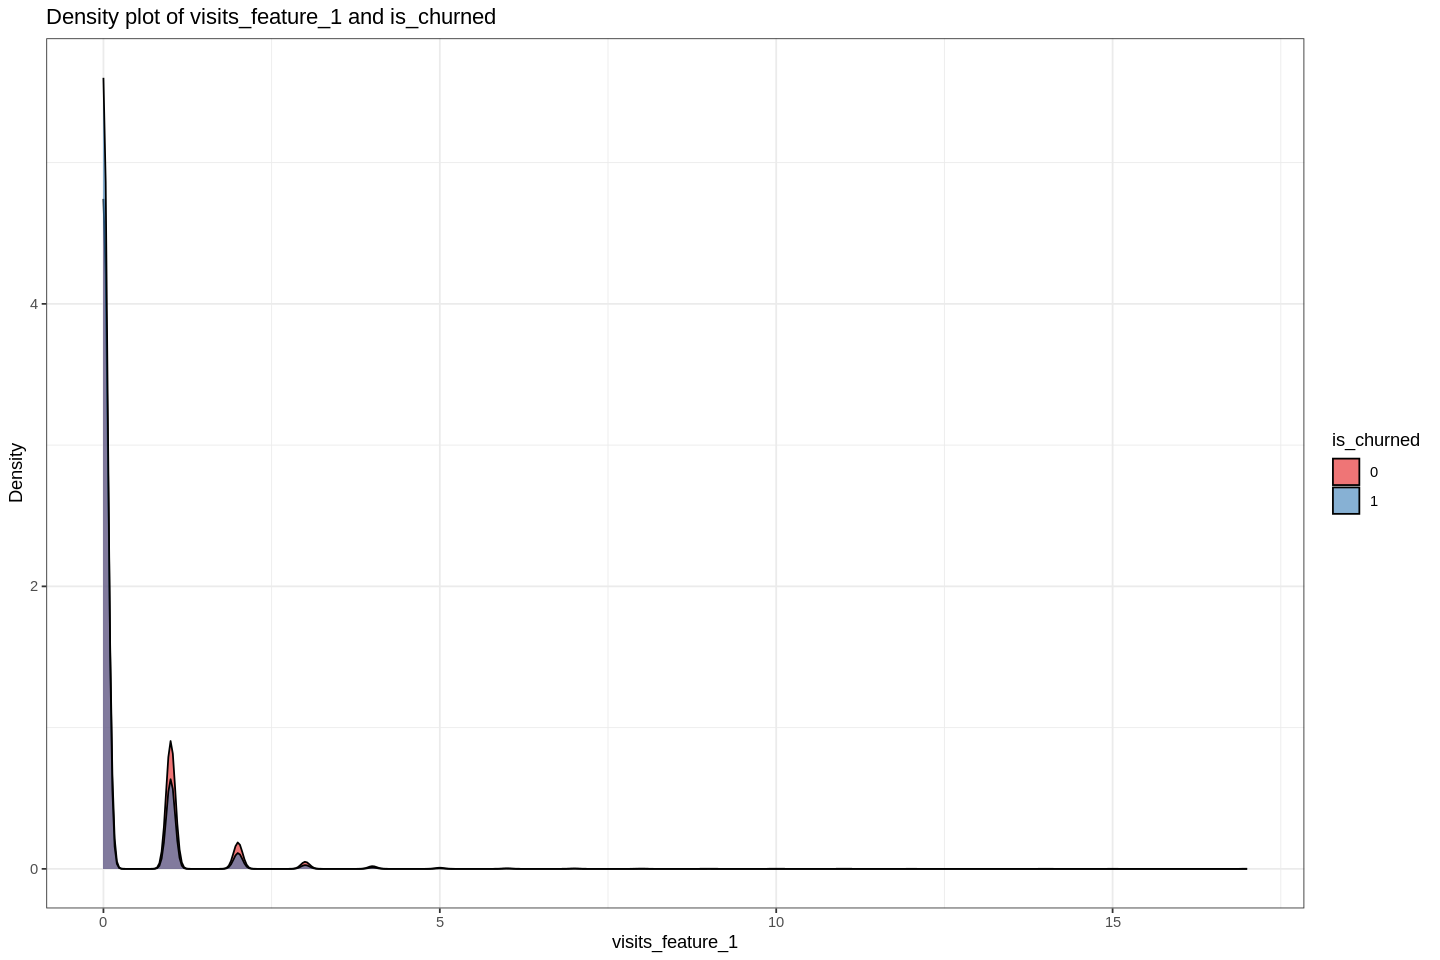

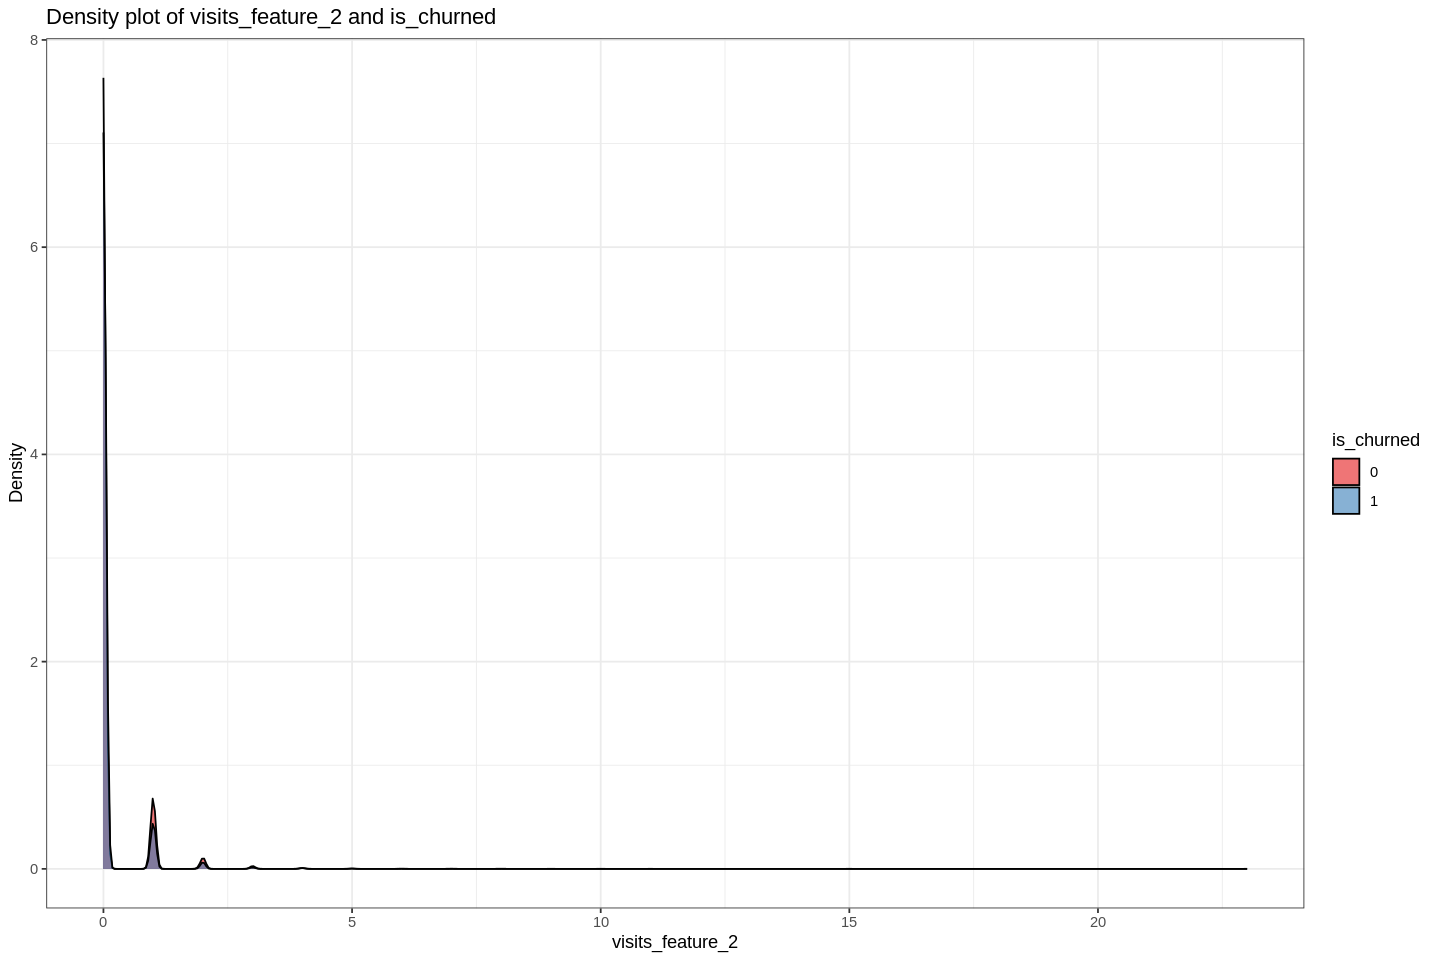

In [ ]:
# Define color scheme
color_scheme <- brewer.pal(9, "Set1")

# Plot density plots for each numerical variable and the target variable
for (var in num_vars) {
  print(
    ggplot(num_target_df, aes_string(x = var, fill = 'is_churned')) + 
    geom_density(alpha = 0.6) +
    ggtitle(paste("Density plot of", var, "and is_churned")) +
    xlab(var) + ylab("Density") +
    scale_fill_manual(values = c(color_scheme[1], color_scheme[2])) +
    theme_bw()
  )
}

#### Relación entre las variables categóricas y is_churned 

##### is_referral, given_permission_1 y given_permission_2 vs is_churned

Creamos gráficos de barras para cada variable categórica binaria del conjunto de datos y su relación con la variable objetivo "is_churned".

In [ ]:
# lista con las variables categóricas binarias
cat_binary_vars <- c('is_referral', 'given_permission_1', 'given_permission_2')

# df con las variables categóricas binarias y la variable target
cat_binary_target_df <- cust_churn_df[, c(cat_binary_vars, "is_churned")]

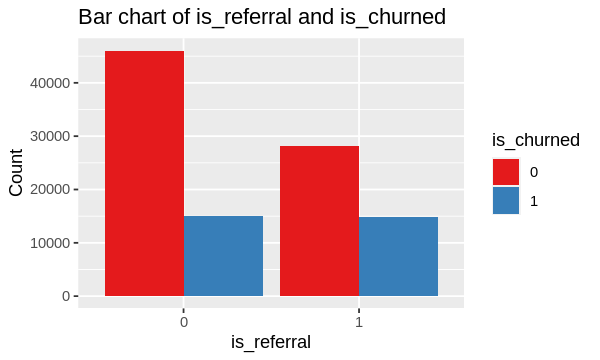

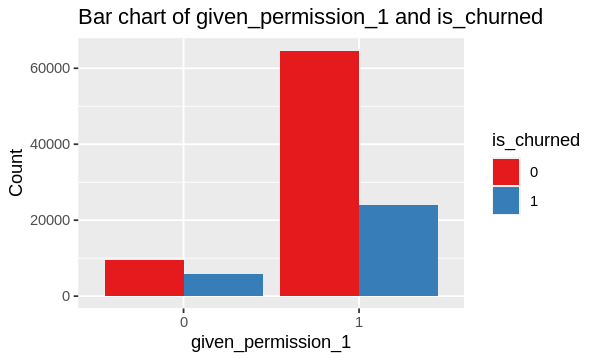

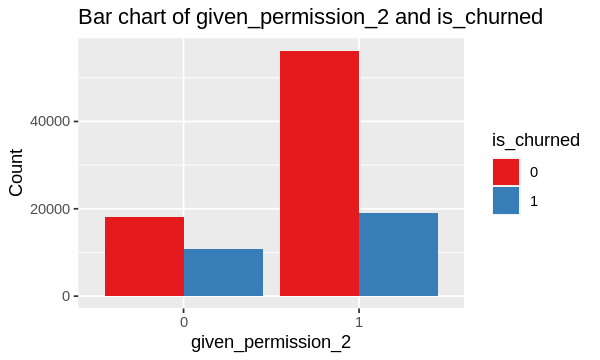

In [ ]:
# Plot bar charts for each categorical variable and the target variable
options(repr.plot.width = 5, repr.plot.height = 3)
colors <- brewer.pal(9, "Set1")
for (var in cat_binary_vars) {
  print(ggplot(cat_binary_target_df, aes_string(x = var, fill = "is_churned")) + 
    geom_bar(position = "dodge") +
    ggtitle(paste("Bar chart of", var, "and is_churned")) +
    xlab(var) + ylab("Count") +
    scale_fill_manual(values = colors))
}

- Los gráficos de barras resultantes muestran el recuento de cada variable categórica binaria y su relación con la variable objetivo.
- Observamos que para las 3 variables categóricas binarias, parece que el hecho que haya churn o no sí afecta. 

##### Device vs is_churned

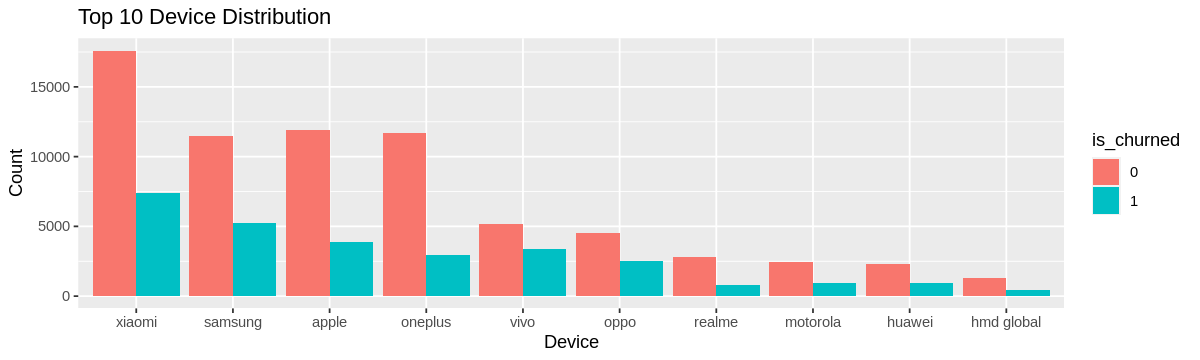

In [ ]:
# Get the top 10 devices in descending order of count
top_devices <- cust_churn_df %>%
  count(device) %>%
  arrange(desc(n)) %>%
  head(10) %>%
  pull(device)

# Filter the data to include only the top 6 devices
cust_churn_top10 <- cust_churn_df %>%
  filter(device %in% top_devices)

# subset device and is_churned
cust_churn_top10_df <- cust_churn_top10 %>%
  dplyr::select(device, is_churned)

# Create a bar plot of the top 6 devices in descending order of count
options(repr.plot.width = 10, repr.plot.height = 3)

ggplot(cust_churn_top10_df, aes(x = fct_infreq(device), fill = is_churned)) +
  geom_bar(position="dodge") +
  labs(title = "Top 10 Device Distribution", x = "Device", y = "Count", fill = "is_churned")

- Parece ser que, en términos relativos, 'vivo' encabeza el número de abandonos. 

##### City vs is_churned

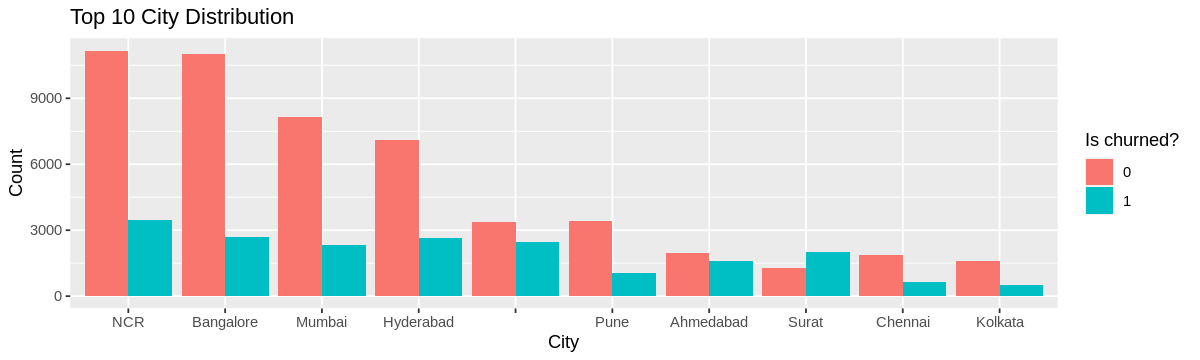

In [ ]:
# Get the top 10 cities in descending order of count
top_cities <- cust_churn_df %>%
  count(city) %>%
  arrange(desc(n)) %>%
  head(10) %>%
  pull(city)

# Filter the data to include only the top 6 devices
cust_churn_top5 <- cust_churn_df %>%
  filter(city %in% top_cities)

# subset device and is_churned
city_churn_top10_df <- cust_churn_top5 %>% dplyr::select(city, is_churned)

# Create a bar plot of the top 5 cities in descending order of count
ggplot(city_churn_top10_df, aes(x = fct_infreq(city), fill = is_churned)) +
  geom_bar(position="dodge") +
  labs(title = "Top 10 City Distribution", x = "City", y = "Count", fill = "Is churned?")

- Observamos que en 'Surat' hay más usuarios que hacen churn que los que permanecen. 

## Tratamiento de valores nulos

Mostramos las variables que contienen valores nulos y la cantidad de valores nulos:

In [ ]:
# select only columns with NA values
na_cols <- cust_churn_df[, colSums(is.na(cust_churn_df)) > 0]

# count NA values in each selected column
na_counts <- colSums(is.na(na_cols))

# print the number of NA values and variable names with NA values
for (i in seq_along(na_counts)) {
  cat(sprintf("Variable %s has %d NA values\n", names(na_counts)[i], na_counts[i]))
}

Variable age has 142 NA values
Variable number_of_cards has 472 NA values
Variable payments_initiated has 472 NA values
Variable payments_failed has 472 NA values
Variable payments_completed has 472 NA values
Variable payments_completed_amount_first_7days has 472 NA values
Variable reward_purchase_count_first_7days has 23264 NA values
Variable coins_redeemed_first_7days has 472 NA values
Variable visits_feature_1 has 2646 NA values
Variable visits_feature_2 has 2646 NA values


In [ ]:
cust_churn_df %>% 
  dplyr::select(num_vars) %>% 
  miss_var_summary()

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(num_vars)

  # Now:
  data %>% select(all_of(num_vars))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


variable,n_miss,pct_miss
<chr>,<int>,<dbl>
reward_purchase_count_first_7days,23264,22.338515
visits_feature_1,2646,2.540737
visits_feature_2,2646,2.540737
number_of_cards,472,0.453223
payments_initiated,472,0.453223
payments_failed,472,0.453223
payments_completed,472,0.453223
payments_completed_amount_first_7days,472,0.453223
coins_redeemed_first_7days,472,0.453223


- El 22.34% de los valores de reward_purchase_count_first_7days son NA values, mientras que first_payment_amount no presenta NA values. 

In [ ]:
num_vars_na<- c(
              "age", 
              "number_of_cards", 
              "payments_initiated", 
              "payments_failed", 
              "payments_completed", 
              "payments_completed_amount_first_7days", 
              "reward_purchase_count_first_7days",
              "coins_redeemed_first_7days", 
              "visits_feature_1", 
              "visits_feature_2")
num_df <- cust_churn_df[, c(num_vars_na)]

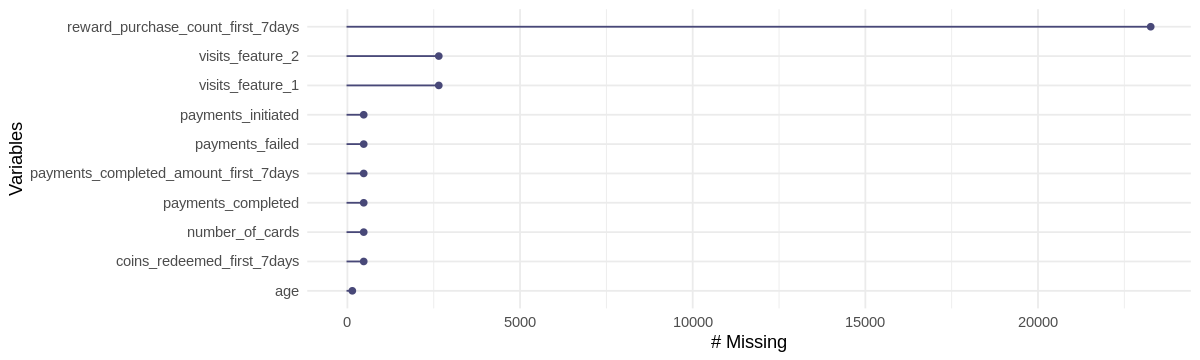

In [ ]:
# Another approach to visualising the missings in a dataset is to use the gg_miss_var plot:
options(repr.plot.width = 10, repr.plot.height = 3)

gg_miss_var(num_df)

- Observamos que reward_purchase_count_first_7days es la variable con más NA values (23264), seguida de visits_feature_1 y visits_feature_2, con 2646 NA values cada una. 

,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2,reward_purchase_count_first_7days,
78911,1,1,1,1,1,1,1,1,1,1,0
22445,1,1,1,1,1,1,1,1,1,0,1
1479,1,1,1,1,1,1,1,0,0,1,2
694,1,1,1,1,1,1,1,0,0,0,3
381,1,0,0,0,0,0,0,0,0,1,8
91,1,0,0,0,0,0,0,0,0,0,9
108,0,1,1,1,1,1,1,1,1,1,1
33,0,1,1,1,1,1,1,1,1,0,2
1,0,1,1,1,1,1,1,0,0,0,4
,142,472,472,472,472,472,472,2646,2646,23264,31530


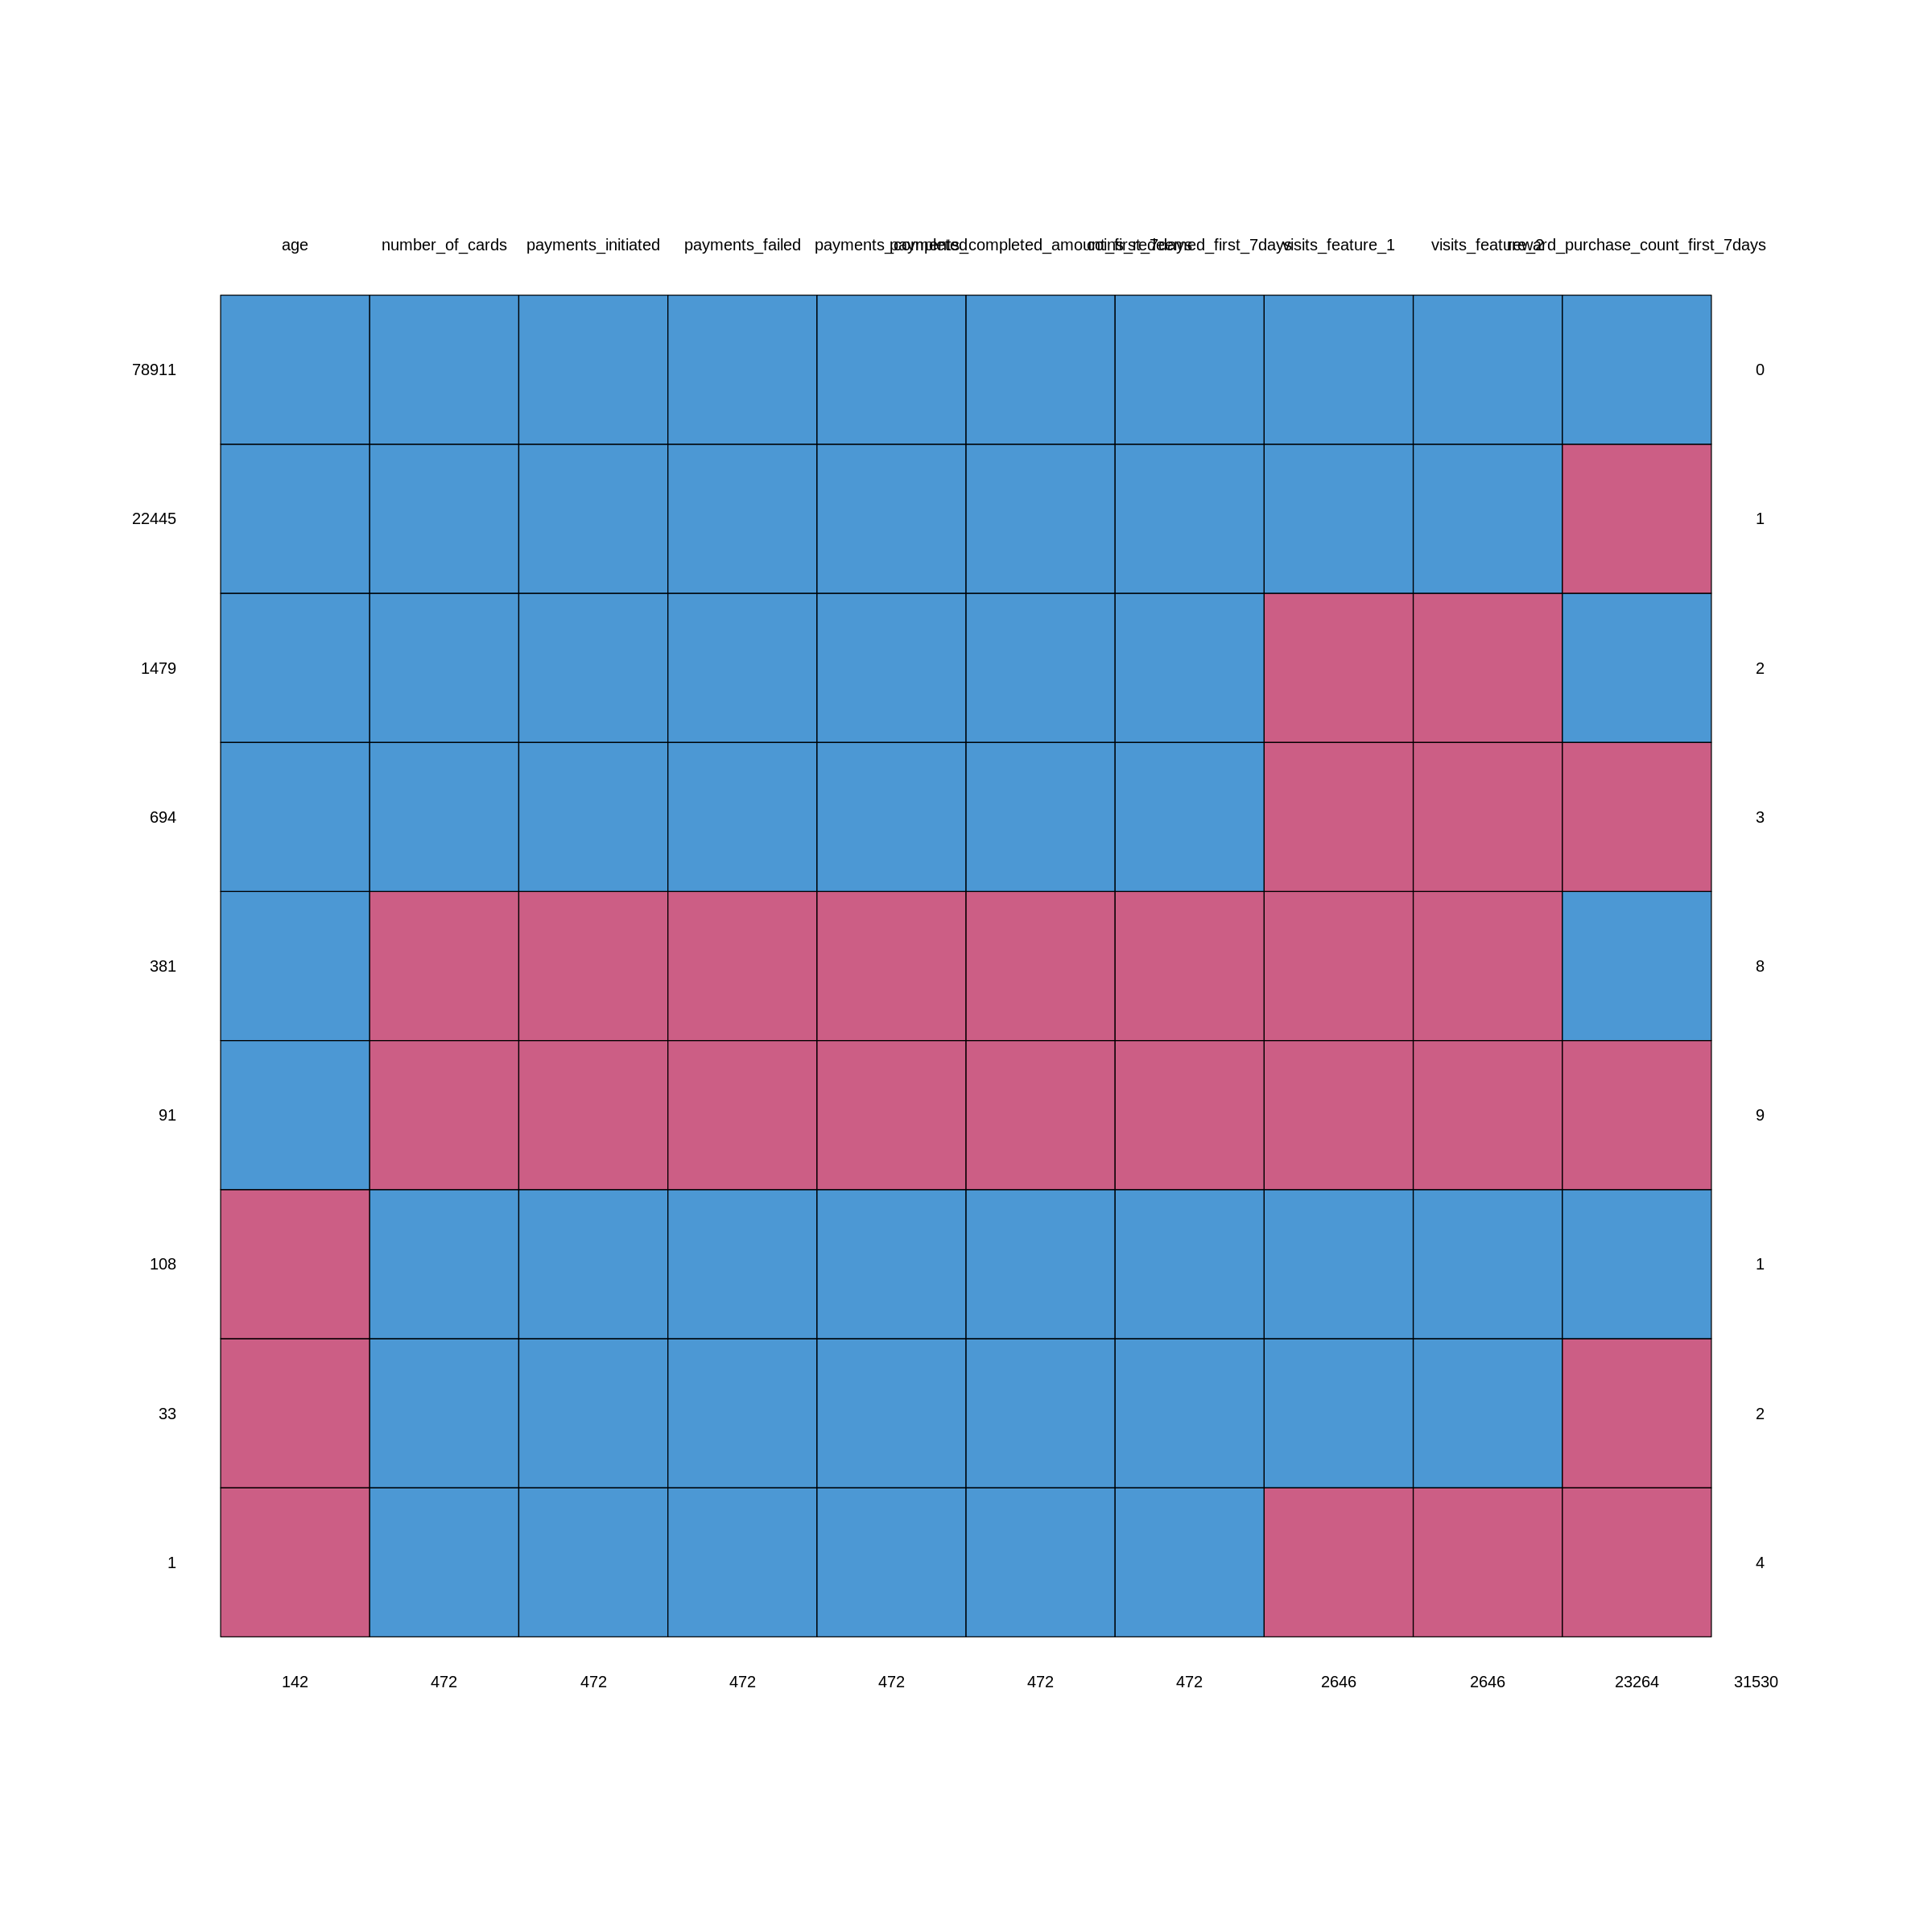

In [ ]:
# Echamos un vistazo a la distribución de los NA values
options(repr.plot.width = 20, repr.plot.height = 20)
md.pattern(num_df)

- Podemos observar la distribución de los NA values.
- Los NA values de la variable 'edad' se sitúan en las últimas filas de la columna. 

In [ ]:
md.pairs(num_df)

,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2
age,104001,103529,103529,103529,103529,103529,80771,103529,101356,101356
number_of_cards,103529,103671,103671,103671,103671,103671,80498,103671,101497,101497
payments_initiated,103529,103671,103671,103671,103671,103671,80498,103671,101497,101497
payments_failed,103529,103671,103671,103671,103671,103671,80498,103671,101497,101497
payments_completed,103529,103671,103671,103671,103671,103671,80498,103671,101497,101497
payments_completed_amount_first_7days,103529,103671,103671,103671,103671,103671,80498,103671,101497,101497
reward_purchase_count_first_7days,80771,80498,80498,80498,80498,80498,80879,80498,79019,79019
coins_redeemed_first_7days,103529,103671,103671,103671,103671,103671,80498,103671,101497,101497
visits_feature_1,101356,101497,101497,101497,101497,101497,79019,101497,101497,101497
visits_feature_2,101356,101497,101497,101497,101497,101497,79019,101497,101497,101497


Por tanto, deberemos tratar los valores nulos de estas variables.

### Deletion and multiple imputation 

Para tratar los NA values, utilizaremos 2 técnicas:
- Eliminación
- Imputación múltiple

#### Eliminación

Como en la variable 'age' el número de filas con valores nulos es relativamente pequeño en comparación con el tamaño del dataset, simplemente eliminamos esas filas. 
- Tenemos 142 filas con valores nulos de un total de 104143 filas, por lo que éste podría ser un enfoque razonable (estaríamos eliminando un 0.13% del total de filas del dataset).

In [ ]:
# filas 
length(cust_churn_df$age)

[1] 104143

In [ ]:
# NA values 
sum(is.na(cust_churn_df$age))

[1] 142

In [ ]:
# Create a copy of the cust_churn_df data frame
cust_churn_clean_df <- data.frame(cust_churn_df) 

In [ ]:
tracemem(cust_churn_df) == tracemem(cust_churn_clean_df)

[1] FALSE

- Esto creará un dataset llamado cust_churn_clean_df que es idéntico a cust_churn_df, pero cualquier cambio realizado en un dataset no afectará al otro.

- El nuevo dataset tiene la misma estructura y contenido que cust_churn_df, pero es un objeto completamente independiente en memoria. 



In [ ]:
sum(is.na(cust_churn_clean_df))
sum(is.na(cust_churn_clean_df$age))

tracemem[0x5588234c7c70 -> 0x558824b05570]: as.list.data.frame as.list lapply do.call is.na.data.frame is.na eval eval eval_with_user_handlers withVisible withCallingHandlers doTryCatch tryCatchOne tryCatchList tryCatch try handle timing_fn evaluate_call evaluate doTryCatch tryCatchOne tryCatchList doTryCatch tryCatchOne tryCatchList tryCatch <Anonymous> handle_shell <Anonymous> <Anonymous> 


[1] 31530

[1] 142

In [ ]:
# remove rows with null values for the "age" variable
cust_churn_clean_df <- cust_churn_clean_df[!is.na(cust_churn_clean_df$age), ]
# check the number of rows with null values for the "age" variable
sum(is.na(cust_churn_clean_df$age))

[1] 0

- Ya no tenemos valores NA en la variable 'age'.

In [ ]:
# before removing NA's
summary(cust_churn_df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  20.00   27.00   31.00   32.69   36.00   80.00     142 

In [ ]:
# after removing NA's
summary(cust_churn_clean_df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   27.00   31.00   32.69   36.00   80.00 

In [ ]:
dim(cust_churn_clean_df)

[1] 104001     18

- Hemos eliminado 142 filas del dataset.

#### Multiple imputation

- La imputación múltiple es una técnica estadística utilizada para tratar los NA values en un dataset imputando o sustituyendo los NA values por valores estimados basados en la información disponible en el dataset. 

- Esta técnica implica la creación de múltiples copias del dataset, donde los NA values se imputan con valores plausibles varias veces, generando una distribución de valores plausibles para cada NA value. 

- La imputación múltiple es una técnica útil, ya que puede ayudar a reducir el sesgo y aumentar la accuracy de los análisis estadísticos cuando faltan datos [4].

Además, la imputación múltiple ofrece varias ventajas con respecto a la simple eliminación o imputación de la media o mediana de los NA values [5]:

- Conserva más información: al crear imputaciones múltiples basadas en los datos observados, la imputación múltiple conserva más de la variabilidad original y de las relaciones entre las variables del dataset que otros métodos.

- Proporciona estimaciones más precisas: la imputación múltiple puede producir estimaciones de parámetros más precisas que los métodos de imputación única, que pueden subestimar la varianza y dar lugar a estimaciones sesgadas.

- Produce inferencias estadísticas válidas: la imputación múltiple puede mejorar la validez de las inferencias estadísticas al tener en cuenta la incertidumbre introducida por los datos que faltan. Esto puede ayudar a evitar el sesgo y las conclusiones incorrectas a causa de ignorar los datos que faltan.

- Reduce el sesgo y aumenta la potencia: la imputación múltiple puede reducir el sesgo y aumentar la potencia estadística al utilizar la información disponible para hacer predicciones más precisas de los datos que faltan.

En general, la imputación múltiple es un método más flexible y sólido para tratar los datos que faltan que ofrece varias ventajas sobre métodos más sencillos como la eliminación o la imputación de la media o la mediana.

Por tanto, aplicaremos la imputación múltiple a las siguientes variables:
- number_of_cards, payments_initiated, payments_failed, payments_completed, payments_completed_amount_first_7days y coins_redeemed_first_7days: tienen 472 valores NA (cantidad moderada de NA values).

- reward_purchase_count_first_7days: tiene 23264 NA values (cantidad de NA values relativamente grande).

- visits_feature_1 y visits_feature_2: tienen 2646 valores NA (cantidad moderada de NA values).

In [ ]:
# create a vector of variable names to be imputed
vars_to_impute <- c(
              "number_of_cards", 
              "payments_initiated", 
              "payments_failed", 
              "payments_completed", 
              "payments_completed_amount_first_7days", 
              "reward_purchase_count_first_7days",
              "coins_redeemed_first_7days", 
              "visits_feature_1", 
              "visits_feature_2")

# create the imputation model using mice()
impute_model <- mice(cust_churn_clean_df[,vars_to_impute], m = 5, method = "pmm", seed = 123)

# impute the missing values using complete()
imputed_data <- complete(impute_model)


 iter imp variable
  1   1  number_of_cards  payments_initiated  payments_failed  payments_completed  payments_completed_amount_first_7days  reward_purchase_count_first_7days  coins_redeemed_first_7days  visits_feature_1  visits_feature_2
  1   2  number_of_cards  payments_initiated  payments_failed  payments_completed  payments_completed_amount_first_7days  reward_purchase_count_first_7days  coins_redeemed_first_7days  visits_feature_1  visits_feature_2
  1   3  number_of_cards  payments_initiated  payments_failed  payments_completed  payments_completed_amount_first_7days  reward_purchase_count_first_7days  coins_redeemed_first_7days  visits_feature_1  visits_feature_2
  1   4  number_of_cards  payments_initiated  payments_failed  payments_completed  payments_completed_amount_first_7days  reward_purchase_count_first_7days  coins_redeemed_first_7days  visits_feature_1  visits_feature_2
  1   5  number_of_cards  payments_initiated  payments_failed  payments_completed  payments_complete

In [ ]:
head(imputed_data, 3)

,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,0,1,0,1,0,3,0
2,1,1,0,1,0,0,0,0,0
3,1,2,1,1,0,0,0,0,0


In [ ]:
summary(imputed_data)
message()
dim(imputed_data)
message()
sum(is.na(imputed_data))

 number_of_cards  payments_initiated payments_failed   payments_completed
 Min.   : 0.000   Min.   :  1.000    Min.   : 0.0000   Min.   :  1.000   
 1st Qu.: 1.000   1st Qu.:  1.000    1st Qu.: 0.0000   1st Qu.:  1.000   
 Median : 1.000   Median :  2.000    Median : 0.0000   Median :  1.000   
 Mean   : 1.989   Mean   :  2.844    Mean   : 0.4395   Mean   :  1.828   
 3rd Qu.: 3.000   3rd Qu.:  3.000    3rd Qu.: 0.0000   3rd Qu.:  2.000   
 Max.   :30.000   Max.   :359.000    Max.   :30.0000   Max.   :337.000   
 payments_completed_amount_first_7days reward_purchase_count_first_7days
 Min.   :    0.00                      Min.   :  0.000                  
 1st Qu.:    3.00                      1st Qu.:  0.000                  
 Median :   21.00                      Median :  1.000                  
 Mean   :   55.94                      Mean   :  1.712                  
 3rd Qu.:   64.00                      3rd Qu.:  2.000                  
 Max.   :11107.00                      Max. 

[1] 104001      9

[1] 0

In [ ]:
# añadimos las variables a las que les hemos aplicado la multiple imputation al df limpio de NA values
for (var in vars_to_impute) {
    cust_churn_clean_df[[var]] <- imputed_data[[var]] 
}

In [ ]:
sum(is.na(cust_churn_clean_df))

[1] 0

- Ya no tenemos ningún NA value en nuestro dataset.
- Tenemos un dataset totalmente limpio.

In [ ]:
dim(cust_churn_clean_df)

[1] 104001     18

- Recordemos que solo hemos borrado 142 filas de un total de 104143.

In [ ]:
head(cust_churn_clean_df)

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>
1,samsung,0,20,Ahmedabad,2,1,0,1,0,1,0,0,3,0,1,0,269438,0
2,xiaomi,0,20,Surat,1,1,0,1,0,0,0,1,0,0,1,0,139521,0
3,xiaomi,0,20,Kullu,1,2,1,1,0,0,0,1,0,0,0,1,307352,0
4,oneplus,0,20,Mumbai,2,4,1,2,322,2,20,0,0,0,1,1,456424,0
5,apple,0,20,Pune,2,1,0,1,0,0,0,0,0,1,1,1,398779,0
6,oppo,0,20,Ahmedabad,0,1,0,1,0,0,0,1,0,0,1,1,136656,0


## Correlation Analysis

- Primero realizaremos un análisis de correlaciones. 
- El análisis de correlación nos puede ayudar a identificar las variables que están significativamente asociadas con la variable objetivo is_churned.
- Esto nos ayudará seleccionar las variables más relevantes para incluirlas en el modelo de regresión logística.

### Correlación entre variables numéricas y la variable objetivo categórica is_churned

La correlación biserial mide la fuerza de la asociación entre una variable continua y una binaria, en este caso entre cada variable numérica y la variable categórica objetivo is_churned.


In [ ]:
# Select only numerical variables
numerical_vars <- c("first_payment_amount", "age", "number_of_cards", "payments_initiated", "payments_failed",
                    "payments_completed", "payments_completed_amount_first_7days", "reward_purchase_count_first_7days",
                    "coins_redeemed_first_7days", "visits_feature_1", "visits_feature_2")

df_num <- cust_churn_clean_df[numerical_vars]

# create an empty vector to store the results
correlations <- c()

# loop through each numerical variable and calculate the biserial correlation
for (var in colnames(df_num)) {
  # calculate biserial correlation between the current variable and the target variable
  cor <- biserial.cor(df_num[[var]], cust_churn_clean_df$is_churned)
  correlations <- c(correlations, cor)
}

# print the results
cor_var <- data.frame(variable = colnames(df_num), correlation = correlations)
cor_var

variable,correlation
<chr>,<dbl>
first_payment_amount,0.10703517
age,-0.05959574
number_of_cards,0.11944664
payments_initiated,0.10437091
payments_failed,0.05804562
payments_completed,0.08988723
payments_completed_amount_first_7days,0.12271551
reward_purchase_count_first_7days,0.12288886
coins_redeemed_first_7days,0.11473941


- Observando los resultados, podemos ver que varias de las variables numéricas tienen una correlación positiva con la variable objetivo is_churned, lo que indica que a medida que estas variables aumentan, la probabilidad de que un cliente abandone también aumenta. Estas variables son: first_payment_amount, number_of_cards, payments_initiated, payments_completed_amount_first_7days, reward_purchase_count_first_7days y coins_redeemed_first_7days.

- Por otro lado, podemos ver que la edad tiene una correlación negativa con is_churned, lo que sugiere que, a medida que los clientes envejecen, es menos probable que hagan churn. 

- payments_failed y visits_feature_2 tienen la menor correlación con is_churned, lo que indica que están débilmente asociadas con la variable objetivo.

En conclusión, el análisis de correlación biserial proporciona información útil sobre la relación entre las variables numéricas y la variable categórica objetivo is_churned, y puede ayudar a identificar qué variables pueden ser las más importantes para predecir el abandono de los clientes. Sin embargo, es importante señalar que la correlación no implica necesariamente causalidad, por lo que se necesitan más análisis para confirmar estas relaciones y establecer la causalidad.

### Asociación entre variables categóricas y la variable objetivo categórica is_churned

- Dado que tenemos variables categóricas, no podemos calcular una correlación entre ellas y la variable objetivo is_churned. En su lugar, podemos utilizar la prueba chi-squared para determinar si existe una asociación estadísticamente significativa entre cada variable categórica y is_churned. 

- Este test mide el grado de dependencia entre las dos variables categóricas. El test calcula un estadístico chi-squared y un p-value que indica la probabilidad de observar un resultado tan extremo o más extremo que el observado, suponiendo que la hipótesis nula es cierta (es decir, no hay asociación entre las dos variables).

In [ ]:
# Select only categorical variables
cat_vars <- c('device', 'city', 'is_referral', 'given_permission_1', 'given_permission_2')
# binary_cat_vars <- c('is_referral', 'given_permission_1', 'given_permission_2')

df_cat <- cust_churn_clean_df[cat_vars]

In [ ]:
# Calculate chi-square test of independence for each variable
cat_var_cor <- sapply(cust_churn_clean_df[cat_vars], function(x) {
  chisq.test(table(x, cust_churn_clean_df$is_churned))$statistic
})

# Calculate p-value for each variable
cat_var_pval <- sapply(cat_var_cor, function(x) {
  pvalue <- pchisq(x, df = 1, lower.tail = FALSE)
  return(pvalue)
})

# Combine test statistics and p-values into a data frame
cat_var_cor_df <- data.frame(variable = names(cat_var_cor), chi_square_statistic = cat_var_cor, p_value = cat_var_pval)

cat_var_cor_df


Warning message in chisq.test(table(x, cust_churn_clean_df$is_churned)):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table(x, cust_churn_clean_df$is_churned)):
“Chi-squared approximation may be incorrect”


,variable,chi_square_statistic,p_value
,<chr>,<dbl>,<dbl>
device.X-squared,device.X-squared,1681.4528,0.000000e+00
city.X-squared,city.X-squared,5444.1551,0.000000e+00
is_referral.X-squared,is_referral.X-squared,1246.4396,4.929820e-273
given_permission_1.X-squared,given_permission_1.X-squared,690.5663,3.366193e-152
given_permission_2.X-squared,given_permission_2.X-squared,1482.6914,0.000000e+00


- Podemos ver que el estadístico chi-cuadrado más alto es para "city" (seguido de "device"), lo que indica una asociación más fuerte con la variable objetivo "is_churned" en comparación con las otras variables categóricas. Sin embargo, también debemos comprobar el p-value de cada prueba para determinar si la asociación es estadísticamente significativa al nivel de significación deseado.

- Podemos ver que todos los p-values son inferiores a 0.05, lo que indica una relación estadísticamente significativa entre cada una de las variables categóricas y la variable objetivo 'is_churned'.

- Nota: el warning indica que la aproximación chi-cuadrado utilizada en la prueba puede no ser exacta debido al tamaño de los datos o a la distribución de las variables. Se trata de un problema habitual cuando se utilizan pruebas de chi-cuadrado con conjuntos de datos de gran tamaño.


## Mutual information

- Esta prueba mide la dependencia mutua entre dos variables, ya sean continuas o categóricas. 
- A diferencia de la correlación, la información mutua puede captar relaciones no lineales entre variables. 
- Es una prueba útil para identificar predictores potenciales que tengan una fuerte asociación con la variable objetivo. 
- Además, puede ayudar a identificar términos de interacción relevantes (combinaciones de dos o más predictores) que pueden tener un fuerte impacto en la variable objetivo. 
- Por lo tanto, el uso de la información mutua puede ayudarnos a construir un modelo de regresión logística más preciso y sólido.

- Las variables más importantes serán aquellas que aporten más entropía a nuestro dataset. 
- Como más entropía, más importancia. 

**Information Gain Algorithms**:

Con tal de ver la información mutua entre el target y las covariables se aplican los tres algoritmos detallados a continuación:

- "infogain" : ${H(Class)} + H(Attribute) − H(Class, Attribute)$
    - Este es el tipo de ganancia de información más utilizado. 
    - Se basa en la diferencia entre la entropía de la variable objetivo y la entropía condicional de la variable objetivo dada la variable predictora.

- "gainratio" : $H(Class) + H(Attribute) − H(Class, Attribute) / H(Attribute) $
    - Este tipo de ganancia de información se utiliza para ajustar el sesgo que puede producirse cuando una variable predictora tiene muchos valores o niveles distintos. 
    - Divide la ganancia de información por la información dividida, que es una medida de la diversidad de los valores de la variable predictora.

- "symuncert" : $2 * (H(Class) + H(Attribute) − H(Class, Attribute)) / (H(Attribute) + H(Class)) $
    - Este tipo de ganancia de información mide la información mutua entre la variable objetivo y la variable predictora, y la ajusta por la entropía de ambas variables.
    
La elección del tipo de ganancia de información depende del problema específico y de la naturaleza de las variables predictoras. En general, infogain es un buen punto de partida y funciona bien con variables categóricas, mientras que gain_ratio y symmetrical_uncertainty son más adecuadas para variables categóricas continuas o de alta cardinalidad.

attributes,importance
<chr>,<dbl>
device,0.008098084
first_payment_amount,0.058265429
age,0.002929074
city,0.025252410
number_of_cards,0.012434208
payments_initiated,0.018448372
payments_failed,0.002347612
payments_completed,0.027294507
payments_completed_amount_first_7days,0.073240480


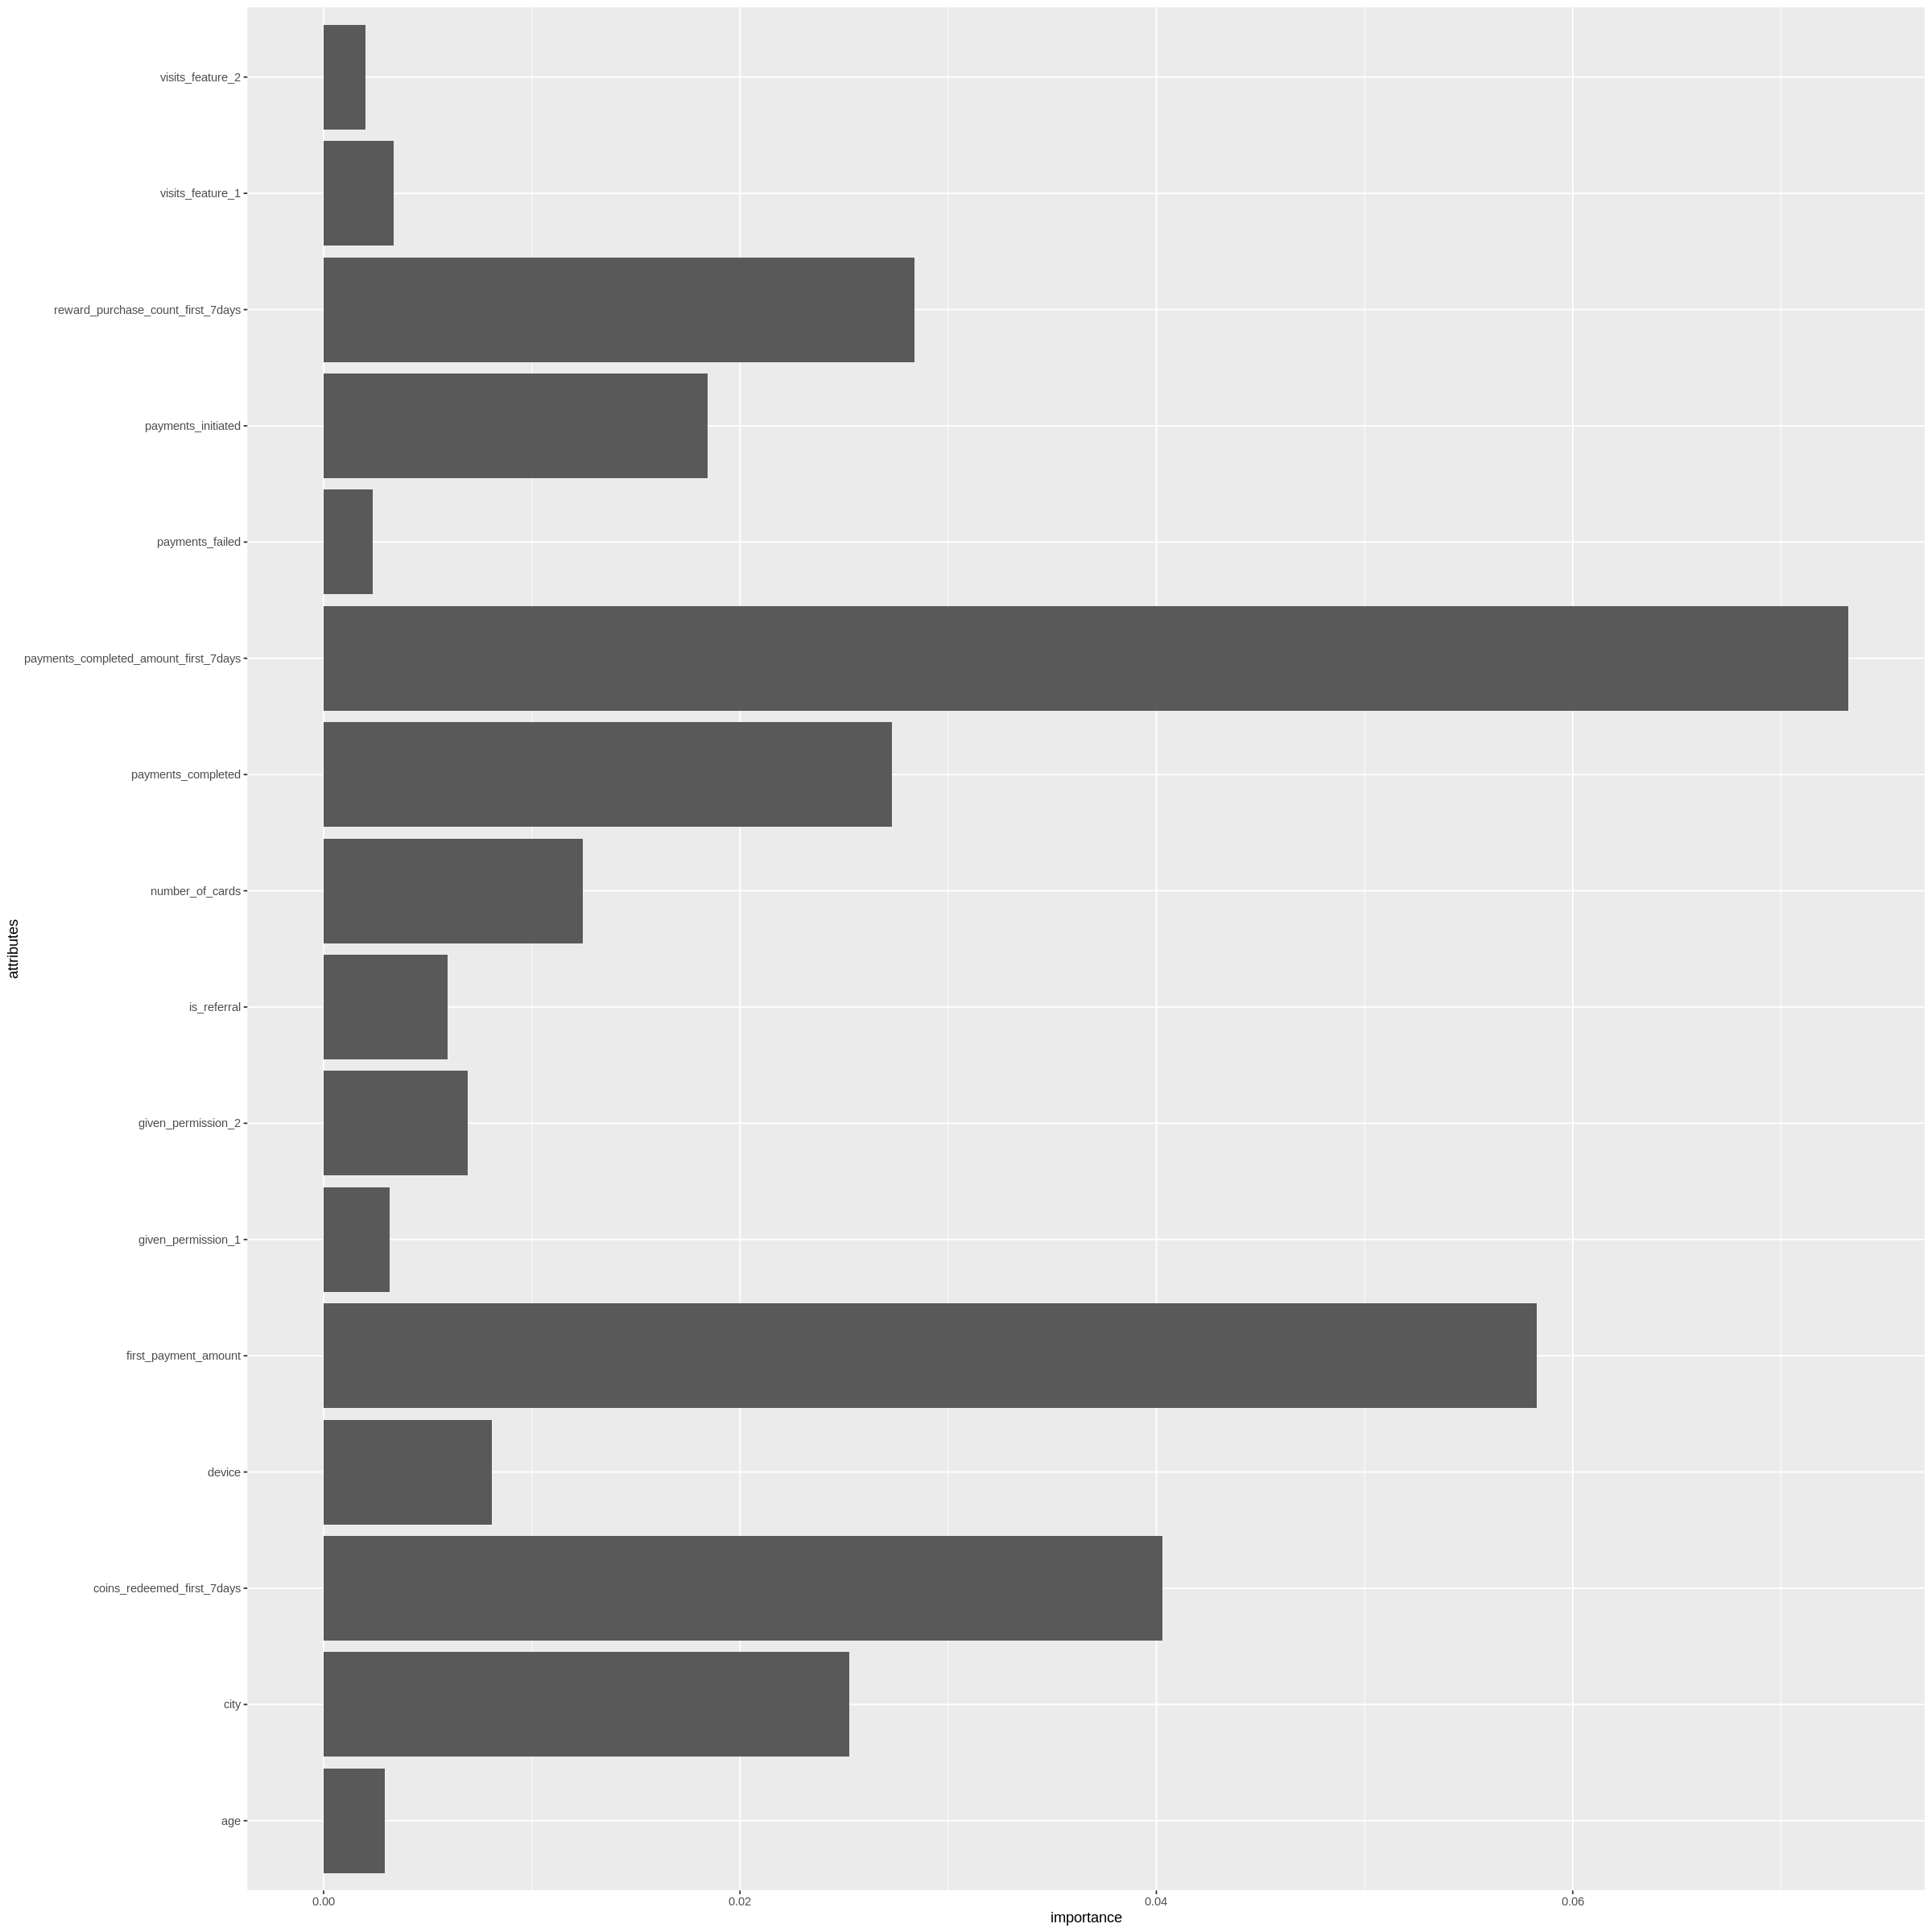

In [ ]:
# información mútua 
i <- information_gain(formula = is_churned ~ .,
                      data = cust_churn_clean_df[, !(names(cust_churn_clean_df) %in% c("is_churned_numeric", "user_id"))],
                      type = 'infogain')
i  

# variables que tienen más importancia en nuestro dataset   
ggplot(i, aes(x=attributes, y=importance)) + 
  geom_bar(stat = "identity") +
  coord_flip()


- La columna "atributos" enumera todas las variables (predictores) del dataset, y la columna "importancia" muestra la puntuación de importancia de cada variable, con respecto a la variable objetivo "is_churned". 

- La puntuación de importancia se mide utilizando la métrica de ganancia de información, que indica la reducción de la incertidumbre de la variable objetivo, dado el conocimiento de una determinada variable predictora.

- Basándonos en las puntuaciones de la importancia, podemos ver que entre los predictores, "payments_completed_amount_first_7days" tiene la puntuación de importancia más alta (0.073), seguida de "first_payment_amount" (0.058). Es probable que estas variables sean predictores importantes de la pérdida de clientes y podría ser interesante tenerlas en cuenta en el modelo de regresión logística.

attributes,importance
<chr>,<dbl>
device,0.003635941
first_payment_amount,0.043490572
age,0.005653238
city,0.006764774
number_of_cards,0.009195540
payments_initiated,0.012977646
payments_failed,0.003473588
payments_completed,0.031900637
payments_completed_amount_first_7days,0.034529301


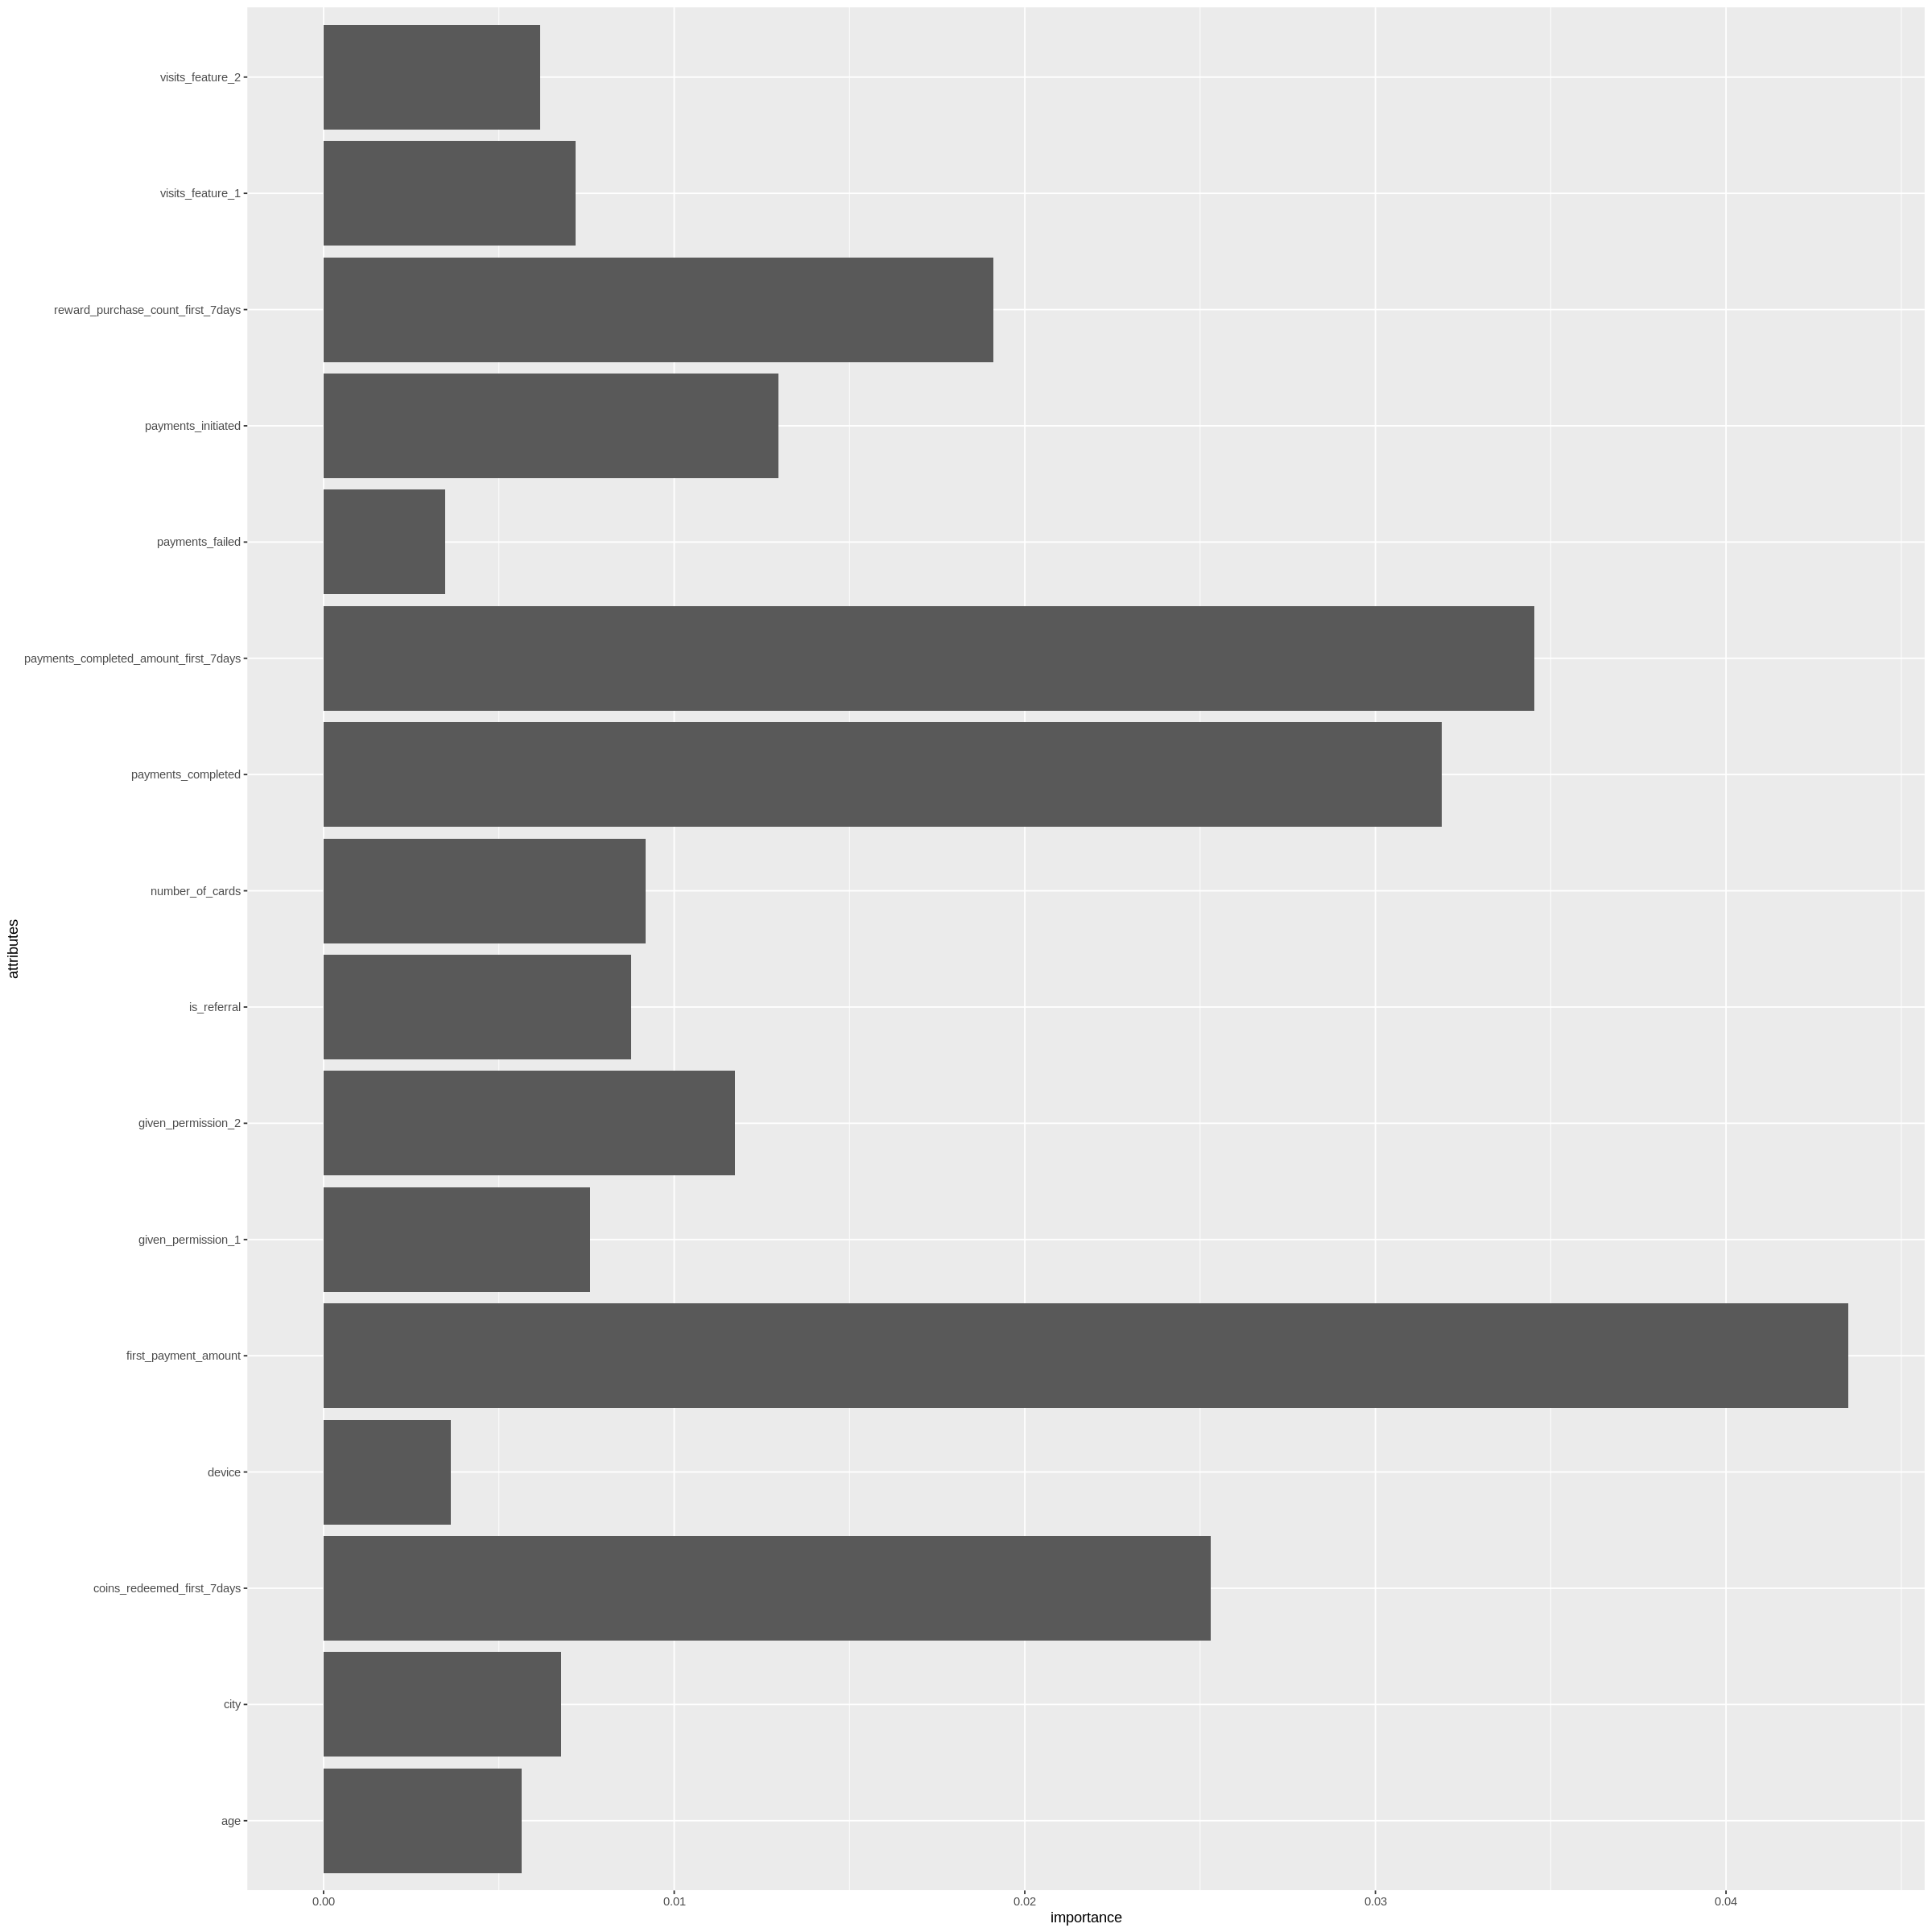

In [ ]:
### gainratio: variable target con dataset
ig = information_gain(formula = is_churned ~ .,
                      data = cust_churn_clean_df[, !(names(cust_churn_clean_df) %in% c("is_churned_numeric", "user_id"))],
                      type = 'gainratio')
ig

ggplot(ig, aes(x=attributes, y=importance)) + 
  geom_bar(stat = "identity") +
  coord_flip()

attributes,importance
<chr>,<dbl>
device,0.005730313
first_payment_amount,0.060101681
age,0.005243163
city,0.011658285
number_of_cards,0.012744084
payments_initiated,0.018259210
payments_failed,0.003682482
payments_completed,0.037523903
payments_completed_amount_first_7days,0.053847739


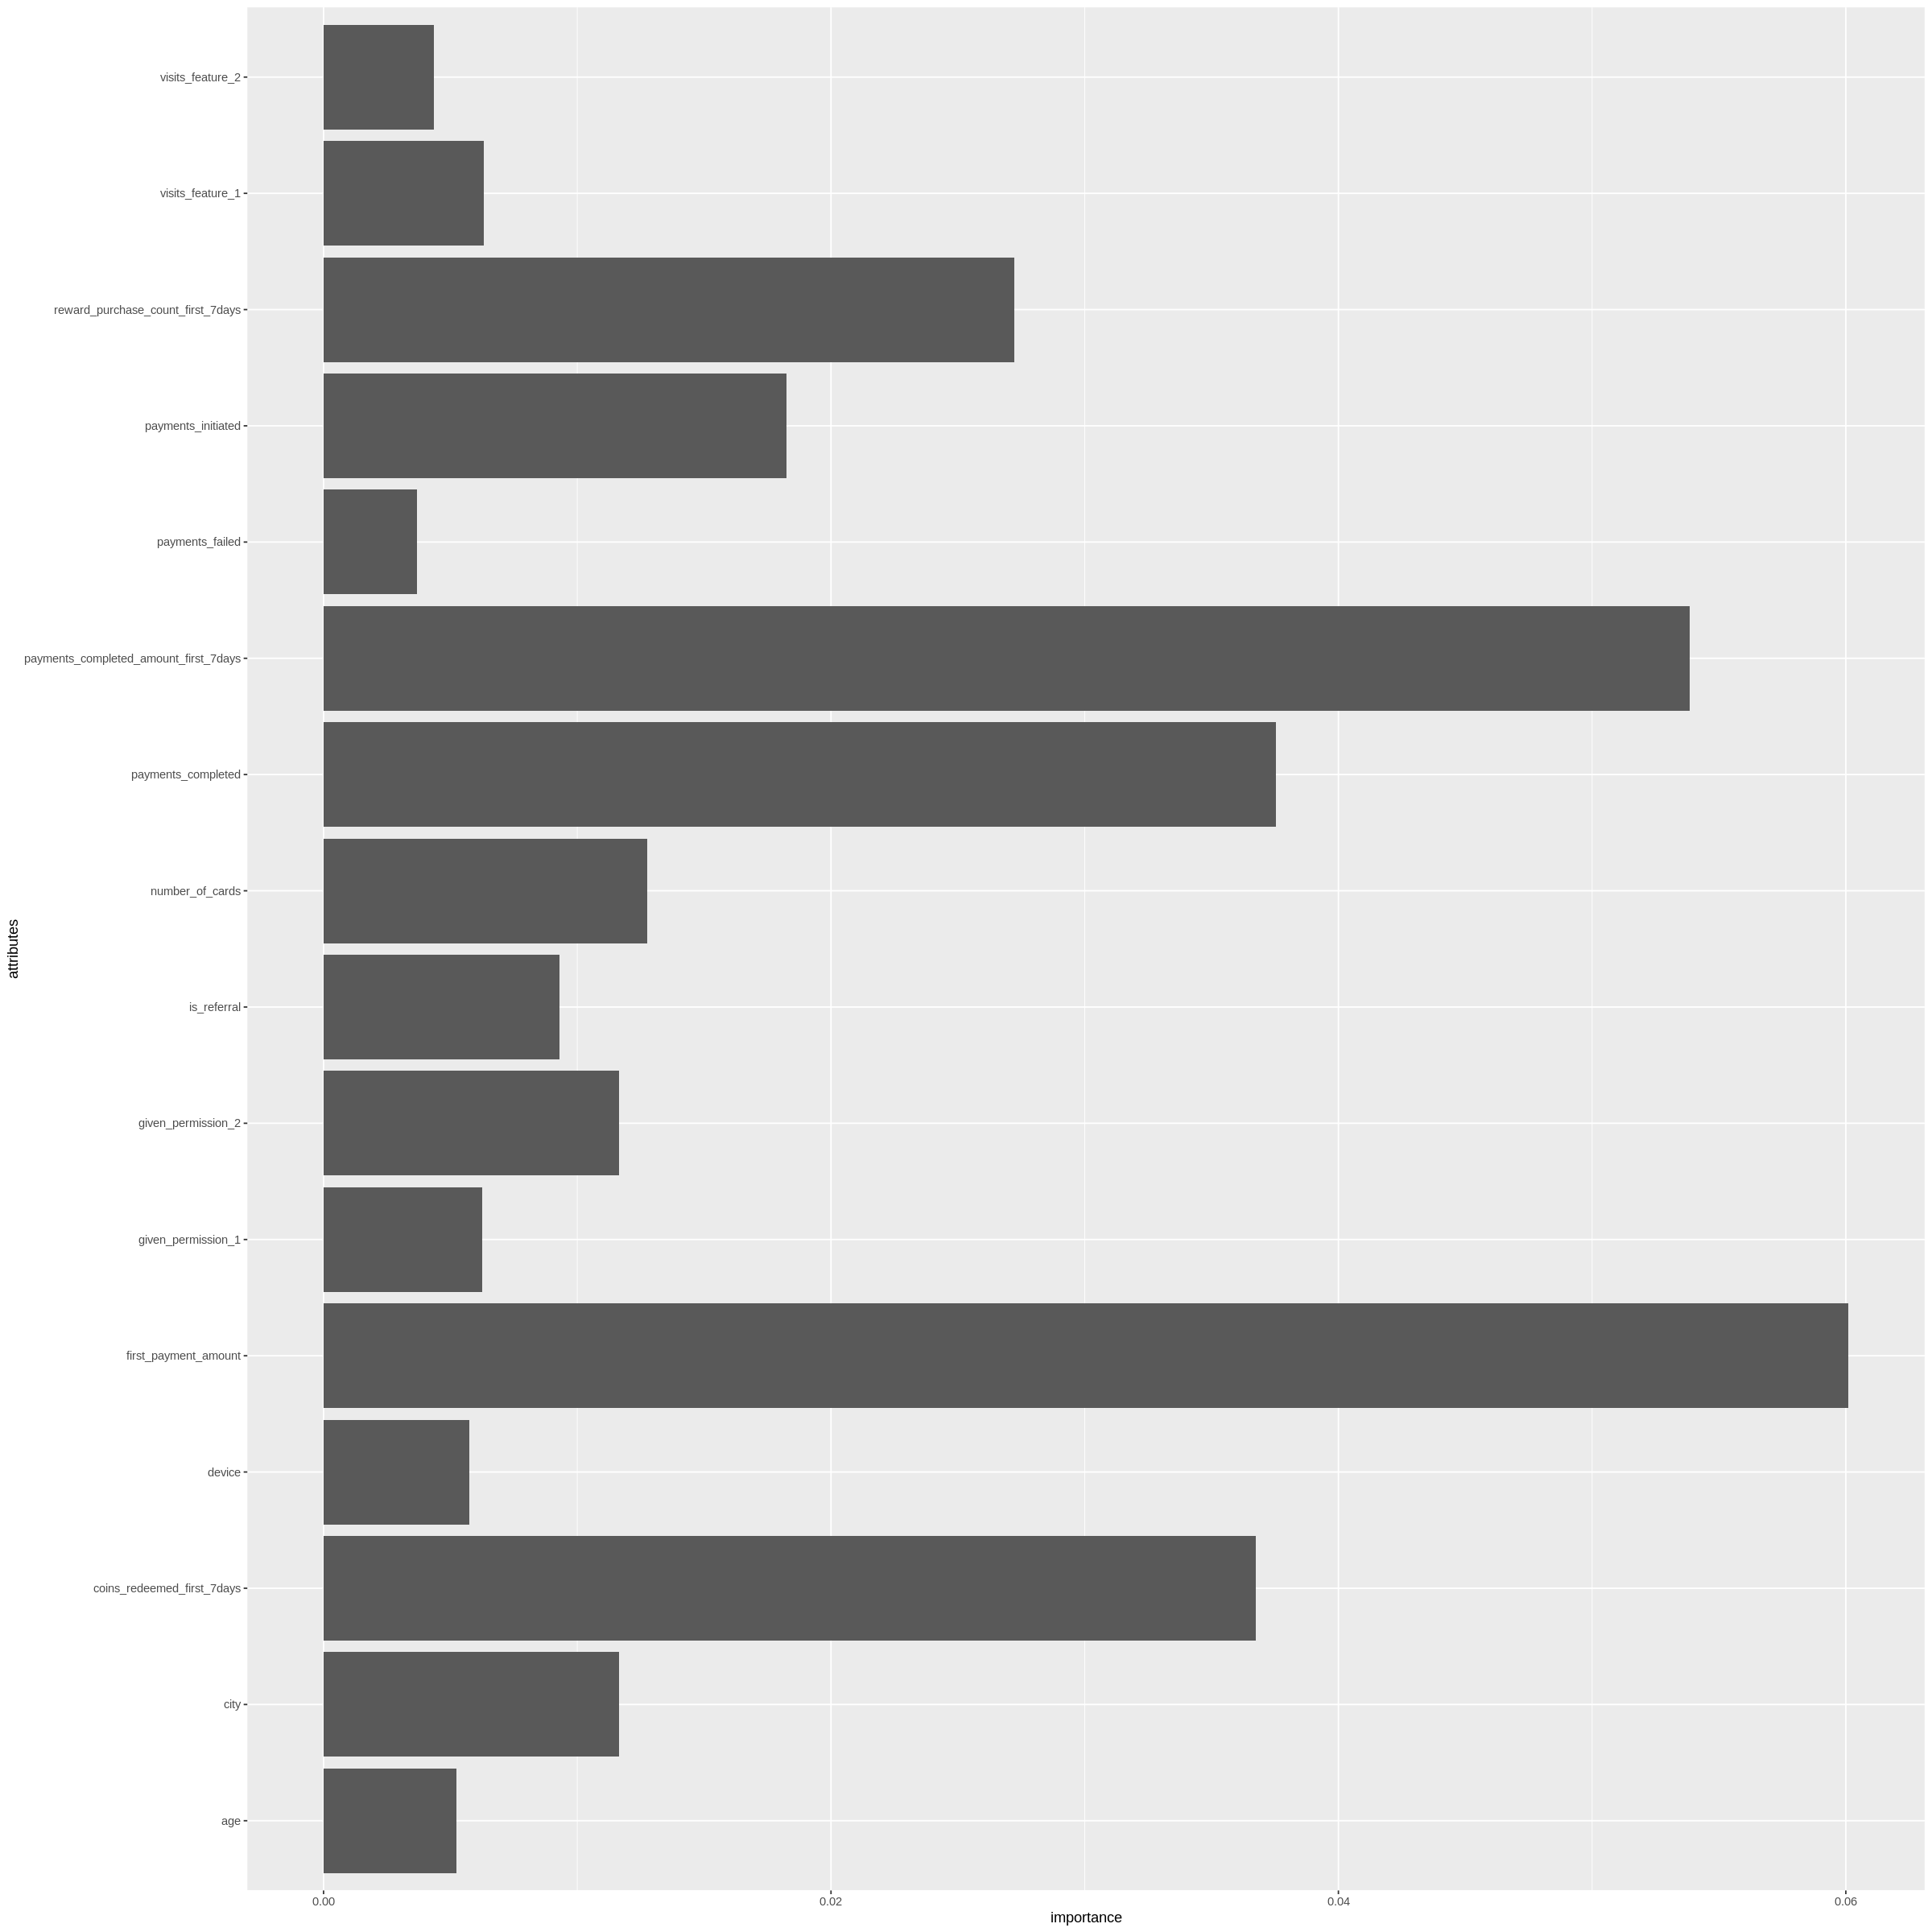

In [ ]:
### gainratio: variable target con dataset
is = information_gain(formula = is_churned ~ .,
                      data = cust_churn_clean_df[, !(names(cust_churn_clean_df) %in% c("is_churned_numeric", "user_id"))],
                      type = 'symuncert')

is

ggplot(is, aes(x=attributes, y=importance)) + 
  geom_bar(stat = "identity") +
  coord_flip()

- Ahora tenemos una visión de cuáles son las variables más importantes de nuestro dataset. 

- Entre ellas destacan:
    - payments_completed_amount_first_7days	
    - first_payment_amount	
    - coins_redeemed_first_7days
    - reward_purchase_count_first_7days
    - payments_completed
    
Por tanto, es probable que estas variables sean predictores importantes de la pérdida de clientes y podría ser interesante tenerlas en cuenta en el modelo de regresión logística.

## PCA

- Hacemos el PCA para limpiar las variables y ver con qué variables nos quedamos (solo lo haremos con las variables numéricas).

- Obtenemos tantas componentes como variables numéricas tengamos.

- Sirve para empezar a limpiar variables.

- Posteriormente, con las variables que nos quedemos, volvemos a hacer correlaciones para ver cuáles son las que más correlacionan con la variable objetivo, y también para ver como se comportan entre ellas, ya que no queremos poner información redundante dentro del modelo. Eso también ayuda a limpiar.

- acp = princomp(data_macro_cor,cor=TRUE)

    - Tomamos como referencia correlaciones porque es muy importante que cuando tengamos diferentes unidades una no pese más que la otra.
    - Si el objetivo es analizar las relaciones entre variables, princomp puede ser más apropiado.
    - Si el objetivo es analizar los patrones en las variables, prcomp puede ser más apropiado.

In [ ]:
data_cor = data.frame(cust_churn_clean_df$first_payment_amount,
                     cust_churn_clean_df$age,
                     cust_churn_clean_df$number_of_cards,
                     cust_churn_clean_df$payments_initiated,
                     cust_churn_clean_df$payments_failed,
                     cust_churn_clean_df$payments_completed,
                     cust_churn_clean_df$payments_completed_amount_first_7days,
                     cust_churn_clean_df$reward_purchase_count_first_7days,
                     cust_churn_clean_df$coins_redeemed_first_7days,
                     cust_churn_clean_df$visits_feature_1,
                     cust_churn_clean_df$visits_feature_2
                     )
# matriz de correlación 
round(cor(data_cor),2)

# PCA
acp = princomp(data_cor,cor=TRUE)
# resumen del PCA
summary(acp)

# sd
print('desviación estandard componente1:')
sd(predict(acp)[,1:1])

# varianza
print('varianza componente1:')
var(predict(acp)[,1:1])

,cust_churn_clean_df.first_payment_amount,cust_churn_clean_df.age,cust_churn_clean_df.number_of_cards,cust_churn_clean_df.payments_initiated,cust_churn_clean_df.payments_failed,cust_churn_clean_df.payments_completed,cust_churn_clean_df.payments_completed_amount_first_7days,cust_churn_clean_df.reward_purchase_count_first_7days,cust_churn_clean_df.coins_redeemed_first_7days,cust_churn_clean_df.visits_feature_1,cust_churn_clean_df.visits_feature_2
cust_churn_clean_df.first_payment_amount,1.00,0.06,0.06,-0.03,0.02,-0.04,0.64,0.09,0.35,0.02,0.01
cust_churn_clean_df.age,0.06,1.00,0.14,0.02,0.03,0.01,0.07,0.02,0.04,-0.06,0.00
cust_churn_clean_df.number_of_cards,0.06,0.14,1.00,0.10,0.06,0.10,0.15,0.12,0.14,-0.01,0.03
cust_churn_clean_df.payments_initiated,-0.03,0.02,0.10,1.00,0.54,0.89,0.20,0.74,0.25,0.06,0.06
cust_churn_clean_df.payments_failed,0.02,0.03,0.06,0.54,1.00,0.26,0.14,0.23,0.13,0.04,0.05
cust_churn_clean_df.payments_completed,-0.04,0.01,0.10,0.89,0.26,1.00,0.18,0.83,0.25,0.04,0.04
cust_churn_clean_df.payments_completed_amount_first_7days,0.64,0.07,0.15,0.20,0.14,0.18,1.00,0.32,0.65,0.03,0.03
cust_churn_clean_df.reward_purchase_count_first_7days,0.09,0.02,0.12,0.74,0.23,0.83,0.32,1.00,0.53,0.06,0.06
cust_churn_clean_df.coins_redeemed_first_7days,0.35,0.04,0.14,0.25,0.13,0.25,0.65,0.53,1.00,0.05,0.05
cust_churn_clean_df.visits_feature_1,0.02,-0.06,-0.01,0.06,0.04,0.04,0.03,0.06,0.05,1.00,0.25


Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8125926 1.3574306 1.1159267 1.04723615 0.95044687
Proportion of Variance 0.2986811 0.1675107 0.1132084 0.09970032 0.08212266
Cumulative Proportion  0.2986811 0.4661918 0.5794002 0.67910051 0.76122317
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.91831029 0.86401845 0.75835422 0.52087829 0.37016951
Proportion of Variance 0.07666307 0.06786617 0.05228192 0.02466493 0.01245686
Cumulative Proportion  0.83788624 0.90575242 0.95803434 0.98269926 0.99515612
                           Comp.11
Standard deviation     0.230830320
Proportion of Variance 0.004843876
Cumulative Proportion  1.000000000

[1] "desviación estandard componente1:"


[1] 1.812601

[1] "varianza componente1:"


[1] 3.285523

- Obtenemos un total de 11 componentes (tantas como variables tengo sin contar las categóricas).

- La 1ª componente es la que más varianza nos va a explicar: ya lo resume, ya hace la combinación lineal entre nuestras variables que explique todas esas variables que le hemos metido. 

- Miramos la Proportion of Variance (una medida de la cantidad de variación en los datos originales que es capturada por cada uno de los componentes principales) de la componente 1 y 2: 0.29 + 0.16 = 0.45. Es decir, la comp1 y 2 nos explican el 45% de la variación de los datos. 

- Añadimos la componente 3: 0.298 + 0.167 + 0.113 = 0.579. La comp 1, 2 y 3 nos explican el 58% de la variación de los datos.

- Con un 58%, para empezar a generar un modelo y comenzar a limpiar variables ya nos sirve. 

In [ ]:
# A través de esta función tendriamos las puntuaciones en las componentes principales
# Nos es útil para comparar  como para usar estas componentes sustituyendolas por las variables originales
predict(acp)
# acp$scores #otra forma de llamarlos

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
-0.70204900,-0.5307549,3.2754105455,0.7710120,-0.9299253,-0.9476598,3.0565429,-0.03037530,-0.07517432,-0.127435723,0.08521160
-1.17661415,-0.4678580,0.0041095530,1.4246899,-0.3429241,-0.6655760,-0.3490636,-0.09306420,-0.13920459,0.075675414,0.08729990
-0.82246725,-0.7041771,0.0163664236,1.3237423,0.4361616,-1.0078317,-0.3305944,-0.22596132,-0.05681423,0.016468373,0.13608960
0.78103626,0.4319785,-0.0970505446,1.2982928,0.2175230,-1.2766983,-0.3612840,-0.23635257,-1.68755175,-0.619527988,-0.14590155
-0.97906828,-0.4498762,1.4135235039,0.4806126,-0.5591218,-0.7595695,-1.8742966,0.02248997,-0.12449554,0.083737181,0.10309508
-1.24272472,-0.5224158,0.0739264798,1.7539782,-0.1396723,-0.3169478,-0.3637924,-0.13529405,-0.16003867,0.072508020,0.08859495
-1.15424534,-0.5489803,1.1913401459,1.6368078,-0.2417848,-0.3099529,0.7673857,-0.12370079,-0.17949695,0.071623965,0.10932799
4.35125608,-1.3586904,-0.3258371518,2.5452428,-1.1913350,0.4837149,-0.4428427,-0.65586679,-0.62839587,2.148297365,-0.03510992
-1.24272472,-0.5224158,0.0739264798,1.7539782,-0.1396723,-0.3169478,-0.3637924,-0.13529405,-0.16003867,0.072508020,0.08859495
-1.09970827,-0.5601768,0.0628034010,1.7810998,-0.2170841,-0.2713879,-0.3664491,-0.14961480,-0.05846762,-0.131118346,0.02560255


- La función predict() en R se utiliza para hacer predicciones basadas en un modelo. 

- En el caso, la función predict() se aplica a un objeto PCA obtenido de la función princomp(), lo que significa que devolverá las puntuaciones de componentes principales predichas para las observaciones del conjunto de datos original.

- Las puntuaciones de los componentes principales son las coordenadas de las observaciones en el nuevo sistema de coordenadas definido por los componentes principales. 

- La puntuación de la primera componente principal es la proyección de cada observación sobre la primera componente principal, la puntuación de la segunda componente principal es la proyección de cada observación sobre la segunda componente principal, y así sucesivamente.

- Es decir, para cada una de mis observaciones, que valor tendría esa nueva variable (esa componente), para cada una las componentes. A partir de esto luego podremos dibujarlo en los ejes de coordenadas mediante el biplot(). Esto nos ayudará a saber qué variables son las que mayor peso tienen en la componente 1 o en la componente 2. 

In [ ]:
loadings(acp)


Loadings:
                                                          Comp.1 Comp.2 Comp.3
cust_churn_clean_df.first_payment_amount                   0.154  0.573       
cust_churn_clean_df.age                                                 -0.226
cust_churn_clean_df.number_of_cards                        0.124  0.102 -0.131
cust_churn_clean_df.payments_initiated                     0.469 -0.321       
cust_churn_clean_df.payments_failed                        0.257 -0.170       
cust_churn_clean_df.payments_completed                     0.456 -0.308       
cust_churn_clean_df.payments_completed_amount_first_7days  0.315  0.523       
cust_churn_clean_df.reward_purchase_count_first_7days      0.486 -0.128       
cust_churn_clean_df.coins_redeemed_first_7days             0.351  0.368       
cust_churn_clean_df.visits_feature_1                                     0.698
cust_churn_clean_df.visits_feature_2                                     0.660
                                         

- Loadings son los pesos: nos dice qué variables son las que realmente están aportando mayor información en esta componente. Los pesos son los coeficientes que describen la combinación lineal de las variables originales que componen cada componente principal.

- Nos quedamos de la componente 1 con el reward_purchase_count_first_7days (0.486) que es la que mayor peso tiene, de la componente 2 con el first_payment_amount (0.573) y de la componente 3 visits_feature_1 (0.698). 

- Seleccionaremos también payments_initiated (0.469) y payments_completed_amount_first_7days (0.523) ya que pueden ser interesantes. 

- (Se miran tanto las positivas como las negativas, las que tengan más peso ya sea en + o en -).

- Ya hemos hecho una criba de variables.

-  Queremos saber qué variables contribuyen más a esas componentes principales. Con solo estas, ya vamos a tener una mínima explicabilidad. ¿Esto nos será suficiente para tener un buen modelo? Vamos a verlo.

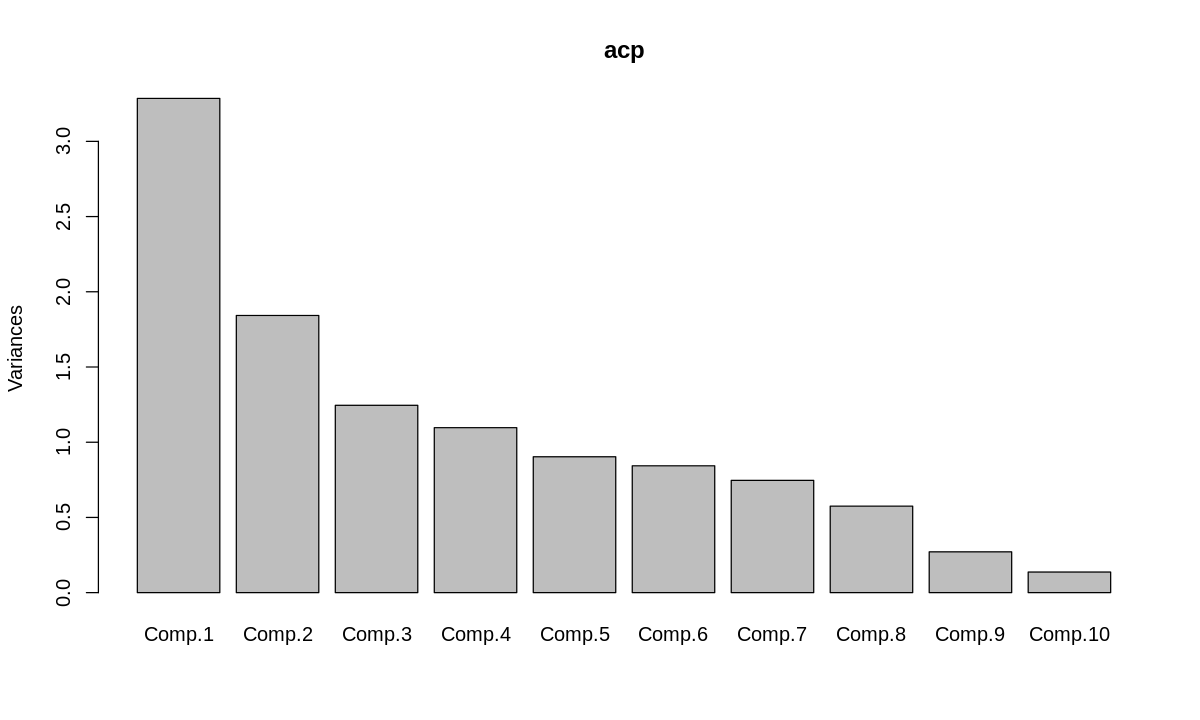

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(acp)

Barplot
- La suma de las varianzas tiene que sumar 11: entre las 3 primeras componentes ya vemos que casi todo queda explicado, las últimas son residuales.

Biplot:
- En este caso no lo graficamos ya que el programa 'peta', se queda sin memoria. 
- Dibujamos las variables en los ejes. 
- Gráfico de dispersión de las puntuaciones de los componentes principales que incluye los pesos (o coeficientes) de las variables originales en los componentes principales. Las cargas se representan mediante flechas que indican la dirección y la magnitud de la contribución de cada variable a los componentes principales. La longitud de la flecha corresponde a la magnitud de la carga, y la dirección de la flecha indica la dirección de la carga.
- Qué nuevo valor tienen la comp1 y la comp2 para dibujarlo en el eje de coordenadas. 
- Podemos obervar si una variable está más relacionada con la comp1 o la comp2.
- Es una representación extra que podemos hacer para visualizarlo. 

### Matriz de componentes

In [ ]:
mcomponentes = cor(data_cor,predict(acp)[,1:3]) # Matriz de componentes
mcomponentes


apply(mcomponentes*mcomponentes,1,sum)

,Comp.1,Comp.2,Comp.3
cust_churn_clean_df.first_payment_amount,0.27949804,0.77722073,0.026602194
cust_churn_clean_df.age,0.07512028,0.12951041,-0.251885223
cust_churn_clean_df.number_of_cards,0.22409128,0.13849305,-0.145696895
cust_churn_clean_df.payments_initiated,0.85029154,-0.43518697,-0.039441047
cust_churn_clean_df.payments_failed,0.46655648,-0.23056715,0.024416805
cust_churn_clean_df.payments_completed,0.82683019,-0.41842746,-0.081579348
cust_churn_clean_df.payments_completed_amount_first_7days,0.57048000,0.71001877,0.006048129
cust_churn_clean_df.reward_purchase_count_first_7days,0.88004924,-0.17401327,-0.042138734
cust_churn_clean_df.coins_redeemed_first_7days,0.63712574,0.49955661,0.017380459
cust_churn_clean_df.visits_feature_1,0.10019928,-0.02252901,0.779061892


cust_churn_clean_df.first_payment_amount 
                                               0.68289890 
                                  cust_churn_clean_df.age 
                                               0.08586217 
                      cust_churn_clean_df.number_of_cards 
                                               0.09062481 
                   cust_churn_clean_df.payments_initiated 
                                               0.91393900 
                      cust_churn_clean_df.payments_failed 
                                               0.27143234 
                   cust_churn_clean_df.payments_completed 
                                               0.86538489 
cust_churn_clean_df.payments_completed_amount_first_7days 
                                               0.82961067 
    cust_churn_clean_df.reward_purchase_count_first_7days 
                                               0.80654295 
           cust_churn_clean_df.coins_redeemed_first_7days 
                                               0.65578810 
                     cust_churn_clean_df.visits_feature_1 
                                               0.61748488 
                     cust_churn_clean_df.visits_feature_2 
                                               0.55383338

- Los pesos de los componentes muestran las relaciones lineales entre cada variable original y los 3 componentes. Los valores positivos indican una relación positiva entre la variable original y el componente, mientras que los valores negativos indican una relación negativa.

- Podemos observar que varias variables tienen pesos elevados en el primer componente (Comp.1), como reward_purchase_count_first_7days, payments_initiated y payments_completed. Esto sugiere que estas variables impulsan el primer componente, que podría captar algún aspecto importante de la variación de los datos.

- El segundo componente (Comp.2) tiene pesos positivos para la variable first_payment_amount y payments_completed_amount_first_7days. Esto sugiere que este componente podría estar captando alguna relación entre estas variables en los datos.

- El tercer componente (Comp.3) tiene pesos positivos elevados para visits_feature_1 y visits_feature_2. Esto sugiere que este componente podría estar capturando alguna relación entre estas variables en los datos.

- Por tanto, los resultados de este PCA sugieren que existen varias relaciones subyacentes en los datos que podrían ser captadas por estos 3 componentes.

In [ ]:
# payments_initiated
(0.85029154)^2 + (-0.43518697)^2 + (-0.039441047)^2

[1] 0.913939

- Por ejemplo. la comp1, la comp2 y la comp3 me están explicando el 91% de la variación del payments_initiated. Me está conservando mucha información. Estas nuevas variables abstractas me están explicando mucho. 
- Por tanto, un 91% de la varianza de payments_initiated viene explicada por la componente 1, 2 y 3.

- Para las otras variables de interés:

In [ ]:
# payments_completed
(0.82683019)^2 + (-0.41842746)^2 + (-0.081579348)^2

[1] 0.8653849

In [ ]:
# payments_completed_amount_first_7days	
(0.57048000)^2 + (0.71001877)^2 + (0.006048129)^2

[1] 0.8296107

In [ ]:
# reward_purchase_count_first_7days
0.88004924^2 + (-0.17401327)^2 + (-0.042138734)^2

[1] 0.806543

In [ ]:
# first_payment_amount
(0.27949804)^2 + (0.77722073)^2 + (0.026602194)^2

[1] 0.6828989

In [ ]:
# visits_feature_1	
(0.10019928)^2 + (-0.02252901)^2 + (0.779061892)^2

[1] 0.6174849

In [ ]:
# visits_feature_2
(0.10625789)^2 + (-0.02214432)^2 + (0.736241989)^2

[1] 0.5538334

## ANOVA

- La ANOVA nos dice cómo cuantificar la pertenencia a una de las categorías.
- La ANOVA puede ser una herramienta útil para identificar si existen diferencias significativas en las características numéricas entre los grupos de clientes que abandonaron y los que no.

In [ ]:
var_names <- c("first_payment_amount", "age", "number_of_cards", "payments_initiated", 
               "payments_failed", "payments_completed", "payments_completed_amount_first_7days", 
               "reward_purchase_count_first_7days", "coins_redeemed_first_7days", 
               "visits_feature_1", "visits_feature_2", "is_churned")
data_anova <- cust_churn_clean_df[var_names]

### Primeras suposiciones

In [ ]:
message('first_payment_amount')
data_anova %>% # pasamos los datos en el objeto data_anova como entrada a la siguiente operación
    group_by(is_churned) %>%  # agrupamos los datos en el objeto boston_aov_df por la variable is_churned  
    # calculamos la media y la desviación estándar de la variable first_payment_amount para cada grupo de is_churned  
    summarize(media = mean(first_payment_amount), desv = sd(first_payment_amount))

message('age')
data_anova %>% 
    group_by(is_churned) %>%  
    summarize(media = mean(age), desv = sd(age))

message('number_of_cards')
data_anova %>% 
    group_by(is_churned) %>%  
    summarize(media = mean(number_of_cards), desv = sd(number_of_cards))

message('payments_initiated')
data_anova %>%
group_by(is_churned) %>%
summarize(media = mean(payments_initiated), desv = sd(payments_initiated))

message('payments_failed')
data_anova %>%
group_by(is_churned) %>%
summarize(media = mean(payments_failed), desv = sd(payments_failed))

message('payments_completed')
data_anova %>%
group_by(is_churned) %>%
summarize(media = mean(payments_completed), desv = sd(payments_completed))

message('payments_completed_amount_first_7days')
data_anova %>%
group_by(is_churned) %>%
summarize(media = mean(payments_completed_amount_first_7days), desv = sd(payments_completed_amount_first_7days))

message('reward_purchase_count_first_7days')
data_anova %>%
group_by(is_churned) %>%
summarize(media = mean(reward_purchase_count_first_7days), desv = sd(reward_purchase_count_first_7days))

message('coins_redeemed_first_7days')
data_anova %>%
group_by(is_churned) %>%
summarize(media = mean(coins_redeemed_first_7days), desv = sd(coins_redeemed_first_7days))

message('visits_feature_1')
data_anova %>%
group_by(is_churned) %>%
summarize(media = mean(visits_feature_1), desv = sd(visits_feature_1))

message('visits_feature_2')
data_anova %>%
group_by(is_churned) %>%
summarize(media = mean(visits_feature_2), desv = sd(visits_feature_2))

first_payment_amount



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,39.74455,76.54457
1,22.41818,62.45045


age



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,32.39277,7.413371
1,33.42355,8.712275


number_of_cards



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,2.130729,1.902615
1,1.636784,1.737140


payments_initiated



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,3.122789,4.597016
1,2.150082,2.950259


payments_failed



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,0.4785398,1.1084138
1,0.3424892,0.9213158


payments_completed



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,2.010137,3.522544
1,1.373411,2.152074


payments_completed_amount_first_7days



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,66.08866,138.0323
1,30.67133,105.4481


reward_purchase_count_first_7days



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,1.976868,3.74044
1,1.054331,2.18713


coins_redeemed_first_7days



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,27.07806,72.04526
1,10.84345,34.32838


visits_feature_1



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,0.2677397,0.6558206
1,0.1713787,0.5336872


visits_feature_2



is_churned,media,desv
<fct>,<dbl>,<dbl>
0,0.14253747,0.4733977
1,0.08870778,0.3663817


- Parece que los todos grupos tienen valores diferentes de media y desviación típica para cada la variable.

- Basándonos únicamente en este análisis, no podemos afirmar que, que el cliente haga churn se vea afectado por estas variables. 

- Observando el gráficos de violín (vistos en apartados anteriores) así como las medias y las desviaciones estándar por categoría parece ser que hay una notable diferencia entre las distintas variables numéricas y si el cliente hace churn o no. 

- Las distribución de los datos no parece una distribución normal (lo hemos visto en apartados anteriores mediante violinplots), aunque esto lo corroboraremos en el siguiente punto mediante tests de normalidad como el Anderson-Darling test. 

### Comprobación de condiciones 

Comprobamos las condiciones para poder aplicar el test ANOVA.

ANOVA (Analysis of Variance) es una técnica estadística que se utiliza para dos o más grupos para comprobar si existe una diferencia entre sus valores medios [1],[2].

Las suposiciones de ANOVA son:
- La distribución de los datos es normal
- La varianza es constante entre los grupos
- Las observaciones son independientes entre sí


#### Normalidad

- Visualización: Q-Q Plot
- Prueba estadística: se utiliza el test de normalidad de Anderson-Darling ya tenemos más de 50 muestras:
    - H0: La variable presenta una distribución normal
    - H1: La variable presenta una distribución no normal
    - p-value > 0.05: No rechazar H0 (normal)
    - p-value < 0.05: Rechazar H0


first_payment_amount



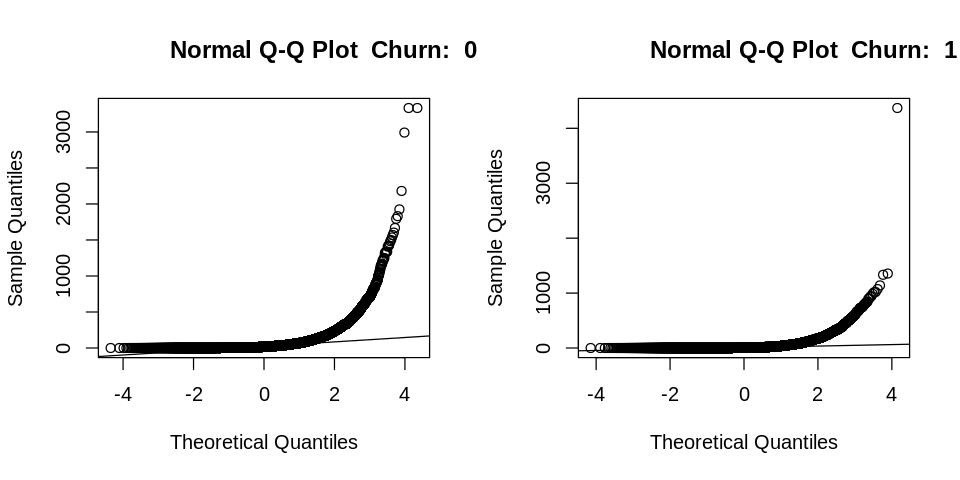

In [ ]:
# Create normal probability plots 
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))

message('first_payment_amount')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'first_payment_amount'])
  qqline(subset(data_anova, is_churned == i)[,'first_payment_amount'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}

age



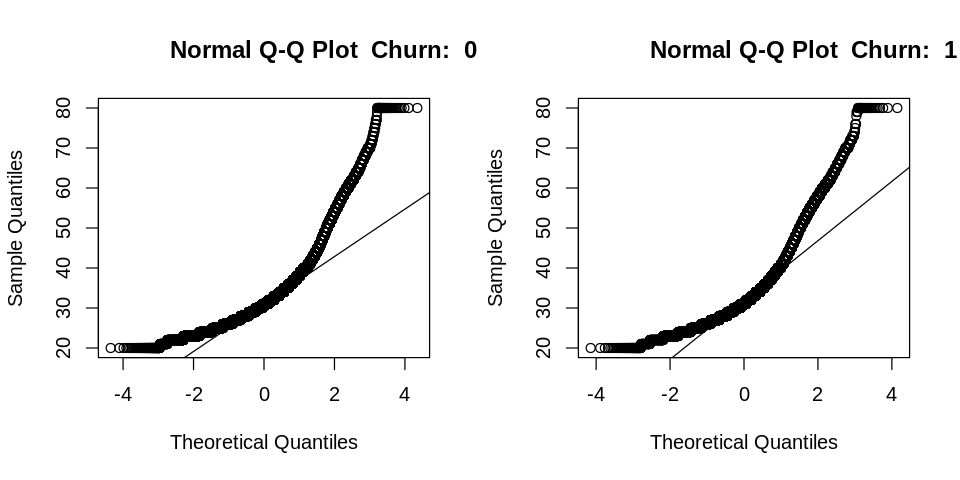

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
message('age')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'age'])
  qqline(subset(data_anova, is_churned == i)[,'age'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}

number_of_cards



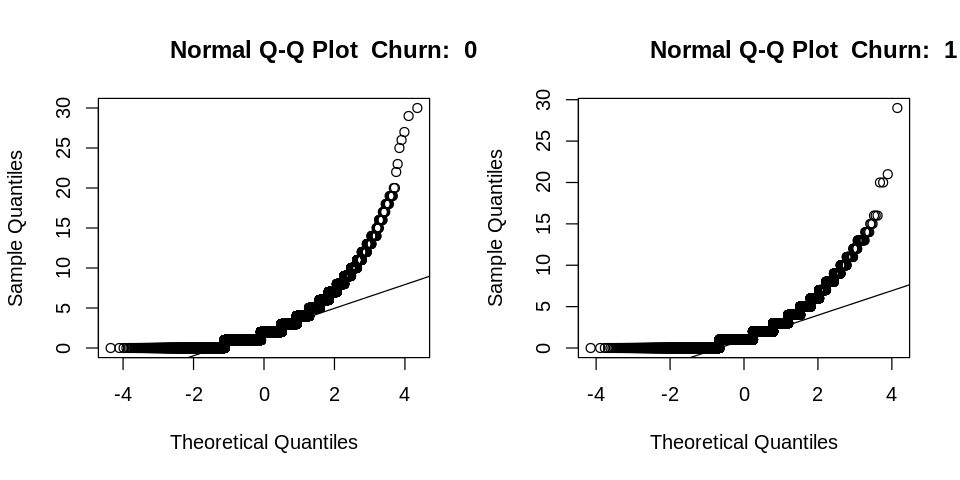

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
message('number_of_cards')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'number_of_cards'])
  qqline(subset(data_anova, is_churned == i)[,'number_of_cards'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}

payments_initiated



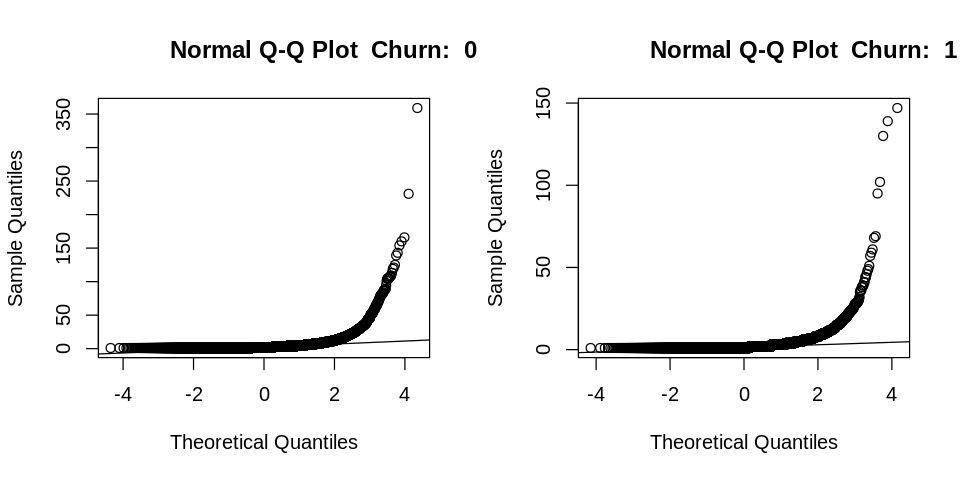

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
message('payments_initiated')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'payments_initiated'])
  qqline(subset(data_anova, is_churned == i)[,'payments_initiated'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}

payments_failed



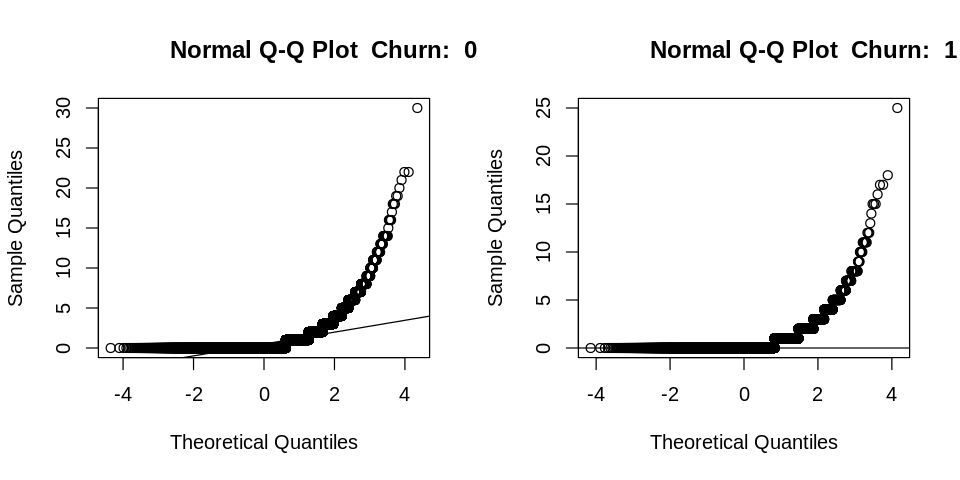

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
message('payments_failed')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'payments_failed'])
  qqline(subset(data_anova, is_churned == i)[,'payments_failed'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}

payments_completed



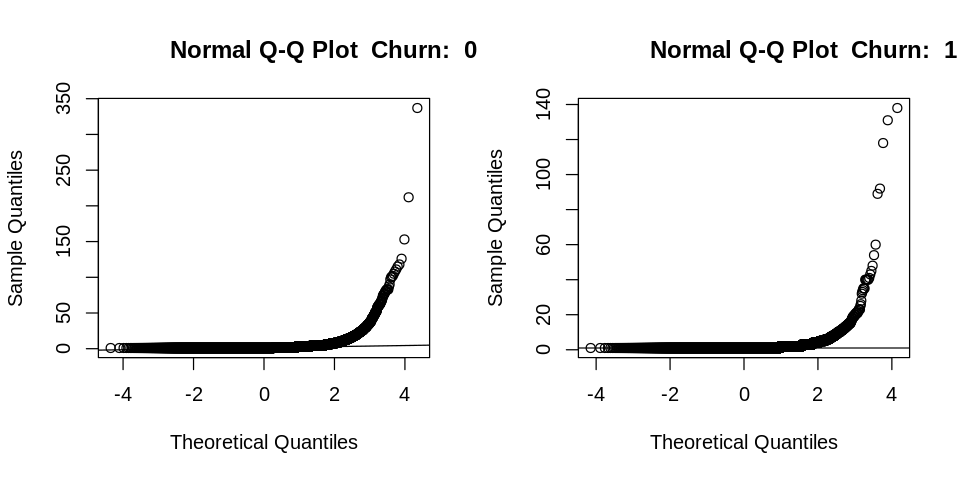

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))

message('payments_completed')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'payments_completed'])
  qqline(subset(data_anova, is_churned == i)[,'payments_completed'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}

payments_completed_amount_first_7days



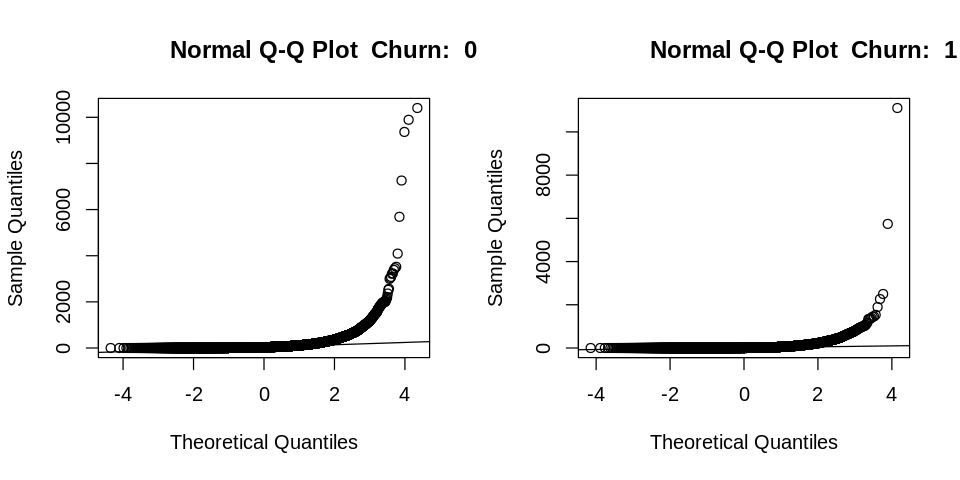

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))
message('payments_completed_amount_first_7days')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'payments_completed_amount_first_7days'])
  qqline(subset(data_anova, is_churned == i)[,'payments_completed_amount_first_7days'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}

reward_purchase_count_first_7days



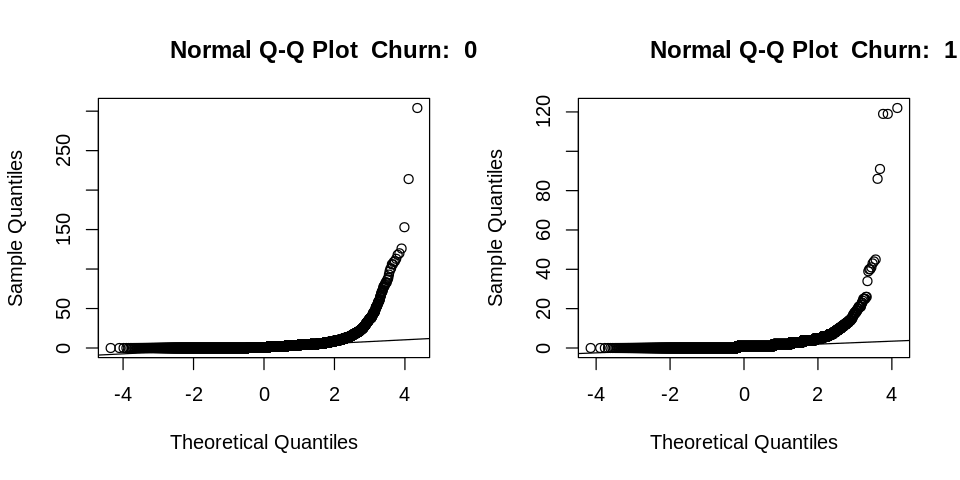

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))

message('reward_purchase_count_first_7days')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'reward_purchase_count_first_7days'])
  qqline(subset(data_anova, is_churned == i)[,'reward_purchase_count_first_7days'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}


coins_redeemed_first_7days



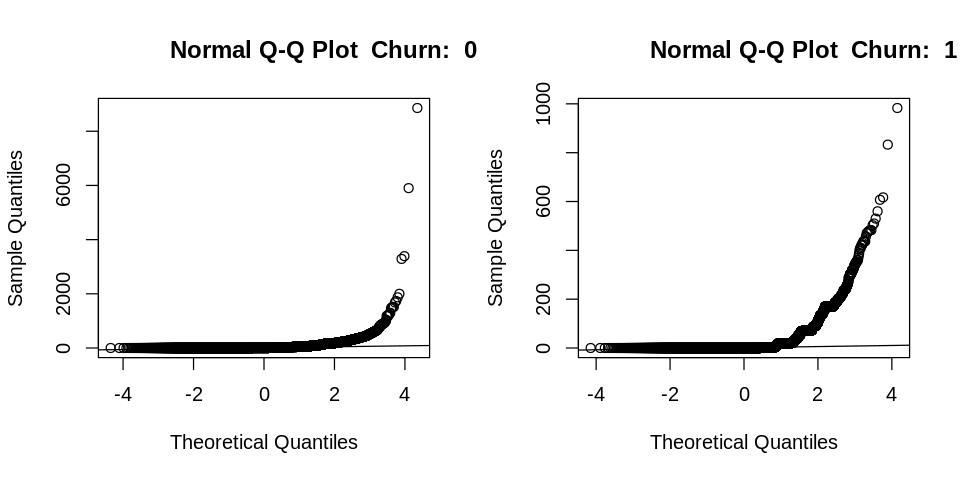

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))

message('coins_redeemed_first_7days')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'coins_redeemed_first_7days'])
  qqline(subset(data_anova, is_churned == i)[,'coins_redeemed_first_7days'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}

visits_feature_1



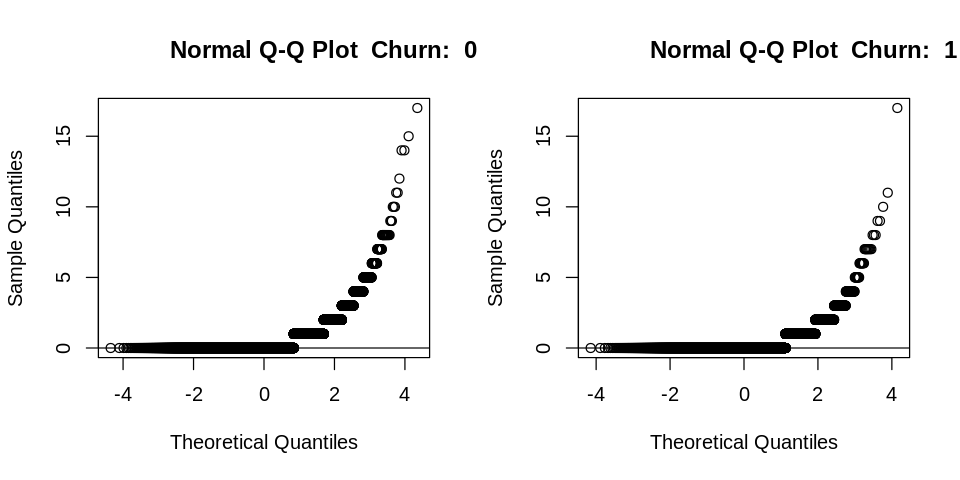

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))

message('visits_feature_1')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'visits_feature_1'])
  qqline(subset(data_anova, is_churned == i)[,'visits_feature_1'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}

visits_feature_2



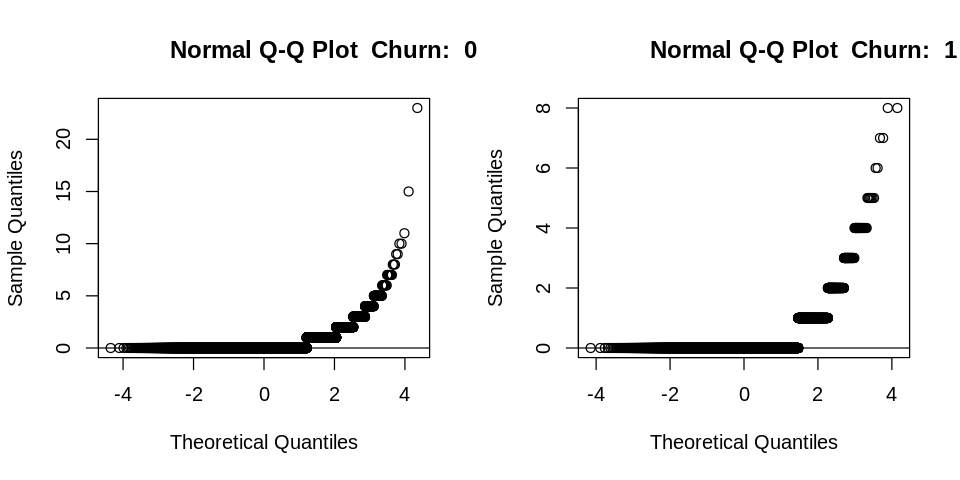

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(1,2))

message('visits_feature_2')
for(i in unique(data_anova$is_churned)){
  qqnorm(subset(data_anova, is_churned == i)[,'visits_feature_2'])
  qqline(subset(data_anova, is_churned == i)[,'visits_feature_2'])
  title(paste("\t\t\t\t\t\tChurn: ",i))
}


In [ ]:
# Define the variable names
var_names_ad <- c("first_payment_amount", "age", "number_of_cards", "payments_initiated", 
               "payments_failed", "payments_completed", "payments_completed_amount_first_7days", 
               "reward_purchase_count_first_7days", "coins_redeemed_first_7days", 
               "visits_feature_1", "visits_feature_2")

# Subset the data
data_ad <- cust_churn_clean_df[var_names_ad]

# Loop through the variables and compute the Anderson-Darling test
for (var in var_names_ad) {
  for (churn in unique(data_anova$is_churned)) {
    ad_test <- ad.test(subset(data_anova, is_churned == churn)[[var]])
    cat(paste("Variable:", var, "Churn:", churn, "\n"))
    cat(paste("Statistic:", ad_test$statistic, "\n"))
    cat(paste("p-value:", ad_test$p.value, "\n"))
    cat("\n")
  }
}


Variable: first_payment_amount Churn: 0 
Statistic: 9790.51051848452 
p-value: 3.7e-24 

Variable: first_payment_amount Churn: 1 
Statistic: 5542.39028640706 
p-value: 3.7e-24 

Variable: age Churn: 0 
Statistic: 2234.26296862254 
p-value: 3.7e-24 

Variable: age Churn: 1 
Statistic: 1075.87039077434 
p-value: 3.7e-24 

Variable: number_of_cards Churn: 0 
Statistic: 3530.58314853028 
p-value: 3.7e-24 

Variable: number_of_cards Churn: 1 
Statistic: 1650.96548945355 
p-value: 3.7e-24 

Variable: payments_initiated Churn: 0 
Statistic: 10083.0656093974 
p-value: 3.7e-24 

Variable: payments_initiated Churn: 1 
Statistic: 4706.99914087995 
p-value: 3.7e-24 

Variable: payments_failed Churn: 0 
Statistic: 13503.1138078506 
p-value: 3.7e-24 

Variable: payments_failed Churn: 1 
Statistic: 6396.71017981027 
p-value: 3.7e-24 

Variable: payments_completed Churn: 0 
Statistic: 15194.7079702096 
p-value: 3.7e-24 

Variable: payments_completed Churn: 1 
Statistic: 8189.08057938932 
p-value: 3.7e

- Observamos que el p-value < 0.05 para ambos grupos de todas las variables numéricas.  
- El test de normalidad de Anderson Darling rechaza la hipótesis de normalidad cuando el p-value ≤ 0.05.  
- Fallar la prueba de normalidad permite afirmar con un 95% de confianza que los datos no se ajustan a la distribución normal.

No obstante, aunque los datos NO pasen la prueba de normalidad, es importante comprobar otros supuestos del ANOVA, como la homocedasticidad.

#### Homocedasticidad

Homocedasticidad: las varianzas son iguales en todos los grupos.
-  Bartlett’s test: 
    - Para verificar el supuesto de que las varianzas son iguales en todos los grupos.
    - Compara las varianzas de k muestras, donde k puede ser más de dos muestras [3]. 
    - Los datos deben estar distribuidos normalmente.
    - Hipótesis nula H0: todas las varianzas de las poblaciones son iguales.
    - Hipótesis alternativa H1: al menos dos de ellas difieren.

In [ ]:
# Bartlett’s test with one independent variable (is_churned):
for (var in var_names_ad) {
  res <- bartlett.test(get(var) ~ is_churned, data = data_anova)
  print(paste("Variable:", var))
  print(res)
}

[1] "Variable: first_payment_amount"

	Bartlett test of homogeneity of variances

data:  get(var) by is_churned
Bartlett's K-squared = 1655.2, df = 1, p-value < 2.2e-16

[1] "Variable: age"

	Bartlett test of homogeneity of variances

data:  get(var) by is_churned
Bartlett's K-squared = 1157, df = 1, p-value < 2.2e-16

[1] "Variable: number_of_cards"

	Bartlett test of homogeneity of variances

data:  get(var) by is_churned
Bartlett's K-squared = 342.84, df = 1, p-value < 2.2e-16

[1] "Variable: payments_initiated"

	Bartlett test of homogeneity of variances

data:  get(var) by is_churned
Bartlett's K-squared = 7243.3, df = 1, p-value < 2.2e-16

[1] "Variable: payments_failed"

	Bartlett test of homogeneity of variances

data:  get(var) by is_churned
Bartlett's K-squared = 1374.5, df = 1, p-value < 2.2e-16

[1] "Variable: payments_completed"

	Bartlett test of homogeneity of variances

data:  get(var) by is_churned
Bartlett's K-squared = 8784.8, df = 1, p-value < 2.2e-16

[1] "Variable

- Podemos observar que el p-value no es superior al nivel de significancia (p-value < 0.05). 

- Por tanto, podemos rechazar la hipótesis nula y podemos concluir que las varianzas no son iguales. 



#### Independencia en las muestras

- La independencia de las muestras se refiere al supuesto de que las observaciones de cada muestra no están influidas por las observaciones de otras muestras.

- Que las muestras sean independientes o no depende del contexto de los datos y de cómo se hayan recogido. 

- Por ejemplo, si los datos se recogieron en distintas ciudades y cada ciudad representa una muestra independiente, se puede suponer que las observaciones de cada ciudad son independientes de las observaciones de otras ciudades.

- Suponemos que las muestras son independientes.

- Después de realizar los supuestos, vemos que no se cumplen los supuestos de normalidad y homocedasticidad.
- Por tanto NO podemos aplicar el test ANOVA.
- Deberemos usar alternativas no-paramétricas, como por ejemplo, el test de Kruskal-Wallis, que no asume la normalidad ni la igualdad de varianzas entre grupos.


## Kruskall - Wallis test

- La prueba de Kruskal-Wallis es un método no paramétrico para testear la hipótesis nula de que las medianas de dos o más grupos son iguales. 

- Puede utilizarse para determinar si las diferentes variables númericas que tenemos son significativamente diferentes en los dos niveles de is_churned (0 y 1).

- Si la prueba de Kruskal-Wallis muestra una diferencia significativa en las diferentes variables númericas entre los dos niveles de is_churned, indicaría que el hecho de que el cliente haga churn o no, tiene un efecto significativo en en esas variables, y podríamos considerar incluirlas como predictoras en el modelo de regresión logística.

In [ ]:
# Perform the Kruskal-Wallis test
for (var in var_names_ad) {
  res <- kruskal.test(get(var) ~ is_churned, data = data_anova)
  print(paste("Variable:", var))
  print(res)
}

[1] "Variable: first_payment_amount"

	Kruskal-Wallis rank sum test

data:  get(var) by is_churned
Kruskal-Wallis chi-squared = 8652.9, df = 1, p-value < 2.2e-16

[1] "Variable: age"

	Kruskal-Wallis rank sum test

data:  get(var) by is_churned
Kruskal-Wallis chi-squared = 127.67, df = 1, p-value < 2.2e-16

[1] "Variable: number_of_cards"

	Kruskal-Wallis rank sum test

data:  get(var) by is_churned
Kruskal-Wallis chi-squared = 2243.6, df = 1, p-value < 2.2e-16

[1] "Variable: payments_initiated"

	Kruskal-Wallis rank sum test

data:  get(var) by is_churned
Kruskal-Wallis chi-squared = 3719, df = 1, p-value < 2.2e-16

[1] "Variable: payments_failed"

	Kruskal-Wallis rank sum test

data:  get(var) by is_churned
Kruskal-Wallis chi-squared = 469.46, df = 1, p-value < 2.2e-16

[1] "Variable: payments_completed"

	Kruskal-Wallis rank sum test

data:  get(var) by is_churned
Kruskal-Wallis chi-squared = 5139.9, df = 1, p-value < 2.2e-16

[1] "Variable: payments_completed_amount_first_7days"



- Como el p-value < 0.05 para todas las variables numéricas, podemos rechazar la hipótesis nula y concluir que existen pruebas significativas de que las medianas de las variables numéricas son diferentes entre los dos niveles de is_churned.
- Esto indica que existe una diferencia en los valores medianos de las variables numéricas en función si el cliente hace churn o no. 
- Basándose en este resultado, puede ser apropiado considerar la inclusión estas variables como predictoras en nuestro modelo de regresión logística. No obstante, qué variables incluiremos en el modelo lo acabaremos de decidir posteriormente. 

## Construcción del modelo de regresión logística

### División del dataset en train y test

Cuando empezamos a generar el modelo lo primero que hacemos es dividir el dataset en test y train:


In [ ]:
data_lr = cust_churn_clean_df
set.seed(123)
inTrain = createDataPartition(y = cust_churn_clean_df$is_churned
                              ,p = 0.7 # 70% train, 30% test
                              , list = FALSE
                              , times = 1)

data_train  = data_lr[inTrain, ]
data_test = data_lr[-inTrain, ]

In [ ]:
dim(data_train)
dim(data_test)

[1] 72801    18

[1] 31200    18

- Estos conjuntos de datos se utilizarán para entrenar y testear el modelo de regresión logística, donde el modelo se ajustará a los datos de entrenamiento y se utilizará para hacer predicciones sobre los datos de prueba. Esto le permitirá evaluar el rendimiento del modelo en datos no observados y asegurarse de que el modelo generaliza bien con nuevos datos.

### Selección de variables predictoras

- Posteriormente al PCA, con las variables que nos hemos quedado, cuando ya hemos detectado los predictores que queremos entrar al modelo, debemos confirmar que estos son independientes entre ellos: buscamos si puede haber problemas multicolinealidad.

- Volvemos a generar las correlaciones solo con las variables numéricas que nos interesan. 

Variables numéricas seleccionadas entre el análisis de correlación, el análisis de información mútua y el PCA:
- first_payment_amount
- payments_initiated
- payments_completed
- reward_purchase_count_first_7days
- payments_completed_amount_first_7days
- visits_feature_1
- visits_feature_2

In [ ]:
pca_var <- c("first_payment_amount", 
             "payments_initiated", 
             "payments_completed", 
             "reward_purchase_count_first_7days", 
             "payments_completed_amount_first_7days",
             "visits_feature_1", 
             "visits_feature_2"            
            )
pca_data <- cust_churn_clean_df[pca_var]

In [ ]:
# create an empty vector to store the results
correlations_pca <- c()

# loop through each numerical variable and calculate the biserial correlation
for (var in colnames(pca_data)) {
  # calculate biserial correlation between the current variable and the target variable
  cor <- biserial.cor(pca_data[[var]], cust_churn_clean_df$is_churned)
  correlations_pca <- c(correlations_pca, cor)
}

# print the results
cor_var_pca <- data.frame(variable = colnames(pca_data), correlation = correlations_pca)
cor_var_pca

variable,correlation
<chr>,<dbl>
first_payment_amount,0.10703517
payments_initiated,0.10437091
payments_completed,0.08988723
reward_purchase_count_first_7days,0.12288886
payments_completed_amount_first_7days,0.12271551
visits_feature_1,0.06974744
visits_feature_2,0.05457862


- Parece ser, por ejemplo, que elegir reward_purchase_count_first_7days, payments_completed_amount_first_7days, first_payment_amount y payments_initiated puede ser una buena opción (como ya habíamos visto anteriormente). 

- Como en el caso de la regresión lineal, debemos comprobar si hay multicolinealidad en el modelo. A continuación comprobaremos que efectivamente no presenten problemas de multicolinealidad.

## Modelos de Regresión Logística

### Modelo 1

In [ ]:
# Fit logistic regression model on the training data
logitMod_1 <- glm(is_churned ~ first_payment_amount + 
                   payments_initiated + 
                   payments_completed + 
                   reward_purchase_count_first_7days + 
                   payments_completed_amount_first_7days + 
                   visits_feature_1 + visits_feature_2, 
                 data=data_train, family=binomial(link="logit"))
# summary 
summary(logitMod_1)

# Make predictions on the test data
m1_prob <- predict(logitMod_1, newdata=data_test, type = 'response')
m1_pred <- ifelse(m1_prob > 0.4, 1, 0)

# Compute confusion matrix
cm <- confusionMatrix(factor(m1_pred), factor(data_test$is_churned))
print(cm)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = is_churned ~ first_payment_amount + payments_initiated + 
    payments_completed + reward_purchase_count_first_7days + 
    payments_completed_amount_first_7days + visits_feature_1 + 
    visits_feature_2, family = binomial(link = "logit"), data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0206  -0.8874  -0.7178   1.3428   8.4904  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                           -0.2552748  0.0163848 -15.580  < 2e-16
first_payment_amount                  -0.0030509  0.0003056  -9.984  < 2e-16
payments_initiated                    -0.0445204  0.0058290  -7.638 2.21e-14
payments_completed                    -0.0809780  0.0125454  -6.455 1.08e-10
reward_purchase_count_first_7days     -0.1224778  0.0070312 -17.419  < 2e-16
payments_completed_amount_first_7days -0.0021940  0.0002380  -9.217  < 2e-16
visits_feature_1                      -0.2076654  0

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 21149  7356
         1  1106  1589
                                          
               Accuracy : 0.7288          
                 95% CI : (0.7238, 0.7337)
    No Information Rate : 0.7133          
    P-Value [Acc > NIR] : 6.274e-10       
                                          
                  Kappa : 0.1617          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9503          
            Specificity : 0.1776          
         Pos Pred Value : 0.7419          
         Neg Pred Value : 0.5896          
             Prevalence : 0.7133          
         Detection Rate : 0.6779          
   Detection Prevalence : 0.9136          
      Balanced Accuracy : 0.5640          
                                          
       'Positive' Class : 0               
                  

In [ ]:
# Calculate the VIF for each predictor in the model
VIF(logitMod_1)

first_payment_amount                    payments_initiated 
                             2.348289                              1.881573 
                   payments_completed     reward_purchase_count_first_7days 
                             2.324010                              1.454585 
payments_completed_amount_first_7days                      visits_feature_1 
                             2.600255                              1.051229 
                     visits_feature_2 
                             1.051345

Creamos un gráfico para ver que valores VIF superan el 5:

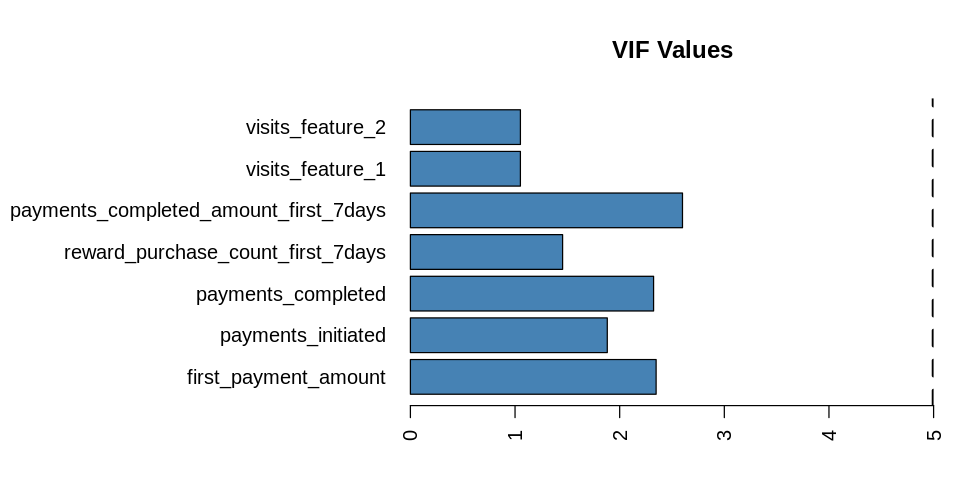

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 4)

par(mar = c(3,17,4,1) + 0.1, mgp = c(3,1,0), cex.lab=0.9)

# create vector of VIF values
vif_values <- VIF(logitMod_1)

#create horizontal bar chart to display each VIF value
barplot(vif_values, main = "VIF Values", horiz = TRUE, col = "steelblue", las=2, xlim = c(0, 5))

# add vertical line at 5
abline(v = 5, lwd = 3, lty = 2)

- Como podemos observar, todas las variables del modelo tienen un VIF muy por debajo de 5.
- Parece ser que las variables candidatas a ser predictoras (first_payment_amount, payments_initiated, payments_completed, reward_purchase_count_first_7days, payments_completed_amount_first_7days, visits_feature_1, visits_feature_2) no presentan problemas de multicolinealidad.

### Modelo 2

In [ ]:
# Fit logistic regression model on the training data
logitMod_2 <- glm(is_churned ~ first_payment_amount + payments_completed, 
                  data=data_train, family=binomial(link="logit"))
# summary 
summary(logitMod_2)

# Make predictions on the test data
m2_prob <- predict(logitMod_2, newdata=data_test, type = 'response')
m2_pred <- ifelse(m2_prob > 0.3, 1, 0)

# Compute confusion matrix
cm_2 <- confusionMatrix(factor(m2_pred), factor(data_test$is_churned))
print(cm_2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = is_churned ~ first_payment_amount + payments_completed, 
    family = binomial(link = "logit"), data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9554  -0.8887  -0.7417   1.4170   8.4904  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.2462514  0.0163011  -15.11   <2e-16 ***
first_payment_amount -0.0065821  0.0002085  -31.58   <2e-16 ***
payments_completed   -0.3012668  0.0088538  -34.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 87240  on 72800  degrees of freedom
Residual deviance: 84118  on 72798  degrees of freedom
AIC: 84124

Number of Fisher Scoring iterations: 6


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 12477  2372
         1  9778  6573
                                         
               Accuracy : 0.6106         
                 95% CI : (0.6051, 0.616)
    No Information Rate : 0.7133         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.2368         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.5606         
            Specificity : 0.7348         
         Pos Pred Value : 0.8403         
         Neg Pred Value : 0.4020         
             Prevalence : 0.7133         
         Detection Rate : 0.3999         
   Detection Prevalence : 0.4759         
      Balanced Accuracy : 0.6477         
                                         
       'Positive' Class : 0              
                                      

### Modelo 3

In [ ]:
# Fit logistic regression model on the training data
logitMod_3 <- glm(is_churned ~  first_payment_amount + payments_initiated + reward_purchase_count_first_7days, 
                  data=data_train, family=binomial(link="logit"))
# summary 
summary(logitMod_3)

# Make predictions on the test data
m3_prob <- predict(logitMod_3, newdata=data_test, type = 'response')
m3_pred <- ifelse(m3_prob > 0.3, 1, 0)

# Compute confusion matrix
cm_3 <- confusionMatrix(factor(m3_pred), factor(data_test$is_churned))
print(cm_3)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = is_churned ~ first_payment_amount + payments_initiated + 
    reward_purchase_count_first_7days, family = binomial(link = "logit"), 
    data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0092  -0.8938  -0.7283   1.3555   8.4904  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       -0.3216528  0.0140276  -22.93   <2e-16 ***
first_payment_amount              -0.0048454  0.0002025  -23.93   <2e-16 ***
payments_initiated                -0.0878741  0.0045646  -19.25   <2e-16 ***
reward_purchase_count_first_7days -0.1647804  0.0062803  -26.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 87240  on 72800  degrees of freedom
Residual deviance: 83672  on 72797  degrees of freedom
AIC: 83680

Number of Fisher Scoring iterations: 6


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 12126  2375
         1 10129  6570
                                          
               Accuracy : 0.5992          
                 95% CI : (0.5938, 0.6047)
    No Information Rate : 0.7133          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2218          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.5449          
            Specificity : 0.7345          
         Pos Pred Value : 0.8362          
         Neg Pred Value : 0.3934          
             Prevalence : 0.7133          
         Detection Rate : 0.3887          
   Detection Prevalence : 0.4648          
      Balanced Accuracy : 0.6397          
                                          
       'Positive' Class : 0               
                  

### Modelo 4

In [ ]:
# Fit logistic regression model on the training data
logitMod_4 <- glm(is_churned ~  reward_purchase_count_first_7days + 
                  payments_completed_amount_first_7days +
                  first_payment_amount +
                  payments_initiated, 
                  data=data_train, family=binomial(link="logit"))
# summary 
summary(logitMod_4)

# Make predictions on the test data
m4_prob <- predict(logitMod_4, newdata=data_test, type = 'response')
m4_pred <- ifelse(m4_prob > 0.3, 1, 0)

# Compute confusion matrix
cm_4 <- confusionMatrix(factor(m4_pred), factor(data_test$is_churned))
print(cm_4)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = is_churned ~ reward_purchase_count_first_7days + 
    payments_completed_amount_first_7days + first_payment_amount + 
    payments_initiated, family = binomial(link = "logit"), data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0057  -0.8928  -0.7278   1.3594   8.4904  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                           -0.3442775  0.0140814  -24.45   <2e-16
reward_purchase_count_first_7days     -0.1445176  0.0066105  -21.86   <2e-16
payments_completed_amount_first_7days -0.0024764  0.0002333  -10.62   <2e-16
first_payment_amount                  -0.0025509  0.0002925   -8.72   <2e-16
payments_initiated                    -0.0739005  0.0046596  -15.86   <2e-16
                                         
(Intercept)                           ***
reward_purchase_count_first_7days     ***
payments_completed_amount_first_7days ***
first_payment_amount    

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11891  2272
         1 10364  6673
                                          
               Accuracy : 0.595           
                 95% CI : (0.5895, 0.6005)
    No Information Rate : 0.7133          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2206          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.5343          
            Specificity : 0.7460          
         Pos Pred Value : 0.8396          
         Neg Pred Value : 0.3917          
             Prevalence : 0.7133          
         Detection Rate : 0.3811          
   Detection Prevalence : 0.4539          
      Balanced Accuracy : 0.6402          
                                          
       'Positive' Class : 0               
                  

- El modelo 1, con las variables predictoras first_payment_amount, payments_initiated, payments_completed, reward_purchase_count_first_7days, payments_completed_amount_first_7days, visits_feature_1, y visits_feature_2,  clasificó correctamente 21149 casos como clase 0 (no churn) y 1589 casos como clase 1 (churn), y clasificó erróneamente 7356 casos como falsos negativos (pronosticados como no churn, pero en realidad sí churn) y 1106 casos como falsos positivos (pronosticados como churn, pero en realidad no churn). La accuracy del modelo es de 0.7288, lo que significa que clasificó correctamente el 72.88% de los casos.

- El modelo 2, con las variables predictoras first_payment_amount y payments_completed, clasificó correctamente 12477 casos como clase 0 (no churn) y 6573 casos como clase 1 (churn), y clasificó erróneamente 2372 casos como falsos negativos (pronosticados como no churn, pero en realidad sí churn) y 9778 casos como falsos positivos (pronosticados como churn, pero en realidad no churn). La accuracy del modelo es de 0.6106, lo que significa que clasificó correctamente el 61% de los casos.

- El modelo 3, con las variables predictoras first_payment_amount, payments_initiated y  reward_purchase_count_first_7days, clasificó correctamente 12126 casos como clase 0 (no churn) y 6570 casos como clase 1 (churn), y clasificó erróneamente 2375 casos como falsos negativos (pronosticados como no churn, pero en realidad sí churn) y 10129 casos como falsos positivos (pronosticados como churn, pero en realidad no churn). La accuracy del modelo es de 0.5992, lo que significa que clasificó correctamente el 59.92% de los casos.

- El modelo 4, con las variables predictoras reward_purchase_count_first_7days, payments_completed_amount_first_7days, first_payment_amount y payments_initiated, clasificó correctamente 11891 casos como clase 0 (no churn) y 6673 casos como clase 1 (churn), y clasificó erróneamente 2272 casos como falsos negativos (pronosticados como no churn, pero en realidad sí churn) y 10364 casos como falsos positivos (pronosticados como churn, pero en realidad no churn). La accuracy del modelo es de 0.595, lo que significa que clasificó correctamente el 59.5% de los casos.

Por tanto, el mejor modelo ha sido el modelo 1, con las variables predictoras first_payment_amount, payments_initiated, payments_completed, reward_purchase_count_first_7days, payments_completed_amount_first_7days, visits_feature_1, y visits_feature_2.

Centrándonos por ende en el modelo 1, observando el resumen (summary) vemos que:

- El resultado muestra el resumen de un modelo de regresión logística con siete variables predictoras: first_payment_amount, payments_initiated, payments_completed, reward_purchase_count_first_7days, payments_completed_amount_first_7days, visits_feature_1, y visits_feature_2. El modelo pretende predecir si un usuario se dará de baja (1) o no (0) en función de estas variables.

- La tabla de coeficientes muestra el efecto estimado de cada variable predictiva sobre la probabilidad de abandono. Un coeficiente negativo indica que un aumento de la variable predictiva se asocia a una disminución de la probabilidad de abandono, mientras que un coeficiente positivo indica lo contrario. Todas las variables predictoras de este modelo tienen coeficientes negativos, lo que sugiere que los valores más altos de estas variables se asocian con menores probabilidades de abandono. Los p-values de todas las variables son inferiores a 0.05, lo que indica que todas las variables predictoras son estadísticamente significativas a la hora de predecir el abandono.

- Los residuos de desviación oscilan entre -1.0206 y 8.4904, con la mayoría de ellos entre -0.9 y 1.3, lo que indica que el modelo es capaz de explicar la mayor parte de la variación de los datos. 

- La diferencia entre las desviaciones (es decir, desviación nula - desviación residual) es la cantidad de desviación explicada por las variables predictoras del modelo. En este caso, las variables predictoras explican una desviación de 4033, lo que indica que el modelo se ajusta bien a los datos.

- El valor AIC  es una medida de la calidad del ajuste del modelo, donde un valor AIC más bajo indica un mejor ajuste del modelo. El valor AIC para este modelo es 83223, que es relativamente bajo, lo que indica que el modelo tiene un buen ajuste.

En conclusión, el modelo de regresión logística muestra que todas las variables predictoras son estadísticamente significativas para predecir el churn. El modelo tiene un buen ajuste, como indican los residuos de desviación y el valor AIC. Los coeficientes negativos de todas las variables predictoras sugieren que los valores más altos de estas variables se asocian con menores probabilidades de abandono. Estos datos podrían ayudar a identificar a los usuarios con riesgo de abandono y a tomar las medidas adecuadas para retenerlos.


<br>
<br>

Observando el resultado de la matriz de confusión (ya comentada anteriormente) y las demás métricas de interés, vemos que:


- La sensibilidad del modelo es de 0.9503, lo que indica que el modelo identifica correctamente al 95.03% de los clientes que abandonaron. La especificidad es de 0.1776, lo que indica que el modelo sólo identifica correctamente al 17.76% de los clientes que no abandonaron. El valor predictivo positivo (VPP) es de 0.7419, lo que indica que, de todos los clientes que el modelo predijo que abandonarían, el 74.19% lo hicieron realmente. El valor predictivo negativo (VPN) es de 0.5896, lo que indica que de todos los clientes que el modelo predijo que no abandonarían, el 58.96% no lo hizo.

- La prevalencia de churns en el conjunto de datos es de 0.7133, y la tasa de detección del modelo es de 0.6779, lo que indica que el modelo detecta el 67.79% de todos los clientes que realmente se dieron de baja. La prevalencia de detección del modelo es de 0.9136, lo que indica que el modelo predice que el 91.36% de los clientes se darán de baja.

- La accuracy equilibrada del modelo es de 0.5640, que es la media de la sensibilidad y la especificidad. En este caso, la clase "positiva" son los clientes que no cambiaron de proveedor y la clase "negativa" son los clientes que cambiaron de proveedor.

En conclusión, las variables predictoras first_payment_amount, payments_initiated, payments_completed, reward_purchase_count_first_7days, payments_completed_amount_first_7days, visits_feature_1, y visits_feature_2 han sido las que mejor resultado han dado. El modelo de regresión logística tiene una accuracy ligeramente superior a la de adivinar la clase mayoritaria, pero la concordancia entre las clases reales y las predichas es sólo ligeramente superior al azar. El modelo tiene una alta sensibilidad para detectar a los clientes que se han dado de baja, pero una baja especificidad para identificar a los clientes que no se han dado de baja. El valor predictivo positivo del modelo es relativamente bueno, pero el valor predictivo negativo es bajo. La prevalencia del churn en el conjunto de datos es alta, y la tasa de detección del modelo es moderada. 

## Conclusiones y vías abiertas

A partir de los resultados del modelo 1 de regresión logística, podemos identificar las variables que más influyen en la pérdida de clientes. Los coeficientes de las variables predictoras sugieren que los siguientes factores tienen un impacto negativo en la pérdida de clientes (es decir, valores más altos de estas variables reducen la probabilidad de pérdida de clientes):

- Mayor importe del primer pago
- Mayor número de pagos iniciados
- Mayor número de pagos completados
- Mayor número de recompensas reclamadas en los primeros 7 días
- Mayor importe de pago completado en los primeros 7 días
- Mayor número de visitas de los usuarios al producto 1
- Mayor número de visitas de los usuarios al producto 2

Por lo tanto, basándose en los resultados, la empresa podría considerar las siguientes recomendaciones para reducir el churn:

- Animar a los usuarios a realizar un primer pago más elevado ofreciéndoles descuentos u ofertas especiales. Esto puede aumentar su compromiso con el servicio y reducir la probabilidad de abandono.

- Aumentar el compromiso con los usuarios animándoles a iniciar más pagos y a completar más pagos. Esto puede lograrse ofreciendo servicios, funciones o incentivos adicionales a los usuarios.

- Ofrecer más recompensas e incentivos durante los primeros 7 días de afiliación para animar a los usuarios a seguir utilizando el servicio.

- Centrarse en mejorar el compromiso de los usuarios con las funciones 1 y 2 del producto, ya que parece tener un fuerte impacto negativo en el churn.

El modelo de regresión logística puede ayudar a la empresa a llegar a estas conclusiones al proporcionar información sobre las variables que más influyen en la pérdida de clientes. Al identificar estas variables, la empresa puede desarrollar estrategias específicas para mejorar estos aspectos del servicio y reducir la pérdida de clientes. Además, el modelo puede utilizarse para predecir la probabilidad de que un usuario abandone el servicio en función de sus características. Esto puede utilizarse para desarrollar estrategias de retención personalizadas y mejorar la eficacia de los esfuerzos de prevención de la empresa.

## Referencias

[1] Chen, L.-P. (2021). Practical Statistics for Data Scientists. Technometrics (Vol. 63, pp. 272–273).

[2] Hastie, T., Tibshirani, R., James, G., & Witten, D. (2021). An introduction to Statistical Learning with Applications in R (2nd Edition). Springer Texts, 102, 618.

[3] Compare multiple sample variances in R. STHDA. Retrieved January 17, 2023, from http://www.sthda.com/english/wiki/compare-multiple-sample-variances-in-r 


[4] https://www.paultwin.com/wp-content/uploads/Lodder_1140873_Paper_Imputation.pdf


[5] https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.496.3324&rep=rep1&type=pdf
